## **Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving credit-card.data to credit-card.data


In [ ]:
data=pd.read_csv('/content/credit-card.data',header=None)
data

0      1       2  3  4   5   6     7  8  9   10 11 12     13   14 15
0    b  30.83   0.000  u  g   w   v  1.25  t  t   1  f  g  00202    0  +
1    a  58.67   4.460  u  g   q   h  3.04  t  t   6  f  g  00043  560  +
2    a  24.50   0.500  u  g   q   h  1.50  t  f   0  f  g  00280  824  +
3    b  27.83   1.540  u  g   w   v  3.75  t  t   5  t  g  00100    3  +
4    b  20.17   5.625  u  g   w   v  1.71  t  f   0  f  s  00120    0  +
..  ..    ...     ... .. ..  ..  ..   ... .. ..  .. .. ..    ...  ... ..
685  b  21.08  10.085  y  p   e   h  1.25  f  f   0  f  g  00260    0  -
686  a  22.67   0.750  u  g   c   v  2.00  f  t   2  t  g  00200  394  -
687  a  25.25  13.500  y  p  ff  ff  2.00  f  t   1  t  g  00200    1  -
688  b  17.92   0.205  u  g  aa   v  0.04  f  f   0  f  g  00280  750  -
689  b  35.00   3.375  u  g   c   h  8.29  f  f   0  t  g  00000    0  -

[690 rows x 16 columns]

## **Data Preprocessing**

In [ ]:
column_names=['Gender' ,	 'Age'	,'Debt',	'Married'	,'BankCustomer' ,	'Industry'	, 'Ethnicity'	,'YearsEmployed'	,'PriorDefault',	'Employed',	'CreditScore'	,'DriversLicense'	,'Citizen'	,'ZipCode',	'Income'	,'Approved']
data.columns = column_names

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    object 
 1   Age             690 non-null    object 
 2   Debt            690 non-null    float64
 3   Married         690 non-null    object 
 4   BankCustomer    690 non-null    object 
 5   Industry        690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    object 
 9   Employed        690 non-null    object 
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    object 
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    object 
 14  Income          690 non-null    int64  
 15  Approved        690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


##**Checking Null Values**

In [ ]:
data.isna().sum()

Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
Industry          0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
Approved          0
dtype: int64

##**Replacing Null Values**

In [ ]:
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')
mean_age = data['Age'].mean()
data['Age'] = data['Age'].replace(to_replace='?', value=str(int(mean_age)))
data['Age'].fillna(mean_age, inplace=True)

<ipython-input-7-c6897e2531a7>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(mean_age, inplace=True)


In [ ]:
data.drop('ZipCode', axis=1, inplace=True)
print(data.head())


  Gender    Age   Debt Married BankCustomer Industry Ethnicity  YearsEmployed  \
0      b  30.83  0.000       u            g        w         v           1.25   
1      a  58.67  4.460       u            g        q         h           3.04   
2      a  24.50  0.500       u            g        q         h           1.50   
3      b  27.83  1.540       u            g        w         v           3.75   
4      b  20.17  5.625       u            g        w         v           1.71   

  PriorDefault Employed  CreditScore DriversLicense Citizen  Income Approved  
0            t        t            1              f       g       0        +  
1            t        t            6              f       g     560        +  
2            t        f            0              f       g     824        +  
3            t        t            5              t       g       3        +  
4            t        f            0              f       s       0        +  


In [ ]:
data['Married'] = data['Married'].replace({'?':'u', 'l':'u'})
data['Gender'] = data['Gender'].replace('?', 'b')
data['BankCustomer'] = data['BankCustomer'].replace({'?':'g', 'gg':'g'})
data['Citizen'] = data['Citizen'].replace('p', 'g')
data['Industry'] = data['Industry'].replace('?', 'c')
data['Ethnicity'] = data['Ethnicity'].replace('?', 'v')
data['Approved'] = data['Approved'].replace('+','1')
data['Approved'] = data['Approved'].replace('-','0')
data.head()

Gender    Age   Debt Married BankCustomer Industry Ethnicity  YearsEmployed  \
0      b  30.83  0.000       u            g        w         v           1.25   
1      a  58.67  4.460       u            g        q         h           3.04   
2      a  24.50  0.500       u            g        q         h           1.50   
3      b  27.83  1.540       u            g        w         v           3.75   
4      b  20.17  5.625       u            g        w         v           1.71   

  PriorDefault Employed  CreditScore DriversLicense Citizen  Income Approved  
0            t        t            1              f       g       0        1  
1            t        t            6              f       g     560        1  
2            t        f            0              f       g     824        1  
3            t        t            5              t       g       3        1  
4            t        f            0              f       s       0        1

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    object 
 1   Age             690 non-null    float64
 2   Debt            690 non-null    float64
 3   Married         690 non-null    object 
 4   BankCustomer    690 non-null    object 
 5   Industry        690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    object 
 9   Employed        690 non-null    object 
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    object 
 12  Citizen         690 non-null    object 
 13  Income          690 non-null    int64  
 14  Approved        690 non-null    object 
dtypes: float64(3), int64(2), object(10)
memory usage: 81.0+ KB


In [ ]:
data.shape

(690, 15)

In [ ]:
for i in range(data.shape[1]):
  print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


In [ ]:
for i in range(data.shape[1]):
  print(data.iloc[:,i].unique())
  print(data.iloc[:,i].value_counts())

['b' 'a']
Gender
b    480
a    210
Name: count, dtype: int64
[30.83       58.67       24.5        27.83       20.17       32.08
 33.17       22.92       54.42       42.5        22.08       29.92
 38.25       48.08       45.83       36.67       28.25       23.25
 21.83       19.17       25.         47.75       27.42       41.17
 15.83       47.         56.58       57.42       42.08       29.25
 42.         49.5        36.75       22.58       27.25       23.
 27.75       54.58       34.17       28.92       29.67       39.58
 56.42       54.33       41.         31.92       41.5        23.92
 25.75       26.         37.42       34.92       34.25       23.33
 23.17       44.33       35.17       43.25       56.75       31.67
 23.42       20.42       26.67       36.         25.5        19.42
 32.33       34.83       38.58       44.25       44.83       20.67
 34.08       21.67       21.5        49.58       27.67       39.83
 31.56817109 37.17       25.67       34.         49.         62.5
 31.

In [ ]:
data.describe()

Age        Debt  YearsEmployed  CreditScore         Income
count  690.000000  690.000000     690.000000    690.00000     690.000000
mean    31.568171    4.758725       2.223406      2.40000    1017.385507
std     11.853273    4.978163       3.346513      4.86294    5210.102598
min     13.750000    0.000000       0.000000      0.00000       0.000000
25%     22.670000    1.000000       0.165000      0.00000       0.000000
50%     28.625000    2.750000       1.000000      0.00000       5.000000
75%     37.707500    7.207500       2.625000      3.00000     395.500000
max     80.250000   28.000000      28.500000     67.00000  100000.000000

**Dropping the column 15 and assigning it as target variable**

In [ ]:
X=data.drop(["Approved"],axis=1)
print(X)
y=data["Approved"]
print(y)

    Gender    Age    Debt Married BankCustomer Industry Ethnicity  \
0        b  30.83   0.000       u            g        w         v   
1        a  58.67   4.460       u            g        q         h   
2        a  24.50   0.500       u            g        q         h   
3        b  27.83   1.540       u            g        w         v   
4        b  20.17   5.625       u            g        w         v   
..     ...    ...     ...     ...          ...      ...       ...   
685      b  21.08  10.085       y            p        e         h   
686      a  22.67   0.750       u            g        c         v   
687      a  25.25  13.500       y            p       ff        ff   
688      b  17.92   0.205       u            g       aa         v   
689      b  35.00   3.375       u            g        c         h   

     YearsEmployed PriorDefault Employed  CreditScore DriversLicense Citizen  \
0             1.25            t        t            1              f       g   
1          

**Creating the dummy variables**

In [ ]:
X=pd.get_dummies(X,dtype='int',drop_first=True)
print(X)

       Age    Debt  YearsEmployed  CreditScore  Income  Gender_b  Married_y  \
0    30.83   0.000           1.25            1       0         1          0   
1    58.67   4.460           3.04            6     560         0          0   
2    24.50   0.500           1.50            0     824         0          0   
3    27.83   1.540           3.75            5       3         1          0   
4    20.17   5.625           1.71            0       0         1          0   
..     ...     ...            ...          ...     ...       ...        ...   
685  21.08  10.085           1.25            0       0         1          1   
686  22.67   0.750           2.00            2     394         0          0   
687  25.25  13.500           2.00            1       1         0          1   
688  17.92   0.205           0.04            0     750         1          0   
689  35.00   3.375           8.29            0       0         1          0   

     BankCustomer_p  Industry_c  Industry_cc  ...  

##**Exploratory Data Anaylsis**

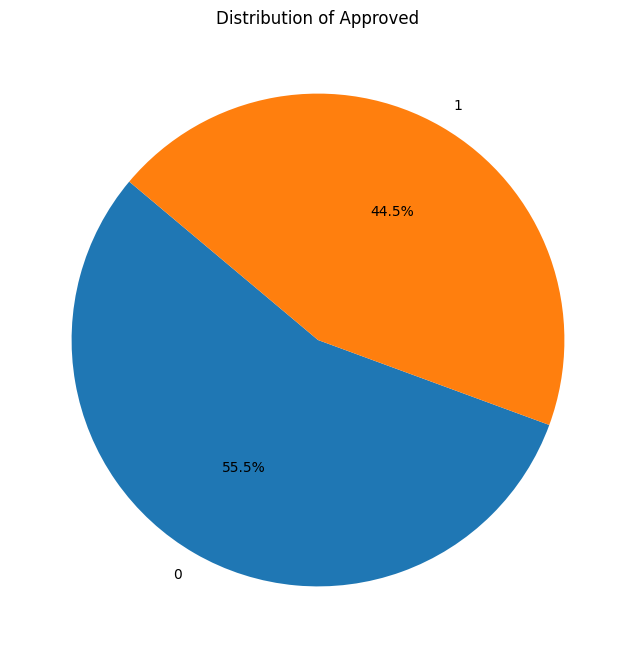

In [ ]:
column_name = 'Approved'  # Change this to the column you want to visualize
column_data = data[column_name].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(column_data, labels=column_data.index, autopct='%1.1f%%', startangle=140)
plt.title(f"Distribution of {column_name}")
plt.show()

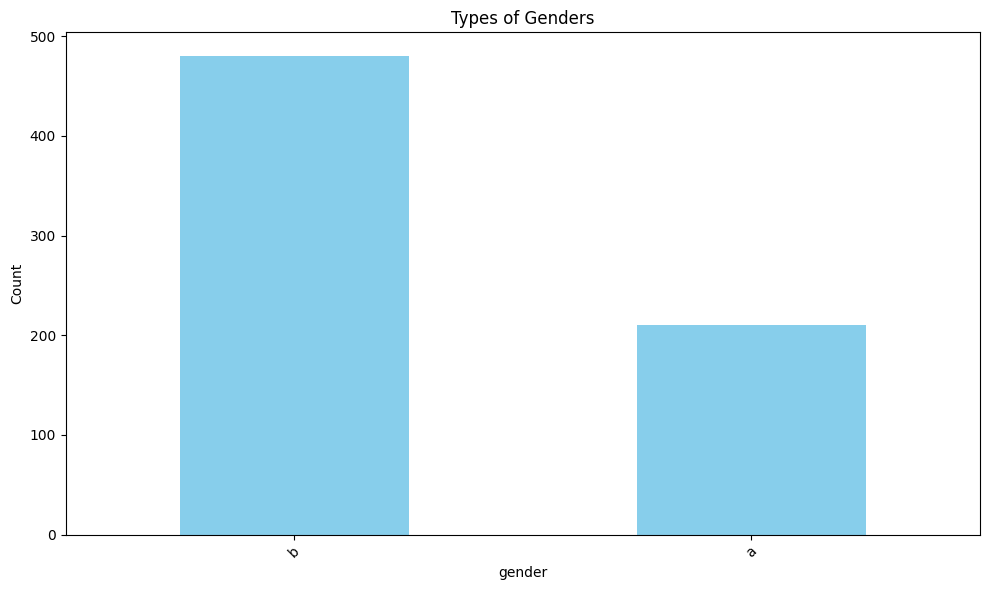

In [ ]:
industry_counts = data['Gender'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
industry_counts.plot(kind='bar', color='skyblue')

# Customize the chart
plt.title('Types of Genders')
plt.xlabel('gender')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

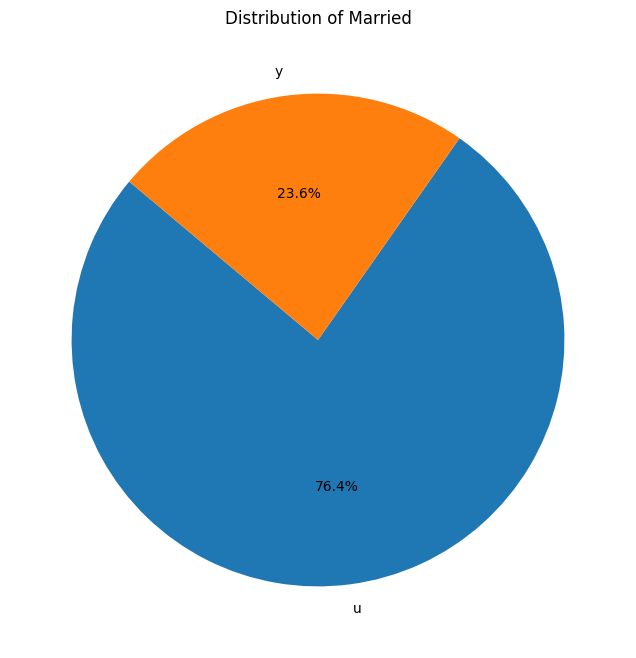

In [ ]:
column_name = 'Married'  # Change this to the column you want to visualize
column_data = data[column_name].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(column_data, labels=column_data.index, autopct='%1.1f%%', startangle=140)
plt.title(f"Distribution of {column_name}")
plt.show()

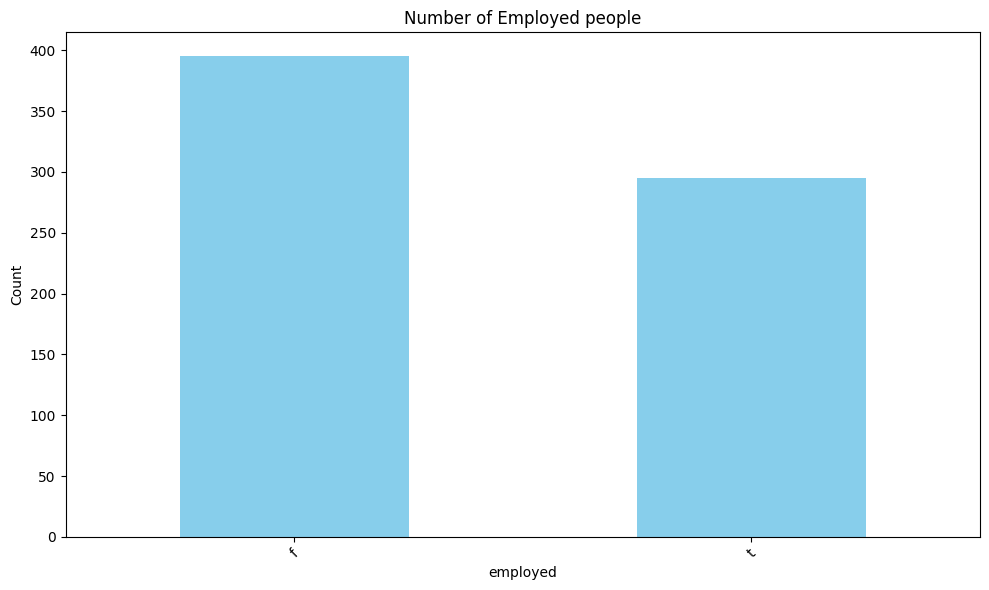

In [ ]:
industry_counts = data['Employed'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
industry_counts.plot(kind='bar', color='skyblue')

# Customize the chart
plt.title('Number of Employed people')
plt.xlabel('employed')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

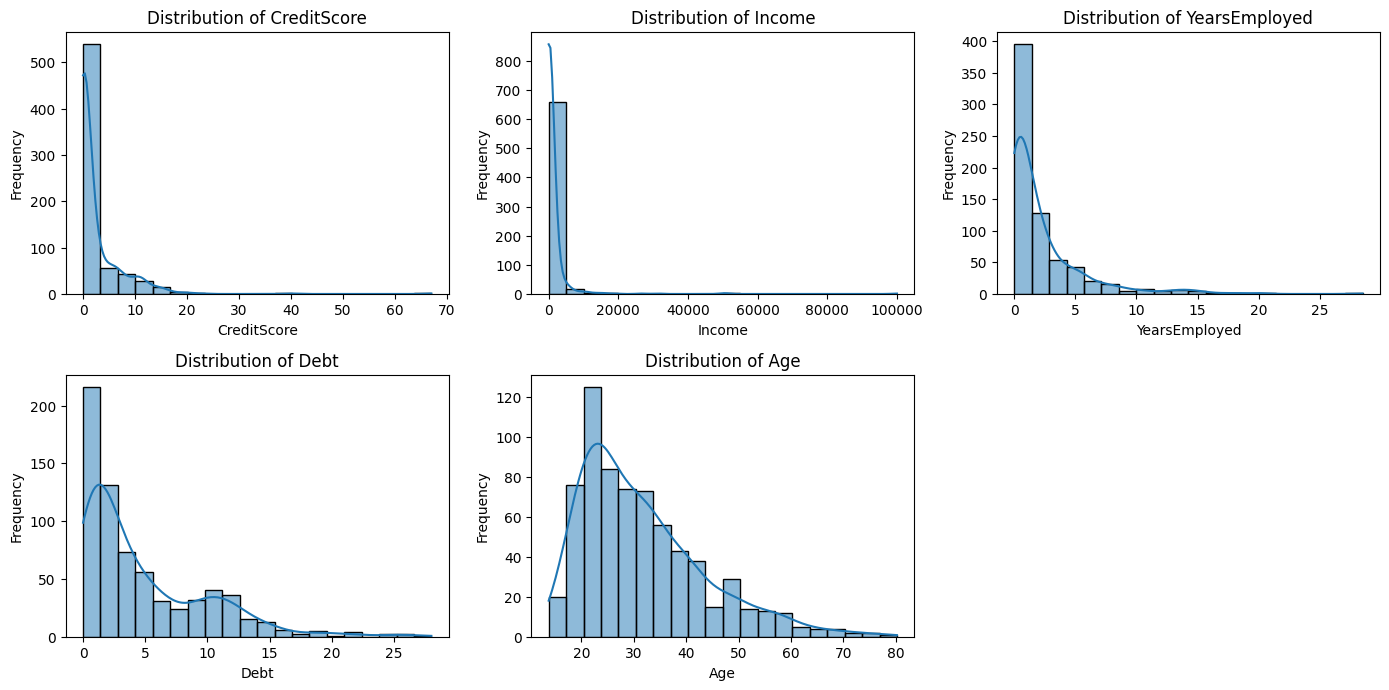

In [ ]:
plt.figure(figsize=(14, 10))

# List of continuous attributes to plot
continuous_attributes = ['CreditScore','Income','YearsEmployed','Debt','Age']

for i, attribute in enumerate(continuous_attributes, start=1):
    plt.subplot(3, 3, i)
    sns.histplot(data[attribute], bins=20, kde=True)  # KDE adds a density plot
    plt.title(f'Distribution of {attribute}')
    plt.xlabel(attribute)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

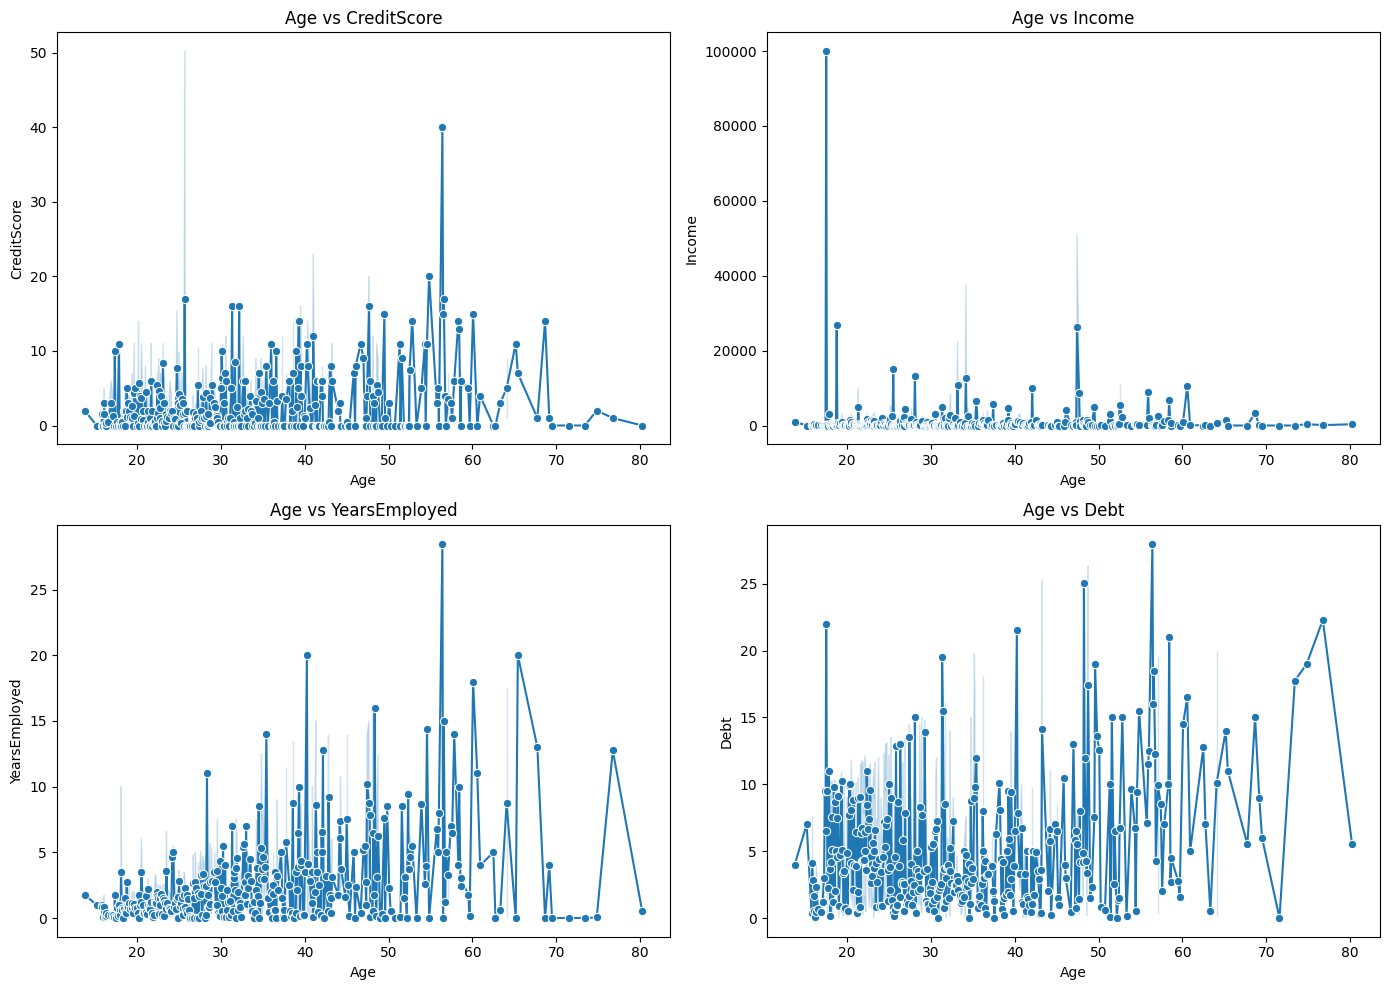

In [ ]:
plt.figure(figsize=(14, 10))

# List of continuous attributes to plot
continuous_attributes = ['CreditScore','Income','YearsEmployed','Debt']

for i, attribute in enumerate(continuous_attributes, start=1):
    plt.subplot(2, 2, i)
    sns.lineplot(data, x='Age', y=attribute, marker='o')
    plt.title(f'Age vs {attribute}')
    plt.xlabel('Age')
    plt.ylabel(attribute)

plt.tight_layout()
plt.show()

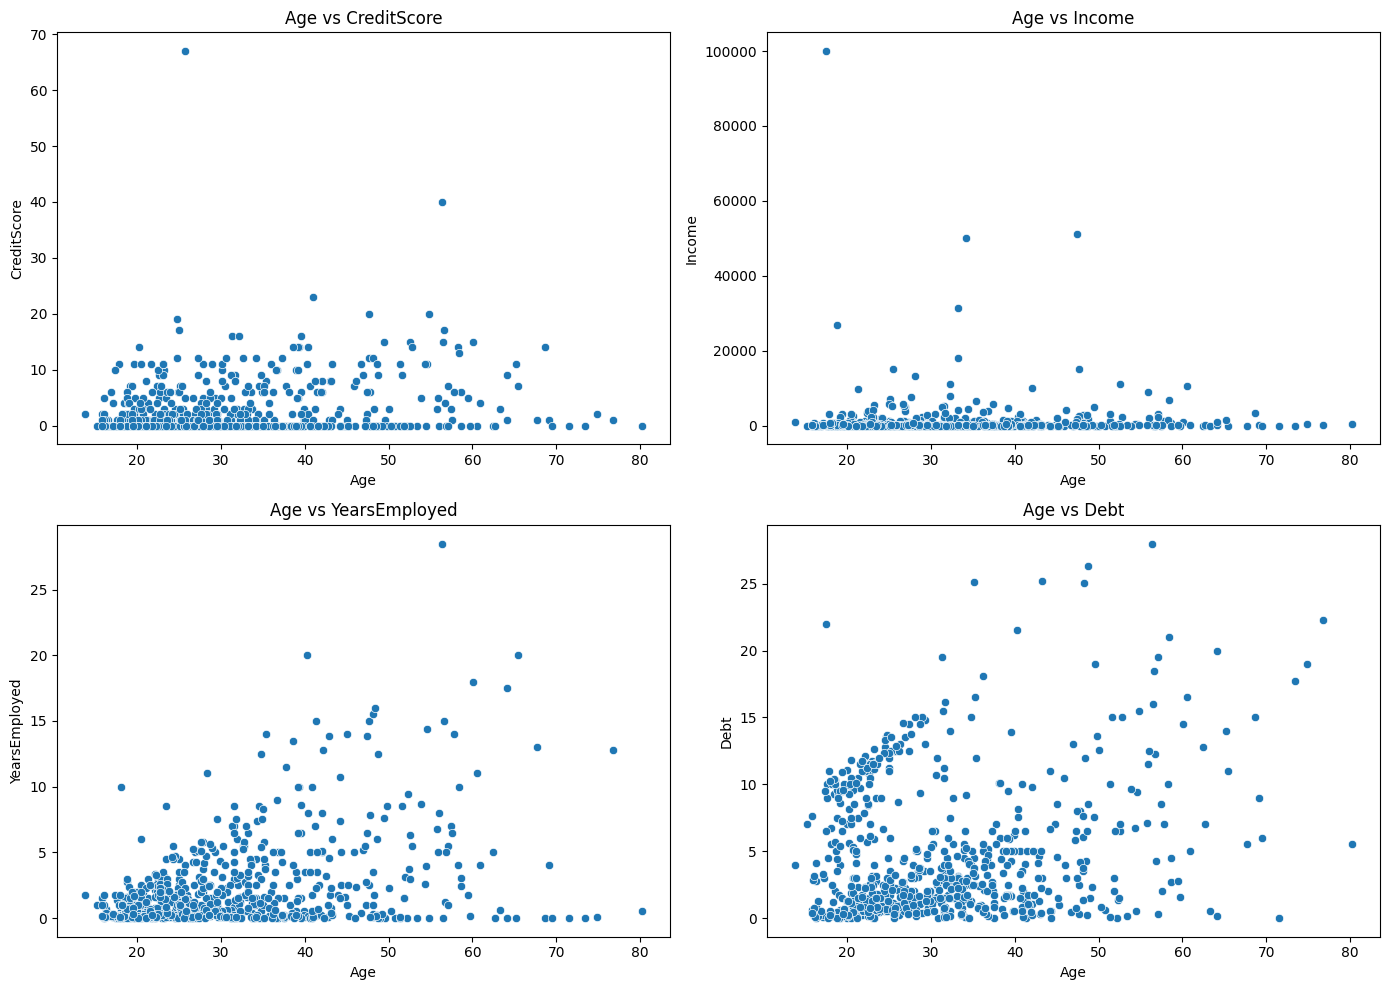

In [ ]:
continuous_attributes = ['CreditScore','Income','YearsEmployed','Debt']

plt.figure(figsize=(14, 10))

for i, attribute in enumerate(continuous_attributes, start=1):
    plt.subplot(2, 2, i)
    sns.scatterplot(data, x='Age', y=attribute)
    plt.title(f'Age vs {attribute}')
    plt.xlabel('Age')
    plt.ylabel(attribute)

plt.tight_layout()
plt.show()

In [ ]:
c=data.select_dtypes(include="number").corr()
c

Age      Debt  YearsEmployed  CreditScore    Income
Age            1.000000  0.201316       0.392787     0.185575  0.018539
Debt           0.201316  1.000000       0.298902     0.271207  0.123121
YearsEmployed  0.392787  0.298902       1.000000     0.322330  0.051345
CreditScore    0.185575  0.271207       0.322330     1.000000  0.063692
Income         0.018539  0.123121       0.051345     0.063692  1.000000

<Axes: >

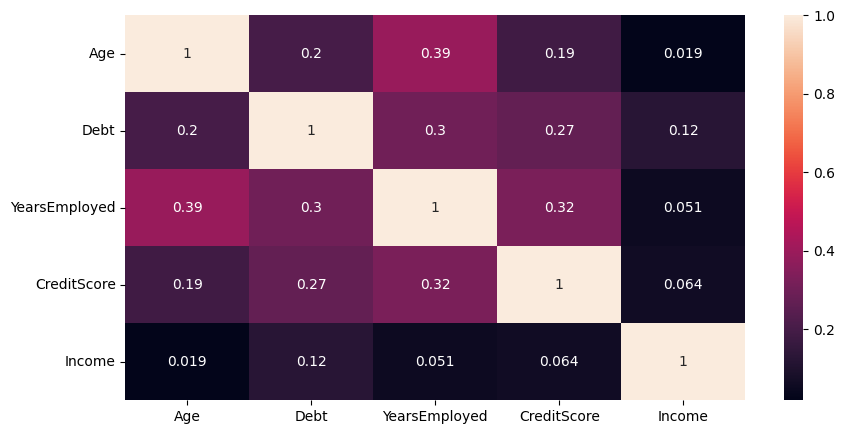

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(c,annot=True)

# LOGISTIC REGRESSION

In [ ]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.40, random_state=42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.30, random_state=42)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.25, random_state=42)
X_train4 ,X_test4, y_train4, y_test4 = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)

60-40

In [ ]:
logreg.fit(X_train1, y_train1)
predictions = logreg.predict(X_test1)
print(predictions)

['0' '1' '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '0' '0' '1' '1' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '1' '1' '0' '0' '1' '1' '0' '1' '0' '1'
 '1' '1' '1' '1' '1' '1' '0' '0' '0' '1' '0' '0' '1' '0' '0' '0' '0' '0'
 '1' '0' '1' '0' '1' '0' '1' '1' '1' '0' '0' '1' '1' '0' '1' '0' '0' '1'
 '0' '1' '0' '0' '0' '1' '1' '0' '1' '1' '0' '0' '1' '0' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '0' '0' '0' '0' '1' '1' '1' '1' '0' '1'
 '0' '1' '0' '1' '1' '0' '1' '0' '1' '1' '1' '1' '0' '0' '1' '0' '0' '0'
 '0' '0' '1' '1' '1' '0' '1' '0' '1' '1' '1' '1' '0' '1' '1' '1' '1' '1'
 '0' '0' '0' '1' '1' '0' '0' '0' '0' '1' '0' '1' '1' '1' '0' '1' '1' '0'
 '0' '0' '0' '0' '0' '1' '0' '1' '0' '0' '1' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '1' '0' '1' '0' '0' '1' '1' '1' '0' '1' '0' '1' '0' '1' '1' '1'
 '1' '1' '1' '1' '0' '1' '1' '0' '1' '1' '0' '0' '1' '0' '1' '1' '0' '0'
 '1' '0' '0' '0' '1' '1' '0' '0' '1' '0' '0' '0' '0' '1' '0' '0' '1' '0'
 '0' '0' '1' '0' '1' '0' '0' '1' '1' '0' '0' '1' '0

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
z=confusion_matrix(y_test1, predictions)
print(z)
accuracy_score(y_test1,predictions)

[[123  28]
 [ 21 104]]


0.822463768115942

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test1,predictions))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83       151
           1       0.79      0.83      0.81       125

    accuracy                           0.82       276
   macro avg       0.82      0.82      0.82       276
weighted avg       0.82      0.82      0.82       276



70-30

In [ ]:
logreg.fit(X_train2, y_train2)
predictions = logreg.predict(X_test2)
print(predictions)

['0' '1' '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '0' '0' '1' '1' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '1' '1' '0' '0' '1' '1' '0' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '0' '0' '0' '1' '0' '0' '1' '0' '0' '0' '0' '0'
 '1' '0' '1' '0' '1' '0' '1' '1' '1' '0' '0' '1' '1' '0' '1' '0' '0' '1'
 '0' '1' '0' '0' '0' '1' '1' '0' '1' '1' '0' '0' '1' '0' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '0' '0' '0' '0' '1' '1' '1' '1' '0' '1'
 '0' '1' '0' '1' '1' '0' '1' '0' '1' '1' '1' '1' '0' '0' '1' '0' '0' '0'
 '0' '0' '1' '1' '1' '0' '1' '0' '1' '1' '1' '1' '0' '1' '1' '1' '1' '1'
 '0' '0' '0' '1' '1' '0' '0' '0' '0' '1' '0' '1' '1' '1' '0' '1' '1' '0'
 '0' '0' '0' '0' '0' '1' '0' '1' '0' '0' '1' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '1' '0' '0' '1' '1' '1' '0' '1' '0' '1' '0' '1' '1' '1'
 '1' '1' '1' '1' '0' '1' '1' '0' '1']


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
z=confusion_matrix(y_test2, predictions)
print(z)
accuracy_score(y_test2,predictions)

[[90 20]
 [16 81]]


0.8260869565217391

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test2,predictions))

              precision    recall  f1-score   support

           0       0.85      0.82      0.83       110
           1       0.80      0.84      0.82        97

    accuracy                           0.83       207
   macro avg       0.83      0.83      0.83       207
weighted avg       0.83      0.83      0.83       207



75-25

In [ ]:
logreg.fit(X_train3, y_train3)
predictions = logreg.predict(X_test3)
print(predictions)

['0' '1' '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '0' '1' '0' '1' '0' '0'
 '0' '0' '0' '0' '0' '1' '0' '0' '1' '1' '0' '0' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '0' '1' '0' '1' '0' '0' '1' '0' '0' '0' '0' '0'
 '1' '0' '1' '0' '0' '0' '1' '1' '1' '1' '0' '1' '1' '0' '1' '0' '0' '1'
 '0' '1' '0' '0' '0' '1' '1' '0' '1' '1' '0' '0' '1' '0' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '0' '0' '0' '0' '1' '1' '1' '1' '0' '1'
 '0' '1' '0' '1' '1' '0' '1' '0' '1' '1' '1' '1' '0' '0' '1' '0' '0' '1'
 '0' '0' '1' '1' '1' '0' '1' '0' '1' '1' '1' '1' '0' '1' '1' '1' '1' '1'
 '0' '0' '0' '1' '1' '0' '0' '0' '0' '1' '0' '1' '1' '1' '0' '0' '1' '0'
 '0' '0' '0' '0' '0' '1' '0' '1' '0' '0' '1']


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
z=confusion_matrix(y_test3, predictions)
print(z)
accuracy_score(y_test3,predictions)

[[73 18]
 [12 70]]


0.8265895953757225

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test3,predictions))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        91
           1       0.80      0.85      0.82        82

    accuracy                           0.83       173
   macro avg       0.83      0.83      0.83       173
weighted avg       0.83      0.83      0.83       173



80-20

In [ ]:
logreg.fit(X_train4, y_train4)
predictions = logreg.predict(X_test4)
print(predictions)

['0' '1' '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '0' '1' '0' '1' '0' '0'
 '0' '0' '0' '0' '0' '1' '0' '0' '1' '1' '0' '0' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '0' '1' '0' '1' '0' '0' '1' '0' '0' '0' '0' '0'
 '1' '0' '1' '0' '1' '0' '1' '1' '1' '1' '0' '1' '1' '0' '1' '0' '0' '1'
 '0' '1' '0' '0' '0' '1' '1' '0' '1' '1' '0' '0' '1' '0' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '0' '0' '0' '0' '1' '1' '1' '1' '0' '1'
 '0' '1' '0' '1' '1' '0' '1' '0' '1' '1' '1' '1' '0' '0' '1' '0' '0' '1'
 '0' '0' '1' '1' '1' '0' '1' '0' '1' '1' '1' '1']


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
z=confusion_matrix(y_test4, predictions)
print(z)
accuracy_score(y_test4,predictions)

[[53 15]
 [11 59]]


0.8115942028985508

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test4,predictions))

              precision    recall  f1-score   support

           0       0.83      0.78      0.80        68
           1       0.80      0.84      0.82        70

    accuracy                           0.81       138
   macro avg       0.81      0.81      0.81       138
weighted avg       0.81      0.81      0.81       138



# **VIF**

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i).round(1) for i in range(X.shape[1])]

    return(vif)

calc_vif(X)

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


variables   VIF
0                Age   9.2
1               Debt   2.4
2      YearsEmployed   2.1
3        CreditScore   2.1
4             Income   1.6
5           Gender_b   3.7
6          Married_y   inf
7     BankCustomer_p   inf
8         Industry_c   3.1
9        Industry_cc   1.7
10        Industry_d   1.5
11        Industry_e   2.8
12       Industry_ff  14.9
13        Industry_i   1.7
14        Industry_j   3.5
15        Industry_k   1.8
16        Industry_m   1.7
17        Industry_q   2.2
18        Industry_r   1.6
19        Industry_w   2.0
20        Industry_x   1.7
21      Ethnicity_dd   1.6
22      Ethnicity_ff  14.6
23       Ethnicity_h   3.1
24       Ethnicity_j   3.1
25       Ethnicity_n   1.6
26       Ethnicity_o   1.5
27       Ethnicity_v   6.0
28       Ethnicity_z   1.9
29    PriorDefault_t   3.2
30        Employed_t   3.1
31  DriversLicense_t   1.9
32         Citizen_s   1.3

In [ ]:
calc_vif(X.drop('Married_y', axis=1))

variables   VIF
0                Age   9.2
1               Debt   2.4
2      YearsEmployed   2.1
3        CreditScore   2.1
4             Income   1.6
5           Gender_b   3.7
6     BankCustomer_p   1.4
7         Industry_c   3.1
8        Industry_cc   1.7
9         Industry_d   1.5
10        Industry_e   2.8
11       Industry_ff  14.9
12        Industry_i   1.7
13        Industry_j   3.5
14        Industry_k   1.8
15        Industry_m   1.7
16        Industry_q   2.2
17        Industry_r   1.6
18        Industry_w   2.0
19        Industry_x   1.7
20      Ethnicity_dd   1.6
21      Ethnicity_ff  14.6
22       Ethnicity_h   3.1
23       Ethnicity_j   3.1
24       Ethnicity_n   1.6
25       Ethnicity_o   1.5
26       Ethnicity_v   6.0
27       Ethnicity_z   1.9
28    PriorDefault_t   3.2
29        Employed_t   3.1
30  DriversLicense_t   1.9
31         Citizen_s   1.3

In [ ]:
calc_vif(X.drop(['Married_y','Ethnicity_ff'], axis=1))

variables  VIF
0                Age  9.1
1               Debt  2.4
2      YearsEmployed  2.1
3        CreditScore  2.1
4             Income  1.5
5           Gender_b  3.7
6     BankCustomer_p  1.4
7         Industry_c  3.0
8        Industry_cc  1.7
9         Industry_d  1.5
10        Industry_e  2.7
11       Industry_ff  2.0
12        Industry_i  1.7
13        Industry_j  2.8
14        Industry_k  1.8
15        Industry_m  1.7
16        Industry_q  2.2
17        Industry_r  1.6
18        Industry_w  2.0
19        Industry_x  1.7
20      Ethnicity_dd  1.6
21       Ethnicity_h  3.0
22       Ethnicity_j  2.6
23       Ethnicity_n  1.6
24       Ethnicity_o  1.4
25       Ethnicity_v  5.7
26       Ethnicity_z  1.9
27    PriorDefault_t  3.2
28        Employed_t  3.1
29  DriversLicense_t  1.9
30         Citizen_s  1.3

In [ ]:
calc_vif(X.drop(['Married_y','Ethnicity_ff','Age'], axis=1))

variables  VIF
0               Debt  2.3
1      YearsEmployed  2.0
2        CreditScore  2.1
3             Income  1.5
4           Gender_b  3.6
5     BankCustomer_p  1.4
6         Industry_c  2.7
7        Industry_cc  1.6
8         Industry_d  1.4
9         Industry_e  2.6
10       Industry_ff  1.4
11        Industry_i  1.4
12        Industry_j  2.7
13        Industry_k  1.7
14        Industry_m  1.6
15        Industry_q  2.1
16        Industry_r  1.6
17        Industry_w  1.9
18        Industry_x  1.6
19      Ethnicity_dd  1.6
20       Ethnicity_h  2.8
21       Ethnicity_j  2.6
22       Ethnicity_n  1.6
23       Ethnicity_o  1.4
24       Ethnicity_v  5.2
25       Ethnicity_z  1.9
26    PriorDefault_t  3.1
27        Employed_t  3.1
28  DriversLicense_t  1.9
29         Citizen_s  1.3

In [ ]:
calc_vif(X.drop(['Married_y','Ethnicity_ff','Age','Industry_j'], axis=1))

variables  VIF
0               Debt  2.3
1      YearsEmployed  2.0
2        CreditScore  2.1
3             Income  1.5
4           Gender_b  3.6
5     BankCustomer_p  1.4
6         Industry_c  2.7
7        Industry_cc  1.6
8         Industry_d  1.4
9         Industry_e  2.6
10       Industry_ff  1.3
11        Industry_i  1.4
12        Industry_k  1.6
13        Industry_m  1.6
14        Industry_q  2.1
15        Industry_r  1.6
16        Industry_w  1.9
17        Industry_x  1.6
18      Ethnicity_dd  1.6
19       Ethnicity_h  2.8
20       Ethnicity_j  1.0
21       Ethnicity_n  1.6
22       Ethnicity_o  1.4
23       Ethnicity_v  5.2
24       Ethnicity_z  1.9
25    PriorDefault_t  3.1
26        Employed_t  3.1
27  DriversLicense_t  1.9
28         Citizen_s  1.3

In [ ]:
calc_vif(X.drop(['Married_y','Ethnicity_ff','Age','Industry_j','Ethnicity_v'], axis=1))

variables  VIF
0               Debt  2.3
1      YearsEmployed  1.9
2        CreditScore  2.1
3             Income  1.5
4           Gender_b  3.5
5     BankCustomer_p  1.4
6         Industry_c  2.0
7        Industry_cc  1.4
8         Industry_d  1.3
9         Industry_e  2.6
10       Industry_ff  1.3
11        Industry_i  1.4
12        Industry_k  1.4
13        Industry_m  1.5
14        Industry_q  1.6
15        Industry_r  1.6
16        Industry_w  1.5
17        Industry_x  1.5
18      Ethnicity_dd  1.6
19       Ethnicity_h  1.5
20       Ethnicity_j  1.0
21       Ethnicity_n  1.6
22       Ethnicity_o  1.4
23       Ethnicity_z  1.8
24    PriorDefault_t  3.0
25        Employed_t  3.1
26  DriversLicense_t  1.9
27         Citizen_s  1.3

In [ ]:
calc_vif(X.drop(['Married_y','Ethnicity_ff','Age','Industry_j','Ethnicity_v','Gender_b'], axis=1))

variables  VIF
0               Debt  2.2
1      YearsEmployed  1.9
2        CreditScore  2.1
3             Income  1.5
4     BankCustomer_p  1.3
5         Industry_c  1.6
6        Industry_cc  1.3
7         Industry_d  1.2
8         Industry_e  2.5
9        Industry_ff  1.2
10        Industry_i  1.2
11        Industry_k  1.2
12        Industry_m  1.3
13        Industry_q  1.5
14        Industry_r  1.6
15        Industry_w  1.3
16        Industry_x  1.4
17      Ethnicity_dd  1.6
18       Ethnicity_h  1.5
19       Ethnicity_j  1.0
20       Ethnicity_n  1.6
21       Ethnicity_o  1.4
22       Ethnicity_z  1.8
23    PriorDefault_t  3.0
24        Employed_t  3.1
25  DriversLicense_t  1.9
26         Citizen_s  1.3

In [ ]:
calc_vif(X.drop(['Married_y','Ethnicity_ff','Age','Industry_j','Ethnicity_v','Gender_b','Income'], axis=1))

variables  VIF
0               Debt  2.2
1      YearsEmployed  1.9
2        CreditScore  2.1
3     BankCustomer_p  1.3
4         Industry_c  1.6
5        Industry_cc  1.3
6         Industry_d  1.2
7         Industry_e  2.4
8        Industry_ff  1.2
9         Industry_i  1.2
10        Industry_k  1.2
11        Industry_m  1.3
12        Industry_q  1.5
13        Industry_r  1.6
14        Industry_w  1.3
15        Industry_x  1.4
16      Ethnicity_dd  1.6
17       Ethnicity_h  1.5
18       Ethnicity_j  1.0
19       Ethnicity_n  1.5
20       Ethnicity_o  1.0
21       Ethnicity_z  1.8
22    PriorDefault_t  3.0
23        Employed_t  3.1
24  DriversLicense_t  1.9
25         Citizen_s  1.2

In [ ]:
calc_vif(X.drop(['Married_y','Ethnicity_ff','Age','Industry_j','Ethnicity_v','Gender_b','Income','PriorDefault_t'], axis=1))

variables  VIF
0               Debt  2.2
1      YearsEmployed  1.9
2        CreditScore  2.1
3     BankCustomer_p  1.3
4         Industry_c  1.6
5        Industry_cc  1.2
6         Industry_d  1.2
7         Industry_e  2.4
8        Industry_ff  1.2
9         Industry_i  1.2
10        Industry_k  1.2
11        Industry_m  1.3
12        Industry_q  1.5
13        Industry_r  1.5
14        Industry_w  1.3
15        Industry_x  1.3
16      Ethnicity_dd  1.6
17       Ethnicity_h  1.5
18       Ethnicity_j  1.0
19       Ethnicity_n  1.5
20       Ethnicity_o  1.0
21       Ethnicity_z  1.8
22        Employed_t  2.9
23  DriversLicense_t  1.9
24         Citizen_s  1.2

In [ ]:
X_nomulti=X.drop(['Married_y','Ethnicity_ff','Age','Industry_j','Ethnicity_v','Gender_b','Income','PriorDefault_t'], axis=1)

In [ ]:
X_train1_nomulti, X_test1_nomulti, y_train1_nomulti, y_test1_nomulti = train_test_split(X_nomulti, y, test_size=0.40, random_state=42)
X_train2_nomulti, X_test2_nomulti, y_train2_nomulti, y_test2_nomulti = train_test_split(X_nomulti, y, test_size=0.30, random_state=42)
X_train3_nomulti, X_test3_nomulti, y_train3_nomulti, y_test3_nomulti = train_test_split(X_nomulti, y, test_size=0.25, random_state=42)
X_train4_nomulti, X_test4_nomulti, y_train4_nomulti, y_test4_nomulti = train_test_split(X_nomulti, y, test_size=0.20, random_state=42)

# logistic regression after **VIF**

60-40

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)

logreg.fit(X_train1_nomulti, y_train1_nomulti)
predictions1 = logreg.predict(X_test1_nomulti)
print(predictions1)

['0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '0' '0' '1' '1' '0' '0'
 '0' '1' '0' '0' '0' '1' '0' '0' '1' '1' '0' '0' '1' '1' '0' '1' '0' '1'
 '1' '1' '0' '1' '1' '1' '0' '1' '0' '1' '0' '0' '0' '0' '0' '1' '0' '0'
 '1' '0' '1' '0' '1' '0' '1' '1' '1' '0' '0' '1' '1' '0' '1' '0' '1' '0'
 '0' '0' '0' '0' '0' '0' '1' '1' '1' '1' '1' '0' '1' '0' '1' '1' '1' '1'
 '1' '0' '1' '0' '0' '1' '1' '0' '0' '0' '0' '1' '1' '0' '1' '0' '0' '1'
 '0' '1' '0' '1' '1' '0' '0' '0' '1' '1' '1' '1' '0' '0' '1' '1' '0' '0'
 '0' '1' '1' '1' '1' '0' '0' '0' '1' '1' '1' '1' '0' '1' '0' '0' '1' '1'
 '0' '0' '0' '1' '0' '0' '0' '0' '0' '1' '1' '1' '1' '0' '0' '1' '1' '0'
 '0' '0' '0' '0' '0' '1' '0' '0' '0' '0' '1' '0' '0' '0' '0' '0' '0' '0'
 '1' '1' '1' '1' '1' '0' '0' '1' '0' '1' '0' '1' '0' '0' '0' '1' '1' '1'
 '1' '1' '0' '1' '0' '1' '1' '0' '1' '1' '0' '0' '1' '1' '1' '0' '0' '1'
 '0' '0' '1' '0' '0' '1' '1' '0' '1' '0' '0' '0' '0' '1' '0' '0' '0' '0'
 '0' '0' '1' '0' '1' '0' '0' '1' '0' '0' '0' '1' '0

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
z=confusion_matrix(y_test1_nomulti, predictions1)
z

array([[121,  30],
       [ 32,  93]])

In [ ]:
accuracy_score(y_test1_nomulti,predictions1)

0.7753623188405797

In [ ]:
print(classification_report(y_test1_nomulti,predictions1))

              precision    recall  f1-score   support

           0       0.79      0.80      0.80       151
           1       0.76      0.74      0.75       125

    accuracy                           0.78       276
   macro avg       0.77      0.77      0.77       276
weighted avg       0.78      0.78      0.78       276



70-30

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)

logreg.fit(X_train2_nomulti, y_train2_nomulti)
predictions2 = logreg.predict(X_test2_nomulti)
print(predictions2)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


['0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '1' '0' '0'
 '0' '1' '0' '0' '0' '1' '0' '0' '1' '1' '0' '0' '1' '1' '0' '1' '0' '1'
 '1' '1' '0' '1' '1' '1' '0' '1' '0' '1' '0' '0' '0' '0' '0' '1' '0' '0'
 '0' '0' '1' '0' '1' '0' '1' '1' '1' '0' '0' '1' '1' '0' '1' '0' '1' '0'
 '0' '0' '0' '1' '0' '0' '0' '1' '1' '1' '0' '0' '0' '0' '1' '1' '1' '1'
 '1' '0' '1' '0' '0' '1' '1' '0' '0' '0' '0' '1' '1' '0' '1' '0' '0' '1'
 '0' '1' '0' '1' '0' '0' '0' '0' '1' '1' '1' '1' '0' '0' '1' '1' '0' '0'
 '0' '1' '1' '1' '1' '0' '0' '0' '1' '1' '1' '1' '0' '1' '0' '0' '1' '1'
 '0' '0' '0' '1' '0' '0' '0' '0' '0' '1' '0' '1' '1' '0' '0' '1' '1' '0'
 '0' '0' '0' '0' '0' '1' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '1' '1' '1' '1' '1' '0' '0' '1' '0' '0' '0' '1' '0' '0' '0' '1' '1' '1'
 '1' '1' '0' '1' '0' '1' '0' '0' '1']


In [ ]:
z=confusion_matrix(y_test2_nomulti, predictions2)
z

array([[90, 20],
       [33, 64]])

In [ ]:
accuracy_score(y_test2_nomulti,predictions2)

0.7439613526570048

In [ ]:
print(classification_report(y_test2_nomulti,predictions2))

              precision    recall  f1-score   support

           0       0.73      0.82      0.77       110
           1       0.76      0.66      0.71        97

    accuracy                           0.74       207
   macro avg       0.75      0.74      0.74       207
weighted avg       0.75      0.74      0.74       207



75-25

In [ ]:
logreg.fit(X_train3_nomulti, y_train3_nomulti)
predictions3 = logreg.predict(X_test3_nomulti)
print(predictions3)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


['0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '0' '0' '1' '1' '0' '0'
 '1' '1' '0' '1' '0' '1' '0' '0' '1' '1' '0' '0' '1' '1' '0' '1' '0' '1'
 '1' '1' '0' '1' '1' '1' '0' '1' '0' '1' '0' '0' '0' '0' '0' '1' '0' '0'
 '0' '0' '1' '0' '1' '0' '1' '1' '1' '0' '0' '1' '1' '0' '1' '0' '1' '0'
 '0' '0' '0' '1' '0' '0' '0' '1' '1' '1' '0' '0' '0' '0' '1' '1' '1' '1'
 '1' '0' '1' '0' '0' '1' '1' '0' '0' '0' '0' '1' '1' '0' '1' '0' '0' '1'
 '0' '1' '0' '1' '0' '0' '0' '0' '1' '1' '1' '1' '0' '0' '1' '1' '0' '0'
 '0' '1' '1' '1' '1' '0' '1' '0' '1' '1' '1' '1' '0' '1' '0' '0' '1' '1'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '0' '1' '1' '0' '0' '1' '1' '0'
 '0' '0' '0' '0' '0' '1' '0' '0' '0' '1' '1']


In [ ]:
z=confusion_matrix(y_test3_nomulti, predictions3)
z

array([[74, 17],
       [25, 57]])

In [ ]:
accuracy_score(y_test3_nomulti,predictions3)

0.7572254335260116

In [ ]:
print(classification_report(y_test3_nomulti,predictions3))

              precision    recall  f1-score   support

           0       0.75      0.81      0.78        91
           1       0.77      0.70      0.73        82

    accuracy                           0.76       173
   macro avg       0.76      0.75      0.75       173
weighted avg       0.76      0.76      0.76       173



80-20

In [ ]:
logreg.fit(X_train4_nomulti, y_train4_nomulti)
predictions4 = logreg.predict(X_test4_nomulti)
print(predictions4)

['0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '0' '0' '1' '1' '0' '0'
 '1' '1' '0' '1' '0' '1' '0' '0' '1' '1' '0' '0' '1' '1' '0' '1' '0' '1'
 '1' '1' '0' '1' '1' '1' '0' '1' '0' '1' '0' '0' '0' '0' '0' '0' '0' '0'
 '1' '0' '1' '0' '1' '0' '1' '1' '1' '0' '0' '1' '1' '0' '1' '0' '1' '0'
 '0' '0' '0' '1' '0' '0' '1' '1' '1' '1' '0' '0' '0' '0' '1' '1' '1' '1'
 '1' '0' '1' '0' '0' '1' '1' '0' '0' '0' '0' '1' '1' '0' '1' '0' '0' '1'
 '0' '1' '0' '1' '0' '0' '0' '0' '1' '1' '1' '1' '0' '0' '1' '0' '0' '0'
 '0' '1' '1' '1' '1' '0' '0' '0' '1' '1' '1' '1']


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
z=confusion_matrix(y_test4_nomulti, predictions4)
z

array([[56, 12],
       [20, 50]])

In [ ]:
accuracy_score(y_test4_nomulti,predictions4)

0.7681159420289855

In [ ]:
print(classification_report(y_test4_nomulti,predictions4))

              precision    recall  f1-score   support

           0       0.74      0.82      0.78        68
           1       0.81      0.71      0.76        70

    accuracy                           0.77       138
   macro avg       0.77      0.77      0.77       138
weighted avg       0.77      0.77      0.77       138



# KNN before **VIF**

60-40

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model=KNeighborsClassifier(n_neighbors=25)

In [ ]:
model.fit(X_train1, y_train1)

KNeighborsClassifier(n_neighbors=25)

In [ ]:
y_pred1 = model.predict(X_test1)
y_pred1

array(['0', '1', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0',
       '0', '1', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0',
       '1', '0', '0', '1', '1', '1', '1', '0', '0', '1', '1', '0', '1',
       '1', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '1', '1', '1', '1', '0', '1', '0', '1', '0', '0',
       '1', '1', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0',
       '1', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '1', '0',
       '0', '1', '1', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0',
       '1', '0', '0', '1', '0', '1', '0', '1', '1', '0', '0', '0', '1',
       '1', '1', '1', '0', '1', '1', '1', '0', '0', '0', '0', '1', '1',
       '1', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '1', '0', '1',
       '1', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '1', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0

In [ ]:
knn = pd.DataFrame({'Predicted':y_pred1,'Actual':y_test1})
knn

Predicted Actual
286         0      0
511         1      1
257         0      0
336         1      0
318         0      1
..        ...    ...
637         1      0
238         0      1
0           0      1
682         0      0
548         1      1

[276 rows x 2 columns]

Evaluation Metric

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test1,y_pred1)

0.7065217391304348

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test1,y_pred1)
cm

array([[126,  25],
       [ 56,  69]])

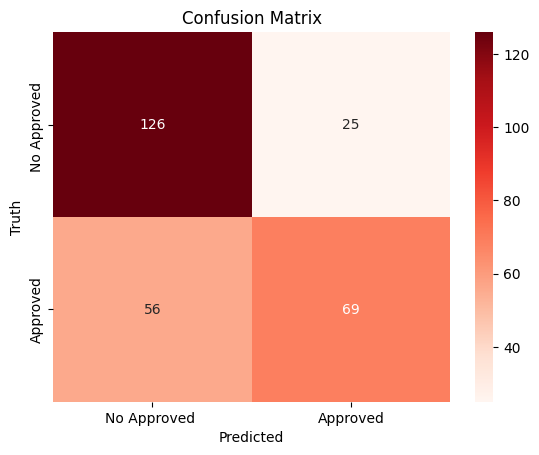

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=["No Approved ", "Approved"], yticklabels=["No Approved ","Approved"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()


In [ ]:
from sklearn.metrics import classification_report
classification_rep = classification_report(y_test1, y_pred1)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.69      0.83      0.76       151
           1       0.73      0.55      0.63       125

    accuracy                           0.71       276
   macro avg       0.71      0.69      0.69       276
weighted avg       0.71      0.71      0.70       276



70-30

In [ ]:
model.fit(X_train2, y_train2)

KNeighborsClassifier(n_neighbors=25)

In [ ]:
y_pred2 = model.predict(X_test2)
y_pred2

array(['0', '1', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0',
       '0', '1', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0',
       '1', '0', '0', '1', '0', '1', '1', '0', '0', '1', '1', '0', '0',
       '1', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '1', '1', '1', '1', '0', '1', '0', '1', '0', '0',
       '1', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '1', '0',
       '0', '1', '1', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0',
       '1', '0', '0', '1', '0', '1', '0', '1', '1', '0', '0', '0', '1',
       '1', '1', '1', '0', '1', '1', '0', '0', '0', '0', '0', '0', '1',
       '1', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '1', '0', '1',
       '1', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '1', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0

In [ ]:
knn = pd.DataFrame({'Predicted':y_pred2,'Actual':y_test2})
knn

Predicted Actual
286         0      0
511         1      1
257         0      0
336         1      0
318         0      1
..        ...    ...
601         0      0
66          1      1
11          0      1
674         1      0
559         1      1

[207 rows x 2 columns]

Evaluation Metric

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test2,y_pred2)

0.6811594202898551

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test2,y_pred2)
cm

array([[92, 18],
       [48, 49]])

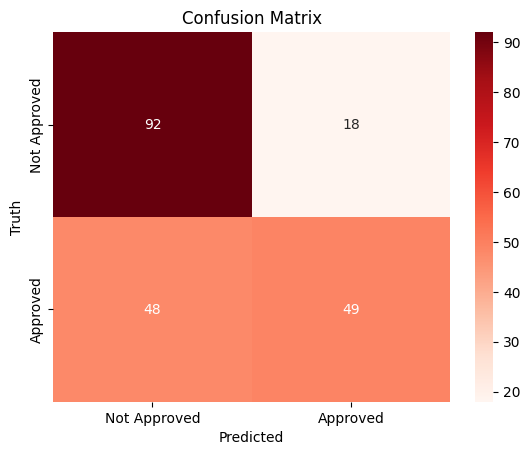

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=["Not Approved", "Approved"], yticklabels=["Not Approved", "Approved"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
classification_rep = classification_report(y_test2, y_pred2)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.66      0.84      0.74       110
           1       0.73      0.51      0.60        97

    accuracy                           0.68       207
   macro avg       0.69      0.67      0.67       207
weighted avg       0.69      0.68      0.67       207



75-25

In [ ]:
model.fit(X_train3, y_train3)

KNeighborsClassifier(n_neighbors=25)

In [ ]:
y_pred3 = model.predict(X_test3)
y_pred3

array(['0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0',
       '0', '1', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0',
       '1', '0', '0', '1', '0', '1', '1', '0', '0', '1', '1', '0', '0',
       '1', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '1', '1', '1', '0', '1', '0', '1', '0', '0',
       '1', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0',
       '0', '1', '1', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0',
       '1', '0', '0', '1', '0', '0', '0', '1', '1', '0', '0', '0', '1',
       '0', '1', '1', '0', '1', '1', '0', '0', '0', '0', '0', '1', '1',
       '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '1', '0', '1',
       '1', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '1', '0',
       '0', '0', '0', '0'], dtype=object)

In [ ]:
knn = pd.DataFrame({'Predicted':y_pred3,'Actual':y_test3})
knn

Predicted Actual
286         0      0
511         1      1
257         0      0
336         0      0
318         0      1
..        ...    ...
357         0      0
215         0      1
629         0      0
390         0      0
174         0      1

[173 rows x 2 columns]

Evaluation Metric

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test3,y_pred3)

0.6647398843930635

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test3,y_pred3)
cm

array([[78, 13],
       [45, 37]])

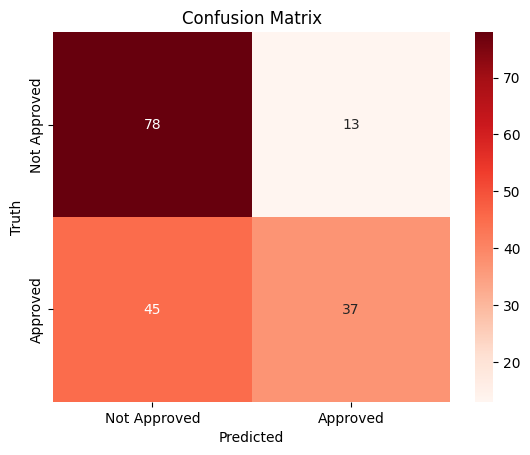

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=["Not Approved", "Approved"], yticklabels=["Not Approved", "Approved"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
classification_rep = classification_report(y_test3, y_pred3)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.63      0.86      0.73        91
           1       0.74      0.45      0.56        82

    accuracy                           0.66       173
   macro avg       0.69      0.65      0.64       173
weighted avg       0.68      0.66      0.65       173



80-20

In [ ]:
model.fit(X_train4, y_train4)

KNeighborsClassifier(n_neighbors=25)

In [ ]:
y_pred4 = model.predict(X_test4)
y_pred4

array(['0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0',
       '0', '1', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0',
       '1', '0', '0', '1', '0', '1', '1', '0', '0', '1', '1', '0', '0',
       '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '1', '1', '1', '1', '0', '1', '0', '1', '0', '0',
       '1', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0',
       '0', '1', '1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0',
       '1', '0', '0', '1', '0', '0', '0', '1', '1', '0', '1', '0', '1',
       '0', '1', '1', '0', '1', '1', '0', '0', '0', '0', '0', '0', '1',
       '0', '0', '0', '1', '1', '0', '0', '0'], dtype=object)

In [ ]:
knn = pd.DataFrame({'Predicted':y_pred4,'Actual':y_test4})
knn

Predicted Actual
286         0      0
511         1      1
257         0      0
336         0      0
318         0      1
..        ...    ...
333         1      0
507         1      1
24          0      1
158         0      1
518         0      1

[138 rows x 2 columns]

Evaluation Metric

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test4,y_pred4)

0.644927536231884

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test4,y_pred4)
cm

array([[58, 10],
       [39, 31]])

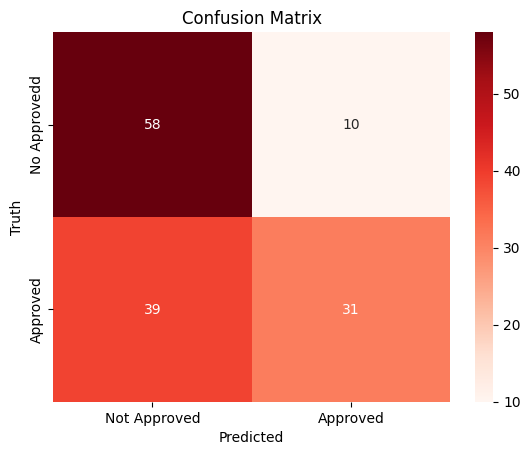

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=["Not Approved", "Approved"], yticklabels=["No Approvedd", "Approved"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
classification_rep = classification_report(y_test4, y_pred4)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.60      0.85      0.70        68
           1       0.76      0.44      0.56        70

    accuracy                           0.64       138
   macro avg       0.68      0.65      0.63       138
weighted avg       0.68      0.64      0.63       138



# KNN after **VIF**

60-40

In [ ]:
model.fit(X_train1_nomulti, y_train1_nomulti)

KNeighborsClassifier(n_neighbors=25)

In [ ]:
y_pred1_nomulti = model.predict(X_test1_nomulti)
y_pred1_nomulti

array(['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '1', '1', '0', '0', '1', '1', '0', '1', '0', '1', '1', '0', '0',
       '1', '1', '1', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '1', '0', '1', '0', '1', '1', '1', '0', '0',
       '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '1', '1', '0', '0', '0', '0', '1', '1', '1', '0', '1',
       '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '1', '1', '0',
       '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '1', '1', '1',
       '1', '0', '1', '0', '0', '1', '0', '0', '0', '0', '1', '1', '1',
       '1', '0', '0', '0', '1', '1', '1', '1', '0', '1', '0', '0', '1',
       '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1',
       '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1

In [ ]:
knn = pd.DataFrame({'Predicted':y_pred1_nomulti,'Actual':y_test1_nomulti})
knn

Predicted Actual
286         0      0
511         0      1
257         0      0
336         0      0
318         0      1
..        ...    ...
637         0      0
238         0      1
0           0      1
682         0      0
548         1      1

[276 rows x 2 columns]

Evaluation Metric

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test1_nomulti,y_pred1_nomulti)

0.7608695652173914

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test1_nomulti,y_pred1_nomulti)
cm

array([[138,  13],
       [ 53,  72]])

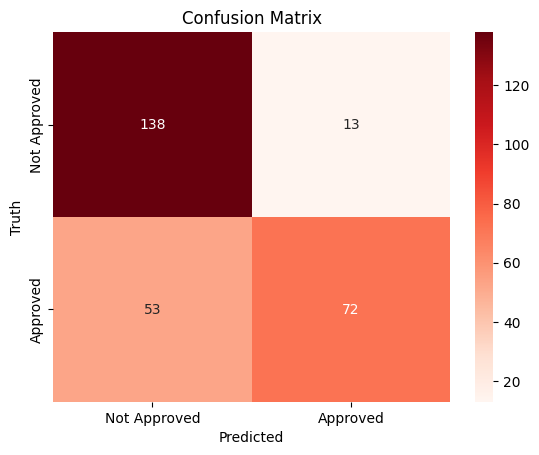

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=["Not Approved", "Approved"], yticklabels=["Not Approved", "Approved"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()


In [ ]:
classification_rep = classification_report(y_test1_nomulti, y_pred1_nomulti)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.72      0.91      0.81       151
           1       0.85      0.58      0.69       125

    accuracy                           0.76       276
   macro avg       0.78      0.74      0.75       276
weighted avg       0.78      0.76      0.75       276



70-30

In [ ]:
model.fit(X_train2_nomulti, y_train2_nomulti)

KNeighborsClassifier(n_neighbors=25)

In [ ]:
y_pred2_nomulti = model.predict(X_test2_nomulti)
y_pred2_nomulti

array(['0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0',
       '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '1', '0', '0', '0', '1', '1', '0', '1', '0', '1', '1', '0', '0',
       '1', '1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '1', '0', '1', '0', '1', '1', '1', '0', '0',
       '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '1', '1', '0', '0', '0', '0', '1', '1', '1', '0', '0',
       '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '1', '1', '1',
       '1', '0', '1', '0', '0', '1', '0', '0', '0', '0', '1', '1', '1',
       '0', '0', '0', '0', '1', '1', '1', '1', '0', '1', '0', '0', '1',
       '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1',
       '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1

In [ ]:
knn = pd.DataFrame({'Predicted':y_pred2_nomulti,'Actual':y_test2_nomulti})
knn

Predicted Actual
286         0      0
511         0      1
257         0      0
336         0      0
318         0      1
..        ...    ...
601         0      0
66          1      1
11          0      1
674         0      0
559         1      1

[207 rows x 2 columns]

Evaluation Metric

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test2_nomulti,y_pred2_nomulti)

0.7439613526570048

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test2_nomulti,y_pred2_nomulti)
cm

array([[103,   7],
       [ 46,  51]])

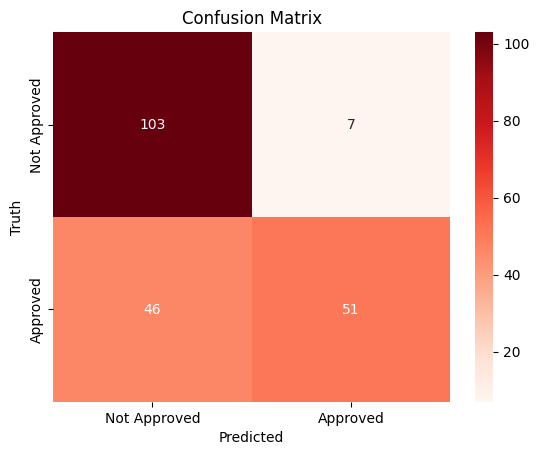

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=["Not Approved", "Approved"], yticklabels=["Not Approved", "Approved"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
classification_rep = classification_report(y_test2_nomulti, y_pred2_nomulti)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.69      0.94      0.80       110
           1       0.88      0.53      0.66        97

    accuracy                           0.74       207
   macro avg       0.79      0.73      0.73       207
weighted avg       0.78      0.74      0.73       207



75-25

In [ ]:
model.fit(X_train3_nomulti, y_train3_nomulti)

KNeighborsClassifier(n_neighbors=25)

In [ ]:
y_pred3_nomulti = model.predict(X_test3_nomulti)
y_pred3_nomulti

array(['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '1', '0', '0', '0', '1', '1', '0', '1', '0', '1', '1', '0', '0',
       '1', '1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '1', '0', '1', '0', '1', '1', '1', '0', '0',
       '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '1', '1', '0', '0', '0', '0', '1', '1', '1', '0', '1',
       '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '1', '1', '0',
       '1', '0', '1', '0', '0', '1', '0', '0', '0', '0', '1', '1', '1',
       '0', '0', '0', '0', '1', '1', '1', '1', '0', '1', '0', '0', '1',
       '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1',
       '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0',
       '0', '0', '0', '0'], dtype=object)

In [ ]:
knn = pd.DataFrame({'Predicted':y_pred3_nomulti,'Actual':y_test3_nomulti})
knn

Predicted Actual
286         0      0
511         0      1
257         0      0
336         0      0
318         0      1
..        ...    ...
357         0      0
215         0      1
629         0      0
390         0      0
174         0      1

[173 rows x 2 columns]

Evaluation metrics

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test3_nomulti,y_pred3_nomulti)

0.7456647398843931

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test3_nomulti,y_pred3_nomulti)
cm

array([[86,  5],
       [39, 43]])

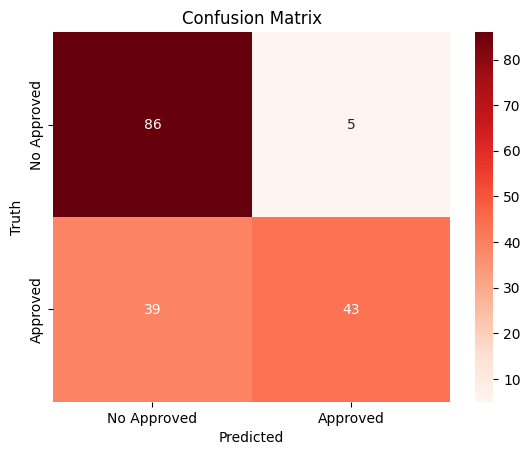

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=["No Approved", "Approved"], yticklabels=["No Approved", "Approved"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
classification_rep = classification_report(y_test3_nomulti, y_pred3_nomulti)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.69      0.95      0.80        91
           1       0.90      0.52      0.66        82

    accuracy                           0.75       173
   macro avg       0.79      0.73      0.73       173
weighted avg       0.79      0.75      0.73       173



80-20

In [ ]:
model.fit(X_train4_nomulti, y_train4_nomulti)

KNeighborsClassifier(n_neighbors=25)

In [ ]:
y_pred4_nomulti = model.predict(X_test4_nomulti)
y_pred4_nomulti

array(['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '1', '0', '0', '0', '1', '1', '0', '1', '0', '1', '1', '0', '0',
       '1', '1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1',
       '0', '0', '0', '0', '1', '0', '1', '0', '1', '1', '1', '0', '0',
       '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '1', '1', '0', '0', '0', '0', '1', '1', '1', '0', '1',
       '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '1', '1', '0',
       '1', '0', '1', '0', '0', '1', '0', '0', '0', '0', '1', '0', '1',
       '0', '0', '0', '0', '1', '1', '1', '1'], dtype=object)

In [ ]:
knn = pd.DataFrame({'Predicted':y_pred4_nomulti,'Actual':y_test4_nomulti})
knn

Predicted Actual
286         0      0
511         0      1
257         0      0
336         0      0
318         0      1
..        ...    ...
333         0      0
507         1      1
24          1      1
158         1      1
518         1      1

[138 rows x 2 columns]

Evaluation Metric

In [ ]:
accuracy_score(y_test4_nomulti,y_pred4_nomulti)

0.717391304347826

In [ ]:
cm = confusion_matrix(y_test4_nomulti,y_pred4_nomulti)
cm

array([[63,  5],
       [34, 36]])

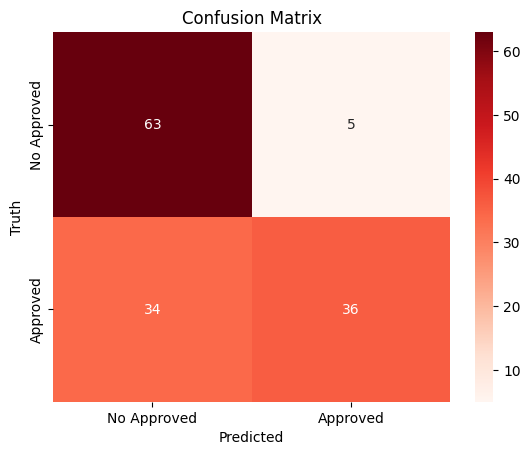

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=["No Approved", "Approved"], yticklabels=["No Approved", "Approved"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

# SVM before VIF

60-40

In [ ]:
from sklearn.svm import SVC

In [ ]:
model1 = SVC(kernel='linear')

In [ ]:
model1.fit(X_train1, y_train1)

SVC(kernel='linear')

In [ ]:
y_pred1 = model1.predict(X_test1)

In [ ]:
y_pred1

array(['0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0',
       '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0',
       '1', '1', '0', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '0', '1', '0', '1', '0', '0', '1', '0', '0', '1',
       '0', '0', '1', '0', '1', '0', '1', '0', '1', '1', '1', '1', '0',
       '1', '1', '1', '1', '0', '0', '1', '0', '0', '0', '0', '0', '1',
       '1', '0', '1', '1', '0', '0', '1', '0', '1', '1', '1', '1', '1',
       '0', '1', '1', '0', '1', '1', '1', '0', '0', '0', '0', '1', '0',
       '1', '1', '0', '1', '0', '1', '0', '1', '1', '1', '1', '0', '1',
       '1', '1', '1', '0', '0', '1', '0', '0', '0', '0', '0', '1', '1',
       '1', '0', '1', '0', '1', '1', '1', '1', '0', '1', '0', '1', '1',
       '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '1',
       '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0',
       '1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0

In [ ]:
svm = pd.DataFrame({'Predicted':y_pred1,'Actual':y_test1})
svm

Predicted Actual
286         0      0
511         1      1
257         0      0
336         0      0
318         0      1
..        ...    ...
637         0      0
238         1      1
0           1      1
682         0      0
548         1      1

[276 rows x 2 columns]

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test1,y_pred1)

0.8369565217391305

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test1,y_pred1)
cm

array([[123,  28],
       [ 17, 108]])

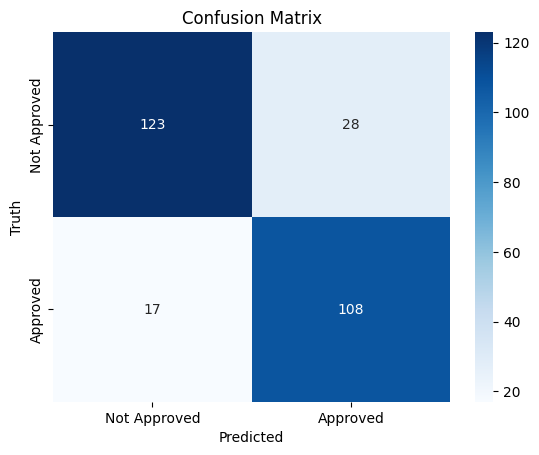

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Approved", "Approved"], yticklabels=["Not Approved", "Approved"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
classification_rep = classification_report(y_test1, y_pred1)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.88      0.81      0.85       151
           1       0.79      0.86      0.83       125

    accuracy                           0.84       276
   macro avg       0.84      0.84      0.84       276
weighted avg       0.84      0.84      0.84       276



70-30

In [ ]:
model1.fit(X_train2, y_train2)

SVC(kernel='linear')

In [ ]:
y_pred2 = model1.predict(X_test2)

In [ ]:
y_pred2

array(['0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0',
       '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0',
       '1', '1', '0', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '0', '1', '0', '1', '0', '0', '1', '0', '0', '1',
       '0', '0', '1', '0', '1', '1', '1', '0', '1', '1', '1', '0', '0',
       '1', '1', '0', '1', '0', '0', '1', '0', '1', '0', '0', '0', '1',
       '1', '0', '1', '1', '0', '0', '1', '0', '1', '1', '1', '1', '1',
       '0', '1', '1', '0', '1', '1', '1', '0', '0', '0', '0', '1', '0',
       '1', '1', '0', '1', '0', '1', '0', '1', '1', '0', '1', '0', '1',
       '1', '1', '1', '0', '0', '1', '0', '0', '0', '0', '0', '1', '1',
       '1', '0', '1', '0', '1', '1', '1', '1', '0', '1', '1', '1', '1',
       '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '1',
       '1', '1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0',
       '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0

In [ ]:
svm = pd.DataFrame({'Predicted':y_pred2,'Actual':y_test2})
svm

Predicted Actual
286         0      0
511         1      1
257         0      0
336         0      0
318         0      1
..        ...    ...
601         0      0
66          1      1
11          1      1
674         0      0
559         1      1

[207 rows x 2 columns]

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test2,y_pred2)

0.8309178743961353

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test2,y_pred2)
cm

array([[89, 21],
       [14, 83]])

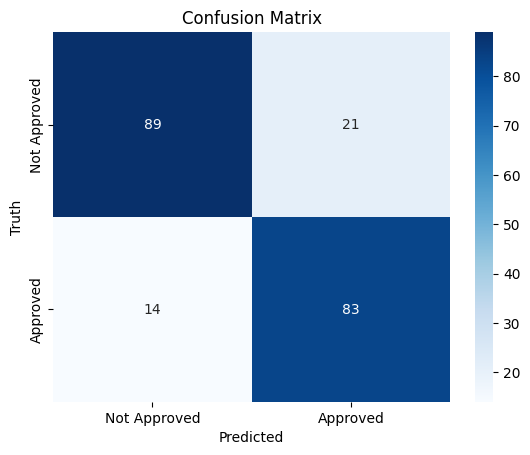

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Approved", "Approved"], yticklabels=["Not Approved", "Approved"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
classification_rep = classification_report(y_test2, y_pred2)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.86      0.81      0.84       110
           1       0.80      0.86      0.83        97

    accuracy                           0.83       207
   macro avg       0.83      0.83      0.83       207
weighted avg       0.83      0.83      0.83       207



75-25

In [ ]:
model1.fit(X_train3, y_train3)

SVC(kernel='linear')

In [ ]:
y_pred3 = model1.predict(X_test3)

In [ ]:
y_pred3

array(['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0',
       '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0',
       '1', '1', '0', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '0', '1', '0', '1', '0', '0', '1', '0', '0', '1',
       '0', '0', '1', '0', '1', '0', '1', '0', '1', '1', '1', '0', '0',
       '1', '1', '1', '1', '0', '0', '1', '0', '1', '0', '0', '0', '0',
       '1', '0', '1', '1', '0', '0', '1', '0', '1', '1', '1', '1', '1',
       '0', '1', '1', '1', '1', '1', '1', '0', '0', '0', '0', '1', '0',
       '1', '1', '0', '1', '0', '1', '0', '1', '1', '0', '0', '0', '1',
       '1', '1', '1', '0', '0', '1', '0', '0', '0', '0', '0', '1', '1',
       '1', '0', '1', '0', '1', '1', '1', '1', '0', '1', '1', '1', '1',
       '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '1',
       '1', '1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0',
       '1', '0', '0', '0'], dtype=object)

In [ ]:
svm = pd.DataFrame({'Predicted':y_pred3,'Actual':y_test3})
svm

Predicted Actual
286         0      0
511         0      1
257         0      0
336         0      0
318         0      1
..        ...    ...
357         0      0
215         1      1
629         0      0
390         0      0
174         0      1

[173 rows x 2 columns]

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test3,y_pred3)

0.8208092485549133

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test3,y_pred3)
cm

array([[76, 15],
       [16, 66]])

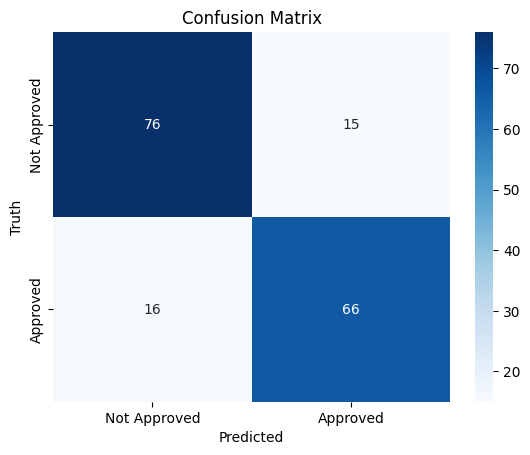

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Approved", "Approved"], yticklabels=["Not Approved", "Approved"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
classification_rep = classification_report(y_test3, y_pred3)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.83      0.84      0.83        91
           1       0.81      0.80      0.81        82

    accuracy                           0.82       173
   macro avg       0.82      0.82      0.82       173
weighted avg       0.82      0.82      0.82       173



80-20

In [ ]:
model1.fit(X_train4, y_train4)

SVC(kernel='linear')

In [ ]:
y_pred4 = model1.predict(X_test4)

In [ ]:
y_pred4

array(['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0',
       '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0',
       '1', '1', '0', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '0', '1', '0', '1', '0', '0', '1', '0', '0', '1',
       '0', '0', '1', '0', '1', '1', '1', '0', '1', '1', '1', '0', '0',
       '1', '1', '1', '1', '0', '0', '1', '0', '1', '0', '0', '0', '1',
       '1', '0', '1', '1', '0', '0', '1', '0', '1', '1', '1', '1', '1',
       '0', '1', '1', '1', '1', '1', '1', '0', '0', '0', '0', '1', '0',
       '1', '1', '0', '1', '0', '1', '0', '1', '1', '0', '0', '0', '1',
       '1', '1', '1', '0', '0', '1', '0', '0', '1', '0', '0', '1', '1',
       '1', '0', '1', '0', '1', '1', '1', '1'], dtype=object)

In [ ]:
svm = pd.DataFrame({'Predicted':y_pred4,'Actual':y_test4})
svm

Predicted Actual
286         0      0
511         0      1
257         0      0
336         0      0
318         0      1
..        ...    ...
333         0      0
507         1      1
24          1      1
158         1      1
518         1      1

[138 rows x 2 columns]

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test4,y_pred4)

0.8043478260869565

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test4,y_pred4)
cm

array([[54, 14],
       [13, 57]])

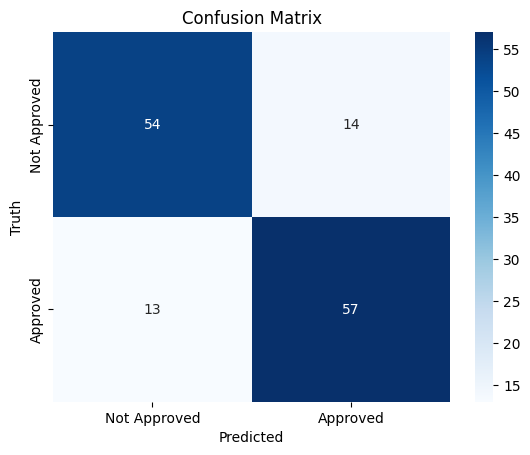

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Approved", "Approved"], yticklabels=["Not Approved", "Approved"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
classification_rep = classification_report(y_test4, y_pred4)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.81      0.79      0.80        68
           1       0.80      0.81      0.81        70

    accuracy                           0.80       138
   macro avg       0.80      0.80      0.80       138
weighted avg       0.80      0.80      0.80       138



# SVM after VIF

60-40

In [ ]:
model1 = SVC(kernel='linear')

In [ ]:
model1.fit(X_train1_nomulti, y_train1_nomulti)

SVC(kernel='linear')

In [ ]:
y_pred1_nomulti = model1.predict(X_test1_nomulti)

In [ ]:
y_pred1_nomulti

array(['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '1', '1', '0', '0', '0', '1', '0', '0', '0', '1', '0', '0',
       '1', '1', '0', '0', '1', '1', '0', '1', '0', '1', '1', '1', '0',
       '1', '1', '1', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1',
       '0', '0', '0', '0', '1', '0', '1', '0', '1', '1', '1', '0', '0',
       '1', '1', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '1', '1', '1', '0', '0', '0', '1', '1', '1', '1', '1',
       '0', '1', '0', '0', '1', '1', '0', '0', '0', '0', '1', '1', '0',
       '1', '0', '0', '1', '0', '1', '0', '1', '1', '0', '1', '0', '1',
       '1', '1', '1', '0', '0', '1', '1', '0', '0', '0', '1', '1', '1',
       '1', '0', '0', '0', '1', '1', '1', '1', '0', '1', '0', '0', '1',
       '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '1', '1',
       '1', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '1', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1

In [ ]:
svm = pd.DataFrame({'Predicted':y_pred1_nomulti,'Actual':y_test1_nomulti})
svm

Predicted Actual
286         0      0
511         0      1
257         0      0
336         0      0
318         0      1
..        ...    ...
637         0      0
238         0      1
0           0      1
682         0      0
548         1      1

[276 rows x 2 columns]

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test1_nomulti,y_pred1_nomulti)

0.7536231884057971

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test1_nomulti,y_pred1_nomulti)
cm

array([[122,  29],
       [ 39,  86]])

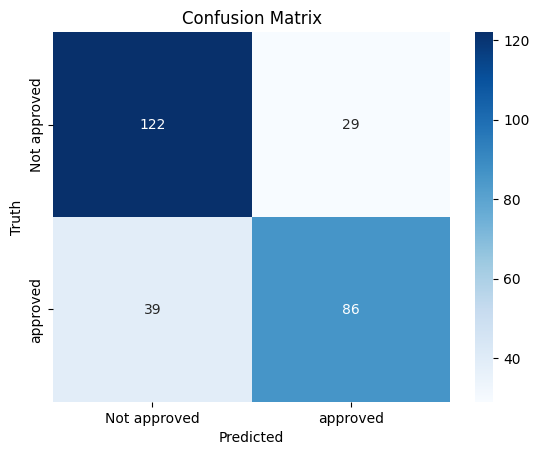

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not approved", "approved"], yticklabels=["Not approved", "approved"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
classification_rep = classification_report(y_test1_nomulti, y_pred1_nomulti)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.76      0.81      0.78       151
           1       0.75      0.69      0.72       125

    accuracy                           0.75       276
   macro avg       0.75      0.75      0.75       276
weighted avg       0.75      0.75      0.75       276



70-30

In [ ]:
model1.fit(X_train2_nomulti, y_train2_nomulti)

SVC(kernel='linear')

In [ ]:
y_pred2_nomulti = model1.predict(X_test2_nomulti)

In [ ]:
y_pred2_nomulti

array(['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '1', '1', '0', '0', '0', '1', '0', '0', '0', '1', '0', '0',
       '1', '1', '0', '0', '1', '1', '0', '1', '0', '1', '1', '1', '0',
       '1', '1', '1', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '1', '0', '1', '0', '1', '1', '1', '0', '0',
       '1', '1', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '1', '1', '0', '0', '0', '0', '1', '1', '1', '1', '1',
       '0', '1', '0', '0', '1', '1', '0', '0', '0', '0', '1', '1', '0',
       '1', '0', '0', '1', '0', '1', '0', '1', '1', '0', '1', '0', '1',
       '1', '1', '1', '0', '0', '1', '1', '0', '0', '0', '1', '1', '1',
       '1', '0', '0', '0', '1', '1', '1', '1', '0', '1', '0', '0', '1',
       '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1',
       '1', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '1', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1

In [ ]:
svm = pd.DataFrame({'Predicted':y_pred2_nomulti,'Actual':y_test2_nomulti})
svm

Predicted Actual
286         0      0
511         0      1
257         0      0
336         0      0
318         0      1
..        ...    ...
601         0      0
66          1      1
11          0      1
674         0      0
559         1      1

[207 rows x 2 columns]

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test2_nomulti,y_pred2_nomulti)

0.7681159420289855

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test2_nomulti,y_pred2_nomulti)
cm

array([[93, 17],
       [31, 66]])

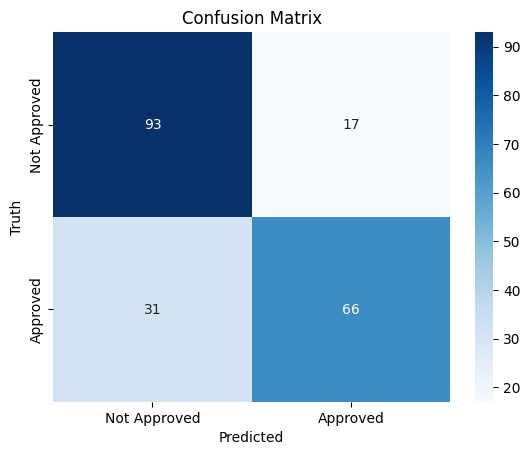

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Approved", "Approved"], yticklabels=["Not Approved", "Approved"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
classification_rep = classification_report(y_test2_nomulti, y_pred2_nomulti)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.75      0.85      0.79       110
           1       0.80      0.68      0.73        97

    accuracy                           0.77       207
   macro avg       0.77      0.76      0.76       207
weighted avg       0.77      0.77      0.77       207



75-25

In [ ]:
model1.fit(X_train3_nomulti, y_train3_nomulti)

SVC(kernel='linear')

In [ ]:
y_pred3_nomulti = model1.predict(X_test3_nomulti)

In [ ]:
y_pred3_nomulti

array(['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '1', '1', '0', '0', '0', '1', '0', '0', '0', '1', '0', '0',
       '1', '1', '0', '0', '1', '1', '0', '1', '0', '1', '1', '1', '0',
       '1', '1', '1', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '1', '0', '1', '0', '1', '1', '1', '0', '0',
       '1', '1', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0',
       '0', '1', '1', '1', '0', '0', '0', '0', '1', '1', '1', '1', '1',
       '0', '1', '0', '0', '1', '1', '0', '0', '0', '0', '1', '1', '0',
       '1', '0', '0', '1', '0', '1', '0', '1', '0', '0', '1', '0', '1',
       '1', '1', '1', '0', '0', '1', '0', '0', '0', '0', '1', '1', '1',
       '1', '0', '0', '0', '1', '1', '1', '1', '0', '1', '0', '0', '1',
       '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1',
       '1', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '1', '0',
       '0', '0', '0', '0'], dtype=object)

In [ ]:
svm = pd.DataFrame({'Predicted':y_pred3_nomulti,'Actual':y_test3_nomulti})
svm

Predicted Actual
286         0      0
511         0      1
257         0      0
336         0      0
318         0      1
..        ...    ...
357         0      0
215         0      1
629         0      0
390         0      0
174         0      1

[173 rows x 2 columns]

In [ ]:
accuracy_score(y_test3_nomulti,y_pred3_nomulti)

0.7745664739884393

In [ ]:
cm = confusion_matrix(y_test3_nomulti,y_pred3_nomulti)
cm

array([[79, 12],
       [27, 55]])

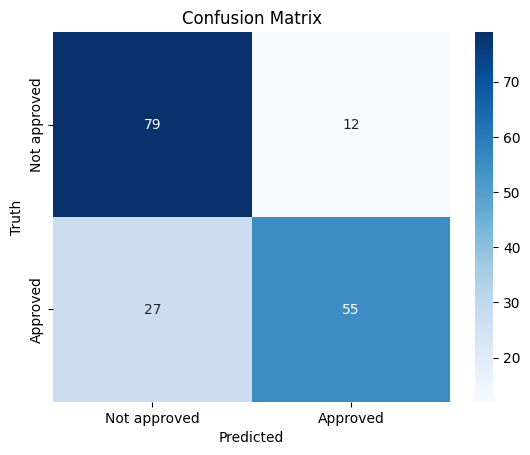

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not approved", "Approved"], yticklabels=["Not approved", "Approved"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
classification_rep = classification_report(y_test3_nomulti, y_pred3_nomulti)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.75      0.87      0.80        91
           1       0.82      0.67      0.74        82

    accuracy                           0.77       173
   macro avg       0.78      0.77      0.77       173
weighted avg       0.78      0.77      0.77       173



80-20

In [ ]:
model1.fit(X_train4_nomulti, y_train4_nomulti)

SVC(kernel='linear')

In [ ]:
y_pred4_nomulti = model1.predict(X_test4_nomulti)

In [ ]:
y_pred4_nomulti

array(['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '1', '1', '0', '0', '0', '1', '0', '0', '0', '1', '0', '0',
       '1', '1', '0', '0', '1', '1', '0', '1', '0', '1', '1', '1', '0',
       '1', '1', '1', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '1', '0', '1', '0', '1', '1', '1', '0', '0',
       '1', '1', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0',
       '0', '1', '1', '1', '0', '0', '0', '0', '1', '1', '1', '1', '1',
       '0', '1', '0', '0', '1', '1', '0', '0', '0', '0', '1', '1', '0',
       '1', '0', '0', '1', '0', '1', '0', '1', '0', '0', '1', '0', '1',
       '1', '0', '1', '0', '0', '1', '0', '0', '0', '0', '1', '1', '1',
       '1', '0', '0', '0', '1', '1', '1', '1'], dtype=object)

In [ ]:
svm = pd.DataFrame({'Predicted':y_pred4_nomulti,'Actual':y_test4_nomulti})
svm

Predicted Actual
286         0      0
511         0      1
257         0      0
336         0      0
318         0      1
..        ...    ...
333         0      0
507         1      1
24          1      1
158         1      1
518         1      1

[138 rows x 2 columns]

In [ ]:
accuracy_score(y_test4_nomulti,y_pred4_nomulti)

0.782608695652174

In [ ]:
cm = confusion_matrix(y_test4_nomulti,y_pred4_nomulti)
cm

array([[60,  8],
       [22, 48]])

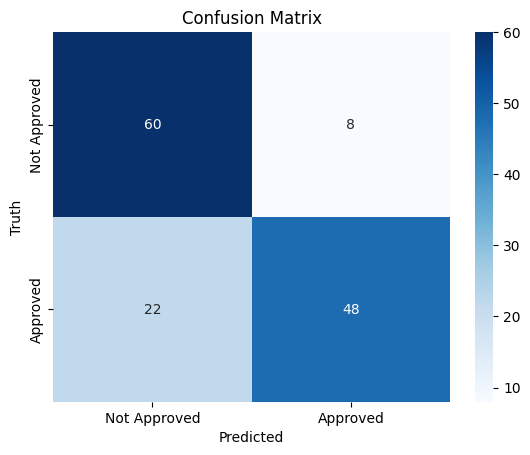

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Approved", "Approved"], yticklabels=["Not Approved", "Approved"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
classification_rep = classification_report(y_test4_nomulti, y_pred4_nomulti)
print(classification_rep)


              precision    recall  f1-score   support

           0       0.73      0.88      0.80        68
           1       0.86      0.69      0.76        70

    accuracy                           0.78       138
   macro avg       0.79      0.78      0.78       138
weighted avg       0.80      0.78      0.78       138



# Decision Trees before VIF

60-40

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train1,y_train1)

In [ ]:
y_pred1 = clf.predict(X_test1)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test1, y_pred1))

Accuracy: 0.8007246376811594


In [ ]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf = clf.fit(X_train1,y_train1)
y_pred1 = clf.predict(X_test1)
print("Accuracy:",metrics.accuracy_score(y_test1, y_pred1))

Accuracy: 0.8405797101449275


In [ ]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=2)
clf = clf.fit(X_train1,y_train1)
y_pred1 = clf.predict(X_test1)
print("Accuracy:",metrics.accuracy_score(y_test1, y_pred1))

Accuracy: 0.8478260869565217


In [ ]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=3)
clf = clf.fit(X_train1,y_train1)
y_pred1 = clf.predict(X_test1)
print("Accuracy:",metrics.accuracy_score(y_test1, y_pred1))

Accuracy: 0.8478260869565217


In [ ]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=6)
clf = clf.fit(X_train1,y_train1)
y_pred1 = clf.predict(X_test1)
print("Accuracy:",metrics.accuracy_score(y_test1, y_pred1))

Accuracy: 0.7789855072463768


In [ ]:
#Predict the response for train dataset
y_pred_train1 = clf.predict(X_train1)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_train1, y_pred_train1))

Accuracy: 0.9492753623188406


70-30

In [ ]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train2,y_train2)

In [ ]:
y_pred2 = clf.predict(X_test2)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test2, y_pred2))

Accuracy: 0.7922705314009661


In [ ]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf = clf.fit(X_train2,y_train2)
y_pred2 = clf.predict(X_test2)
print("Accuracy:",metrics.accuracy_score(y_test2, y_pred2))

Accuracy: 0.8405797101449275


In [ ]:
clf =  DecisionTreeClassifier(criterion="gini", max_depth=2)
clf = clf.fit(X_train2,y_train2)
y_pred2 = clf.predict(X_test2)
print("Accuracy:",metrics.accuracy_score(y_test2, y_pred2))

Accuracy: 0.8405797101449275


In [ ]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=3)
clf = clf.fit(X_train2,y_train2)
y_pred2 = clf.predict(X_test2)
print("Accuracy:",metrics.accuracy_score(y_test2, y_pred2))

Accuracy: 0.8405797101449275


In [ ]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=6)
clf = clf.fit(X_train2,y_train2)
y_pred2 = clf.predict(X_test2)
print("Accuracy:",metrics.accuracy_score(y_test2, y_pred2))

Accuracy: 0.8164251207729468


In [ ]:
#Predict the response for train dataset
y_pred_train2 = clf.predict(X_train2)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_train2, y_pred_train2))

Accuracy: 0.94824016563147


75-25

In [ ]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train3,y_train3)

In [ ]:
y_pred3 = clf.predict(X_test3)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test3, y_pred3))

Accuracy: 0.7803468208092486


In [ ]:
clf =DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf = clf.fit(X_train3,y_train3)
y_pred3 = clf.predict(X_test3)
print("Accuracy:",metrics.accuracy_score(y_test3, y_pred3))

Accuracy: 0.8439306358381503


In [ ]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=2)
clf = clf.fit(X_train3,y_train3)
y_pred3 = clf.predict(X_test3)
print("Accuracy:",metrics.accuracy_score(y_test3, y_pred3))

Accuracy: 0.8439306358381503


In [ ]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=3)
clf = clf.fit(X_train3,y_train3)
y_pred3 = clf.predict(X_test3)
print("Accuracy:",metrics.accuracy_score(y_test3, y_pred3))

Accuracy: 0.8439306358381503


In [ ]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=6)
clf = clf.fit(X_train3,y_train3)
y_pred3 = clf.predict(X_test3)
print("Accuracy:",metrics.accuracy_score(y_test3, y_pred3))

Accuracy: 0.7976878612716763


In [ ]:
#Predict the response for train dataset
y_pred_train3 = clf.predict(X_train3)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_train3, y_pred_train3))

Accuracy: 0.9361702127659575


80-20

In [ ]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train4,y_train4)

In [ ]:
y_pred4 = clf.predict(X_test4)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test4, y_pred4))

Accuracy: 0.7608695652173914


In [ ]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf = clf.fit(X_train4,y_train4)
y_pred4 = clf.predict(X_test4)
print("Accuracy:",metrics.accuracy_score(y_test4, y_pred4))

Accuracy: 0.8260869565217391


In [ ]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=2)
clf = clf.fit(X_train4,y_train4)
y_pred4 = clf.predict(X_test4)
print("Accuracy:",metrics.accuracy_score(y_test4, y_pred4))

Accuracy: 0.8260869565217391


In [ ]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=3)
clf = clf.fit(X_train4,y_train4)
y_pred4 = clf.predict(X_test4)
print("Accuracy:",metrics.accuracy_score(y_test4, y_pred4))

Accuracy: 0.7536231884057971


In [ ]:
clf =  DecisionTreeClassifier(criterion="gini", max_depth=6)
clf = clf.fit(X_train4,y_train4)
y_pred4 = clf.predict(X_test4)
print("Accuracy:",metrics.accuracy_score(y_test4, y_pred4))

Accuracy: 0.7753623188405797


In [ ]:
#Predict the response for train dataset
y_pred_train4 = clf.predict(X_train4)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_train4, y_pred_train4))

Accuracy: 0.9293478260869565


# DecisionTree after VIF

60-40

In [ ]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train1_nomulti,y_train1_nomulti)

In [ ]:
y_pred1_nomulti = clf.predict(X_test1_nomulti)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test1_nomulti, y_pred1_nomulti))

Accuracy: 0.717391304347826


In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train1_nomulti,y_train1_nomulti)

#Predict the response for test dataset
y_pred1_nomulti = clf.predict(X_test1_nomulti)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test1_nomulti, y_pred1_nomulti))

Accuracy: 0.75


In [ ]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=2)

# Train Decision Tree Classifer
clf = clf.fit(X_train1_nomulti,y_train1_nomulti)

#Predict the response for test dataset
y_pred1_nomulti = clf.predict(X_test1_nomulti)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test1_nomulti, y_pred1_nomulti))

Accuracy: 0.7463768115942029


In [ ]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train1_nomulti,y_train1_nomulti)

#Predict the response for test dataset
y_pred1_nomulti = clf.predict(X_test1_nomulti)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test1_nomulti, y_pred1_nomulti))

Accuracy: 0.75


In [ ]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=6)

# Train Decision Tree Classifer
clf = clf.fit(X_train1_nomulti,y_train1_nomulti)

#Predict the response for test dataset
y_pred1_nomulti = clf.predict(X_test1_nomulti)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test1_nomulti, y_pred1_nomulti))

Accuracy: 0.7101449275362319


In [ ]:
#Predict the response for train dataset
y_pred_train1_nomulti = clf.predict(X_train1_nomulti)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_train1_nomulti, y_pred_train1_nomulti))

Accuracy: 0.8647342995169082


70-30

In [ ]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train2_nomulti,y_train2_nomulti)

In [ ]:
y_pred2_nomulti = clf.predict(X_test2_nomulti)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test2_nomulti, y_pred2_nomulti))

Accuracy: 0.6859903381642513


In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train2_nomulti,y_train2_nomulti)

#Predict the response for test dataset
y_pred2_nomulti = clf.predict(X_test2_nomulti)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test2_nomulti, y_pred2_nomulti))

Accuracy: 0.714975845410628


In [ ]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=2)

# Train Decision Tree Classifer
clf = clf.fit(X_train2_nomulti,y_train2_nomulti)

#Predict the response for test dataset
y_pred2_nomulti = clf.predict(X_test2_nomulti)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test2_nomulti, y_pred2_nomulti))

Accuracy: 0.7342995169082126


In [ ]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train2_nomulti,y_train2_nomulti)

#Predict the response for test dataset
y_pred2_nomulti = clf.predict(X_test2_nomulti)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test2_nomulti, y_pred2_nomulti))

Accuracy: 0.748792270531401


In [ ]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=6)

# Train Decision Tree Classifer
clf = clf.fit(X_train2_nomulti,y_train2_nomulti)

#Predict the response for test dataset
y_pred2_nomulti = clf.predict(X_test2_nomulti)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test2_nomulti, y_pred2_nomulti))

Accuracy: 0.7004830917874396


In [ ]:
#Predict the response for train dataset
y_pred_train2_nomulti = clf.predict(X_train2_nomulti)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_train2_nomulti, y_pred_train2_nomulti))

Accuracy: 0.8695652173913043


75-25

In [ ]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train3_nomulti,y_train3_nomulti)

In [ ]:
y_pred3_nomulti = clf.predict(X_test3_nomulti)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test3_nomulti, y_pred3_nomulti))

Accuracy: 0.6994219653179191


In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train3_nomulti,y_train3_nomulti)

#Predict the response for test dataset
y_pred3_nomulti = clf.predict(X_test3_nomulti)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test3_nomulti, y_pred3_nomulti))

Accuracy: 0.7398843930635838


In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="gini", max_depth=2)

# Train Decision Tree Classifer
clf = clf.fit(X_train3_nomulti,y_train3_nomulti)

#Predict the response for test dataset
y_pred3_nomulti = clf.predict(X_test3_nomulti)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test3_nomulti, y_pred3_nomulti))

Accuracy: 0.7398843930635838


In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="gini", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train3_nomulti,y_train3_nomulti)

#Predict the response for test dataset
y_pred3_nomulti = clf.predict(X_test3_nomulti)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test3_nomulti, y_pred3_nomulti))

Accuracy: 0.7456647398843931


In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="gini", max_depth=6)

# Train Decision Tree Classifer
clf = clf.fit(X_train3_nomulti,y_train3_nomulti)

#Predict the response for test dataset
y_pred3_nomulti = clf.predict(X_test3_nomulti)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test3_nomulti, y_pred3_nomulti))

Accuracy: 0.7167630057803468


In [ ]:
#Predict the response for train dataset
y_pred_train3_nomulti = clf.predict(X_train3_nomulti)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_train3_nomulti, y_pred_train3_nomulti))

Accuracy: 0.8568665377176016


80-20

In [ ]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train4_nomulti,y_train4_nomulti)

In [ ]:
y_pred4_nomulti = clf.predict(X_test4_nomulti)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test4_nomulti, y_pred4_nomulti))

Accuracy: 0.6811594202898551


In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train4_nomulti,y_train4_nomulti)

#Predict the response for test dataset
y_pred4_nomulti = clf.predict(X_test4_nomulti)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test4_nomulti, y_pred4_nomulti))

Accuracy: 0.7246376811594203


In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="gini", max_depth=2)

# Train Decision Tree Classifer
clf = clf.fit(X_train4_nomulti,y_train4_nomulti)

#Predict the response for test dataset
y_pred4_nomulti = clf.predict(X_test4_nomulti)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test4_nomulti, y_pred4_nomulti))

Accuracy: 0.7246376811594203


In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="gini", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train4_nomulti,y_train4_nomulti)

#Predict the response for test dataset
y_pred4_nomulti = clf.predict(X_test4_nomulti)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test4_nomulti, y_pred4_nomulti))

Accuracy: 0.7246376811594203


In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="gini", max_depth=6)

# Train Decision Tree Classifer
clf = clf.fit(X_train4_nomulti,y_train4_nomulti)

#Predict the response for test dataset
y_pred4_nomulti = clf.predict(X_test4_nomulti)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test4_nomulti, y_pred4_nomulti))

Accuracy: 0.6884057971014492


In [ ]:
#Predict the response for train dataset
y_pred_train4_nomulti = clf.predict(X_train4_nomulti)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_train4_nomulti, y_pred_train4_nomulti))

Accuracy: 0.8659420289855072


# RANDOM FOREST

60-40

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(X_train1,y_train1)

RandomForestClassifier()

In [ ]:
y_pred1=rf.predict(X_test1)
print("Accuracy:",accuracy_score(y_test1,y_pred1))

Accuracy: 0.8659420289855072


In [ ]:
print(classification_report(y_test1, y_pred1))
print(confusion_matrix(y_test1, y_pred1))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88       151
           1       0.84      0.86      0.85       125

    accuracy                           0.87       276
   macro avg       0.86      0.87      0.87       276
weighted avg       0.87      0.87      0.87       276

[[131  20]
 [ 17 108]]


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test1,y_pred1)
cm

array([[131,  20],
       [ 17, 108]])

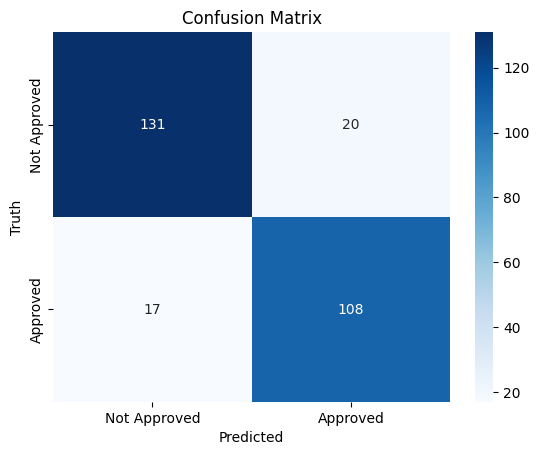

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Approved", "Approved"], yticklabels=["Not Approved", "Approved"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

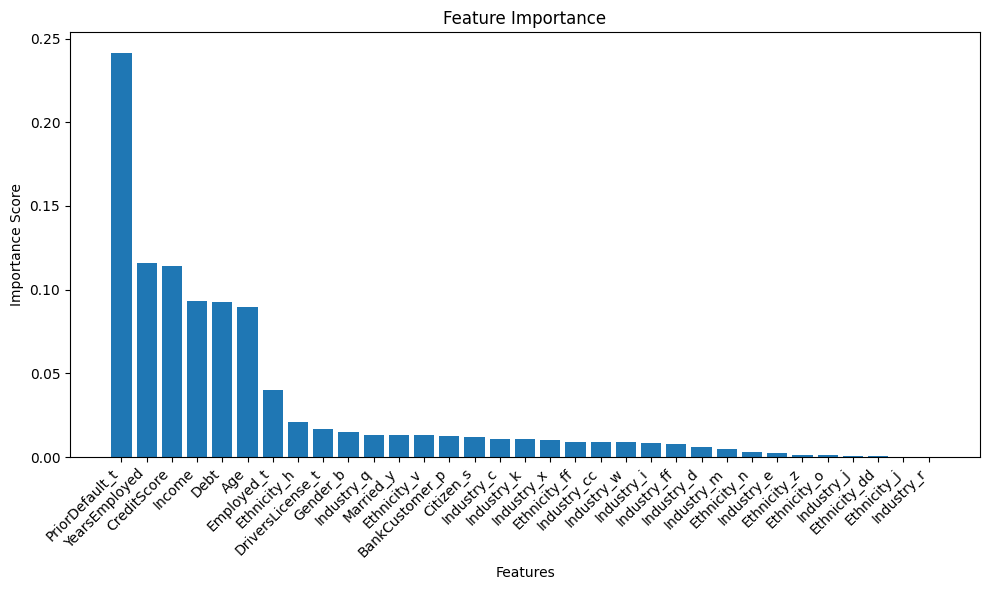

In [ ]:
# Extract feature importance
feature_importance = rf.feature_importances_
features = X_train1.columns

# Ensure features and feature_importance have the same length
# This is usually the case, but if there's a mismatch,
# you might need to investigate why and potentially adjust your code

if len(features) != len(feature_importance):
    print("Warning: Number of features and importance values don't match!")
    # Investigate and fix the mismatch
    # Here's a potential workaround if you're missing features in X_train1.columns:
    # features = [f for f in rf.feature_names_in_ if f in X_train1.columns]
    # but make sure this aligns with how your model was trained

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'])
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.xticks(rotation=45, ha='right')  # Added ha='right' to prevent labels from overlapping
plt.tight_layout()  # Added to prevent labels from being cut off
plt.show()

70-30

In [ ]:
rf.fit(X_train2,y_train2)

RandomForestClassifier()

In [ ]:
y_pred2=rf.predict(X_test2)
print("Accuracy:",accuracy_score(y_test2,y_pred2))
print(classification_report(y_test2, y_pred2))
print(confusion_matrix(y_test2, y_pred2))

Accuracy: 0.855072463768116
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       110
           1       0.85      0.85      0.85        97

    accuracy                           0.86       207
   macro avg       0.85      0.85      0.85       207
weighted avg       0.86      0.86      0.86       207

[[95 15]
 [15 82]]


75-25

In [ ]:
rf.fit(X_train3,y_train3)

RandomForestClassifier()

In [ ]:
y_pred3=rf.predict(X_test3)
print("Accuracy:",accuracy_score(y_test3,y_pred3))
print(classification_report(y_test3, y_pred3))
print(confusion_matrix(y_test3, y_pred3))

Accuracy: 0.8497109826589595
              precision    recall  f1-score   support

           0       0.84      0.89      0.86        91
           1       0.87      0.80      0.84        82

    accuracy                           0.85       173
   macro avg       0.85      0.85      0.85       173
weighted avg       0.85      0.85      0.85       173

[[81 10]
 [16 66]]


80-20

In [ ]:
rf.fit(X_train4,y_train4)

RandomForestClassifier()

In [ ]:
y_pred4=rf.predict(X_test4)
print("Accuracy:",accuracy_score(y_test4,y_pred4))
print(classification_report(y_test4, y_pred4))
print(confusion_matrix(y_test4, y_pred4))

Accuracy: 0.8333333333333334
              precision    recall  f1-score   support

           0       0.83      0.84      0.83        68
           1       0.84      0.83      0.83        70

    accuracy                           0.83       138
   macro avg       0.83      0.83      0.83       138
weighted avg       0.83      0.83      0.83       138

[[57 11]
 [12 58]]


# RANDOM FOREST AFTER VIF

60-40

In [ ]:
rf.fit(X_train1_nomulti,y_train1_nomulti)

RandomForestClassifier()

In [ ]:
y_pred_train1_nomulti=rf.predict(X_test1_nomulti)
print("Accuracy:",accuracy_score(y_test1_nomulti,y_pred1_nomulti))
print(classification_report(y_test1_nomulti, y_pred1_nomulti))
print(confusion_matrix(y_test1_nomulti, y_pred1_nomulti))

Accuracy: 0.7101449275362319
              precision    recall  f1-score   support

           0       0.71      0.79      0.75       151
           1       0.71      0.61      0.66       125

    accuracy                           0.71       276
   macro avg       0.71      0.70      0.70       276
weighted avg       0.71      0.71      0.71       276

[[120  31]
 [ 49  76]]


70-30

In [ ]:
rf.fit(X_train2_nomulti,y_train2_nomulti)

RandomForestClassifier()

In [ ]:
y_pred_train2_nomulti=rf.predict(X_test2_nomulti)
print("Accuracy:",accuracy_score(y_test2_nomulti,y_pred2_nomulti))
print(classification_report(y_test2_nomulti, y_pred2_nomulti))
print(confusion_matrix(y_test2_nomulti, y_pred2_nomulti))

Accuracy: 0.7004830917874396
              precision    recall  f1-score   support

           0       0.68      0.84      0.75       110
           1       0.75      0.55      0.63        97

    accuracy                           0.70       207
   macro avg       0.71      0.69      0.69       207
weighted avg       0.71      0.70      0.69       207

[[92 18]
 [44 53]]


75-25

In [ ]:
rf.fit(X_train3_nomulti,y_train3_nomulti)

RandomForestClassifier()

In [ ]:
y_pred_train3_nomulti=rf.predict(X_test3_nomulti)
print("Accuracy:",accuracy_score(y_test3_nomulti,y_pred3_nomulti))
print(classification_report(y_test3_nomulti, y_pred3_nomulti))
print(confusion_matrix(y_test3_nomulti, y_pred3_nomulti))

Accuracy: 0.7167630057803468
              precision    recall  f1-score   support

           0       0.69      0.84      0.76        91
           1       0.76      0.59      0.66        82

    accuracy                           0.72       173
   macro avg       0.73      0.71      0.71       173
weighted avg       0.72      0.72      0.71       173

[[76 15]
 [34 48]]


80-20

In [ ]:
rf.fit(X_train4_nomulti,y_train4_nomulti)

RandomForestClassifier()

In [ ]:
y_pred_train4_nomulti=rf.predict(X_test4_nomulti)
print("Accuracy:",accuracy_score(y_test4_nomulti,y_pred4_nomulti))
print(classification_report(y_test4_nomulti, y_pred4_nomulti))
print(confusion_matrix(y_test4_nomulti, y_pred4_nomulti))

Accuracy: 0.6884057971014492
              precision    recall  f1-score   support

           0       0.65      0.79      0.72        68
           1       0.75      0.59      0.66        70

    accuracy                           0.69       138
   macro avg       0.70      0.69      0.69       138
weighted avg       0.70      0.69      0.69       138

[[54 14]
 [29 41]]


# ADABOOST BEFORE VIF

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier


In [ ]:
# Replace 'base_estimator' with 'estimator'
base_estimator = DecisionTreeClassifier(max_depth=3, random_state=0)
adaboost = AdaBoostClassifier(estimator=base_estimator, # Changed argument name here
                              n_estimators=3,random_state=0)

60-40

In [ ]:
adaboost.fit(X_train1, y_train1)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                    random_state=0),
                   n_estimators=3, random_state=0)

In [ ]:
y_pred1 = adaboost.predict(X_test1)
print("Accuracy:",accuracy_score(y_test1,y_pred1))
print(classification_report(y_test1, y_pred1))
print(confusion_matrix(y_test1, y_pred1))

Accuracy: 0.8152173913043478
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       151
           1       0.81      0.77      0.79       125

    accuracy                           0.82       276
   macro avg       0.82      0.81      0.81       276
weighted avg       0.82      0.82      0.81       276

[[129  22]
 [ 29  96]]


70-30

In [ ]:
adaboost.fit(X_train2, y_train2)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                    random_state=0),
                   n_estimators=3, random_state=0)

In [ ]:
y_pred2 = adaboost.predict(X_test2)
print("Accuracy:",accuracy_score(y_test2,y_pred2))
print(classification_report(y_test2, y_pred2))
print(confusion_matrix(y_test2, y_pred2))

Accuracy: 0.821256038647343
              precision    recall  f1-score   support

           0       0.85      0.81      0.83       110
           1       0.79      0.84      0.81        97

    accuracy                           0.82       207
   macro avg       0.82      0.82      0.82       207
weighted avg       0.82      0.82      0.82       207

[[89 21]
 [16 81]]


75-25

In [ ]:
adaboost.fit(X_train3, y_train3)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                    random_state=0),
                   n_estimators=3, random_state=0)

In [ ]:
y_pred3 = adaboost.predict(X_test3)
print("Accuracy:",accuracy_score(y_test3,y_pred3))
print(classification_report(y_test3, y_pred3))
print(confusion_matrix(y_test3, y_pred3))

Accuracy: 0.8034682080924855
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        91
           1       0.79      0.79      0.79        82

    accuracy                           0.80       173
   macro avg       0.80      0.80      0.80       173
weighted avg       0.80      0.80      0.80       173

[[74 17]
 [17 65]]


80-20

In [ ]:
adaboost.fit(X_train4, y_train4)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                    random_state=0),
                   n_estimators=3, random_state=0)

In [ ]:
y_pred4 = adaboost.predict(X_test4)
print("Accuracy:",accuracy_score(y_test4,y_pred4))
print(classification_report(y_test4, y_pred4))
print(confusion_matrix(y_test4, y_pred4))

Accuracy: 0.782608695652174
              precision    recall  f1-score   support

           0       0.77      0.79      0.78        68
           1       0.79      0.77      0.78        70

    accuracy                           0.78       138
   macro avg       0.78      0.78      0.78       138
weighted avg       0.78      0.78      0.78       138

[[54 14]
 [16 54]]


# ADABOOST AFTER VIF

60-40

In [ ]:
adaboost.fit(X_train1_nomulti, y_train1_nomulti)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                    random_state=0),
                   n_estimators=3, random_state=0)

In [ ]:
y_pred1_nomulti = adaboost.predict(X_test1_nomulti)
print("Accuracy:",accuracy_score(y_test1_nomulti,y_pred1_nomulti))
print(classification_report(y_test1_nomulti, y_pred1_nomulti))
print(confusion_matrix(y_test1_nomulti, y_pred1_nomulti))

Accuracy: 0.7137681159420289
              precision    recall  f1-score   support

           0       0.73      0.76      0.74       151
           1       0.69      0.66      0.67       125

    accuracy                           0.71       276
   macro avg       0.71      0.71      0.71       276
weighted avg       0.71      0.71      0.71       276

[[115  36]
 [ 43  82]]


70-30

In [ ]:
adaboost.fit(X_train2_nomulti, y_train2_nomulti)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                    random_state=0),
                   n_estimators=3, random_state=0)

In [ ]:
y_pred2_nomulti = adaboost.predict(X_test2_nomulti)
print("Accuracy:",accuracy_score(y_test2_nomulti,y_pred2_nomulti))
print(classification_report(y_test2_nomulti, y_pred2_nomulti))
print(confusion_matrix(y_test2_nomulti, y_pred2_nomulti))

Accuracy: 0.7584541062801933
              precision    recall  f1-score   support

           0       0.75      0.81      0.78       110
           1       0.76      0.70      0.73        97

    accuracy                           0.76       207
   macro avg       0.76      0.76      0.76       207
weighted avg       0.76      0.76      0.76       207

[[89 21]
 [29 68]]


75-25

In [ ]:
adaboost.fit(X_train3_nomulti, y_train3_nomulti)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                    random_state=0),
                   n_estimators=3, random_state=0)

In [ ]:
y_pred3_nomulti = adaboost.predict(X_test3_nomulti)
print("Accuracy:",accuracy_score(y_test3_nomulti,y_pred3_nomulti))
print(classification_report(y_test3_nomulti, y_pred3_nomulti))
print(confusion_matrix(y_test3_nomulti, y_pred3_nomulti))

Accuracy: 0.7341040462427746
              precision    recall  f1-score   support

           0       0.72      0.81      0.76        91
           1       0.76      0.65      0.70        82

    accuracy                           0.73       173
   macro avg       0.74      0.73      0.73       173
weighted avg       0.74      0.73      0.73       173

[[74 17]
 [29 53]]


80-20

In [ ]:
adaboost.fit(X_train4_nomulti, y_train4_nomulti)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                    random_state=0),
                   n_estimators=3, random_state=0)

In [ ]:
y_pred4_nomulti = adaboost.predict(X_test4_nomulti)
print("Accuracy:",accuracy_score(y_test4_nomulti,y_pred4_nomulti))
print(classification_report(y_test4_nomulti, y_pred4_nomulti))
print(confusion_matrix(y_test4_nomulti, y_pred4_nomulti))

Accuracy: 0.7463768115942029
              precision    recall  f1-score   support

           0       0.70      0.84      0.77        68
           1       0.81      0.66      0.72        70

    accuracy                           0.75       138
   macro avg       0.76      0.75      0.74       138
weighted avg       0.76      0.75      0.74       138

[[57 11]
 [24 46]]


# XGBOOT BEFORE VIF

In [ ]:
import xgboost as xgb

In [ ]:
model1 = xgb.XGBClassifier()
model2 = xgb.XGBClassifier(n_estimators=100, max_depth=8, learning_rate=0.1, subsample=0.5)

In [ ]:
y_train1 = y_train1.astype('int')
y_train2 = y_train2.astype('int')
y_train3 = y_train3.astype('int')
y_train4 = y_train4.astype('int')
y_test1= y_test1.astype('int')
y_test2= y_test2.astype('int')
y_test3= y_test3.astype('int')
y_test4= y_test4.astype('int')

60-40

In [ ]:
model1.fit(X_train1, y_train1)
model2.fit(X_train1,y_train1)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
pred1 = model1.predict(X_test1)
pred2 = model2.predict(X_test1)

print('Model 1 XGboost Report %r' % (classification_report(y_test1, pred1)))
print('Model 2 XGboost Report %r' % (classification_report(y_test1, pred2)))

Model 1 XGboost Report '              precision    recall  f1-score   support\n\n           0       0.88      0.84      0.86       151\n           1       0.82      0.86      0.84       125\n\n    accuracy                           0.85       276\n   macro avg       0.85      0.85      0.85       276\nweighted avg       0.85      0.85      0.85       276\n'
Model 2 XGboost Report '              precision    recall  f1-score   support\n\n           0       0.89      0.84      0.87       151\n           1       0.82      0.88      0.85       125\n\n    accuracy                           0.86       276\n   macro avg       0.86      0.86      0.86       276\nweighted avg       0.86      0.86      0.86       276\n'


In [ ]:
print("Accuracy for model 1: %.2f" % (accuracy_score(y_test1, pred1) * 100))
print("Accuracy for model 2: %.2f" % (accuracy_score(y_test1, pred2) * 100))
print(confusion_matrix(y_test1, pred1))
print(confusion_matrix(y_test1, pred2))

Accuracy for model 1: 84.78
Accuracy for model 2: 85.87
[[127  24]
 [ 18 107]]
[[127  24]
 [ 15 110]]


70-30

In [ ]:
model1.fit(X_train2, y_train2)
model2.fit(X_train2,y_train2)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
pred1 = model1.predict(X_test2)
pred2 = model2.predict(X_test2)

print('Model 1 XGboost Report %r' % (classification_report(y_test2, pred1)))
print('Model 2 XGboost Report %r' % (classification_report(y_test2, pred2)))

Model 1 XGboost Report '              precision    recall  f1-score   support\n\n           0       0.83      0.85      0.84       110\n           1       0.82      0.80      0.81        97\n\n    accuracy                           0.83       207\n   macro avg       0.83      0.82      0.83       207\nweighted avg       0.83      0.83      0.83       207\n'
Model 2 XGboost Report '              precision    recall  f1-score   support\n\n           0       0.85      0.85      0.85       110\n           1       0.83      0.84      0.83        97\n\n    accuracy                           0.84       207\n   macro avg       0.84      0.84      0.84       207\nweighted avg       0.84      0.84      0.84       207\n'


In [ ]:
print("Accuracy for model 1: %.2f" % (accuracy_score(y_test2, pred1) * 100))
print("Accuracy for model 2: %.2f" % (accuracy_score(y_test2, pred2) * 100))
print(confusion_matrix(y_test2, pred1))
print(confusion_matrix(y_test2, pred2))

Accuracy for model 1: 82.61
Accuracy for model 2: 84.06
[[93 17]
 [19 78]]
[[93 17]
 [16 81]]


75-25

In [ ]:
model1.fit(X_train3, y_train3)
model2.fit(X_train3,y_train3)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
pred1 = model1.predict(X_test3)
pred2 = model2.predict(X_test3)

print('Model 1 XGboost Report %r' % (classification_report(y_test3, pred1)))
print('Model 2 XGboost Report %r' % (classification_report(y_test3, pred2)))

Model 1 XGboost Report '              precision    recall  f1-score   support\n\n           0       0.82      0.88      0.85        91\n           1       0.86      0.79      0.82        82\n\n    accuracy                           0.84       173\n   macro avg       0.84      0.84      0.84       173\nweighted avg       0.84      0.84      0.84       173\n'
Model 2 XGboost Report '              precision    recall  f1-score   support\n\n           0       0.85      0.90      0.87        91\n           1       0.88      0.82      0.85        82\n\n    accuracy                           0.86       173\n   macro avg       0.86      0.86      0.86       173\nweighted avg       0.86      0.86      0.86       173\n'


In [ ]:
print("Accuracy for model 1: %.2f" % (accuracy_score(y_test3, pred1) * 100))
print("Accuracy for model 2: %.2f" % (accuracy_score(y_test3, pred2) * 100))
print(confusion_matrix(y_test3, pred1))
print(confusion_matrix(y_test3, pred2))

Accuracy for model 1: 83.82
Accuracy for model 2: 86.13
[[80 11]
 [17 65]]
[[82  9]
 [15 67]]


80-20

In [ ]:
model1.fit(X_train4, y_train4)
model2.fit(X_train4,y_train4)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
pred1 = model1.predict(X_test4)
pred2 = model2.predict(X_test4)

print('Model 1 XGboost Report %r' % (classification_report(y_test4, pred1)))
print('Model 2 XGboost Report %r' % (classification_report(y_test4, pred2)))

Model 1 XGboost Report '              precision    recall  f1-score   support\n\n           0       0.80      0.84      0.82        68\n           1       0.84      0.80      0.82        70\n\n    accuracy                           0.82       138\n   macro avg       0.82      0.82      0.82       138\nweighted avg       0.82      0.82      0.82       138\n'
Model 2 XGboost Report '              precision    recall  f1-score   support\n\n           0       0.79      0.85      0.82        68\n           1       0.85      0.79      0.81        70\n\n    accuracy                           0.82       138\n   macro avg       0.82      0.82      0.82       138\nweighted avg       0.82      0.82      0.82       138\n'


In [ ]:
print("Accuracy for model 1: %.2f" % (accuracy_score(y_test4, pred1) * 100))
print("Accuracy for model 2: %.2f" % (accuracy_score(y_test4, pred2) * 100))
print(confusion_matrix(y_test4, pred1))
print(confusion_matrix(y_test4, pred2))

Accuracy for model 1: 81.88
Accuracy for model 2: 81.88
[[57 11]
 [14 56]]
[[58 10]
 [15 55]]


# XGBoost After Vif

In [ ]:
y_train1_nomulti = y_train1_nomulti.astype('int')
y_train2_nomulti = y_train2_nomulti.astype('int')
y_train3_nomulti = y_train3_nomulti.astype('int')
y_train4_nomulti = y_train4_nomulti.astype('int')
y_test1_nomulti = y_test1_nomulti.astype('int')
y_test2_nomulti = y_test2_nomulti.astype('int')
y_test3_nomulti = y_test3_nomulti.astype('int')
y_test4_nomulti = y_test4_nomulti.astype('int')

60-40

In [ ]:
model1.fit(X_train1_nomulti, y_train1_nomulti)
model2.fit(X_train1_nomulti,y_train1_nomulti)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
pred1_nomulti = model1.predict(X_test1_nomulti)
pred2_nomulti = model2.predict(X_test1_nomulti)

print('Model 1 XGboost Report %r' % (classification_report(y_test1_nomulti, pred1_nomulti)))
print('Model 2 XGboost Report %r' % (classification_report(y_test1_nomulti, pred2_nomulti)))

Model 1 XGboost Report '              precision    recall  f1-score   support\n\n           0       0.75      0.73      0.74       151\n           1       0.68      0.70      0.69       125\n\n    accuracy                           0.72       276\n   macro avg       0.72      0.72      0.72       276\nweighted avg       0.72      0.72      0.72       276\n'
Model 2 XGboost Report '              precision    recall  f1-score   support\n\n           0       0.80      0.81      0.80       151\n           1       0.76      0.75      0.76       125\n\n    accuracy                           0.78       276\n   macro avg       0.78      0.78      0.78       276\nweighted avg       0.78      0.78      0.78       276\n'


In [ ]:
print("Accuracy for model 1: %.2f" % (accuracy_score(y_test1_nomulti, pred1_nomulti) * 100))
print("Accuracy for model 2: %.2f" % (accuracy_score(y_test1_nomulti, pred2_nomulti) * 100))
print(confusion_matrix(y_test1_nomulti, pred1_nomulti))
print(confusion_matrix(y_test1_nomulti, pred2_nomulti))

Accuracy for model 1: 71.74
Accuracy for model 2: 78.26
[[110  41]
 [ 37  88]]
[[122  29]
 [ 31  94]]


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test1_nomulti,pred2_nomulti)
cm

array([[122,  29],
       [ 31,  94]])

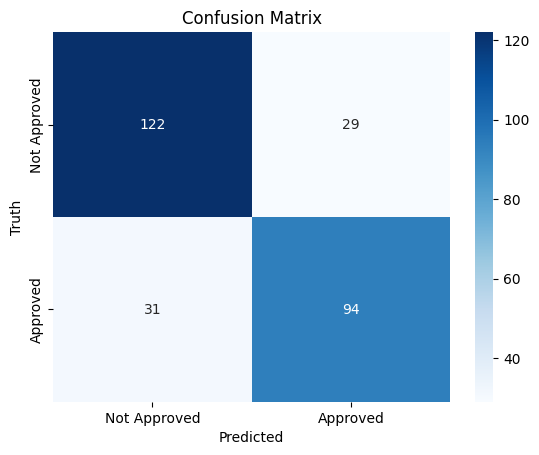

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Approved", "Approved"], yticklabels=["Not Approved", "Approved"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

70-30

In [ ]:
model1.fit(X_train2_nomulti, y_train2_nomulti)
model2.fit(X_train2_nomulti,y_train2_nomulti)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
pred1_nomulti = model1.predict(X_test2_nomulti)
pred2_nomulti = model2.predict(X_test2_nomulti)

print('Model 1 XGboost Report %r' % (classification_report(y_test2_nomulti, pred1_nomulti)))
print('Model 2 XGboost Report %r' % (classification_report(y_test2_nomulti, pred2_nomulti)))

Model 1 XGboost Report '              precision    recall  f1-score   support\n\n           0       0.73      0.77      0.75       110\n           1       0.72      0.67      0.70        97\n\n    accuracy                           0.72       207\n   macro avg       0.72      0.72      0.72       207\nweighted avg       0.72      0.72      0.72       207\n'
Model 2 XGboost Report '              precision    recall  f1-score   support\n\n           0       0.74      0.82      0.78       110\n           1       0.77      0.68      0.72        97\n\n    accuracy                           0.75       207\n   macro avg       0.76      0.75      0.75       207\nweighted avg       0.75      0.75      0.75       207\n'


In [ ]:
print("Accuracy for model 1: %.2f" % (accuracy_score(y_test2_nomulti, pred1_nomulti) * 100))
print("Accuracy for model 2: %.2f" % (accuracy_score(y_test2_nomulti, pred2_nomulti) * 100))
print(confusion_matrix(y_test2_nomulti, pred1_nomulti))
print(confusion_matrix(y_test2_nomulti, pred2_nomulti))

Accuracy for model 1: 72.46
Accuracy for model 2: 75.36
[[85 25]
 [32 65]]
[[90 20]
 [31 66]]


75-25

In [ ]:
model1.fit(X_train3_nomulti, y_train3_nomulti)
model2.fit(X_train3_nomulti,y_train3_nomulti)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
pred1_nomulti = model1.predict(X_test3_nomulti)
pred2_nomulti = model2.predict(X_test3_nomulti)

print('Model 1 XGboost Report %r' % (classification_report(y_test3_nomulti, pred1_nomulti)))
print('Model 2 XGboost Report %r' % (classification_report(y_test3_nomulti, pred2_nomulti)))

Model 1 XGboost Report '              precision    recall  f1-score   support\n\n           0       0.75      0.75      0.75        91\n           1       0.72      0.72      0.72        82\n\n    accuracy                           0.73       173\n   macro avg       0.73      0.73      0.73       173\nweighted avg       0.73      0.73      0.73       173\n'
Model 2 XGboost Report '              precision    recall  f1-score   support\n\n           0       0.77      0.84      0.80        91\n           1       0.80      0.72      0.76        82\n\n    accuracy                           0.78       173\n   macro avg       0.78      0.78      0.78       173\nweighted avg       0.78      0.78      0.78       173\n'


In [ ]:
print("Accuracy for model 1: %.2f" % (accuracy_score(y_test3_nomulti, pred1_nomulti) * 100))
print("Accuracy for model 2: %.2f" % (accuracy_score(y_test3_nomulti, pred2_nomulti) * 100))
print(confusion_matrix(y_test3_nomulti, pred1_nomulti))
print(confusion_matrix(y_test3_nomulti, pred2_nomulti))

Accuracy for model 1: 73.41
Accuracy for model 2: 78.03
[[68 23]
 [23 59]]
[[76 15]
 [23 59]]


80-20

In [ ]:
model1.fit(X_train4_nomulti, y_train4)
model2.fit(X_train4_nomulti,y_train4)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
pred1_nomulti = model1.predict(X_test4_nomulti)
pred2_nomulti = model2.predict(X_test4_nomulti)

print('Model 1 XGboost Report %r' % (classification_report(y_test4_nomulti, pred1_nomulti)))
print('Model 2 XGboost Report %r' % (classification_report(y_test4_nomulti, pred2_nomulti)))

Model 1 XGboost Report '              precision    recall  f1-score   support\n\n           0       0.66      0.69      0.68        68\n           1       0.69      0.66      0.67        70\n\n    accuracy                           0.67       138\n   macro avg       0.67      0.67      0.67       138\nweighted avg       0.67      0.67      0.67       138\n'
Model 2 XGboost Report '              precision    recall  f1-score   support\n\n           0       0.73      0.79      0.76        68\n           1       0.78      0.71      0.75        70\n\n    accuracy                           0.75       138\n   macro avg       0.76      0.75      0.75       138\nweighted avg       0.76      0.75      0.75       138\n'


In [ ]:
print("Accuracy for model 1: %.2f" % (accuracy_score(y_test4_nomulti, pred1_nomulti) * 100))
print("Accuracy for model 2: %.2f" % (accuracy_score(y_test4_nomulti, pred2_nomulti) * 100))
print(confusion_matrix(y_test4_nomulti, pred1_nomulti))
print(confusion_matrix(y_test4_nomulti, pred2_nomulti))

Accuracy for model 1: 67.39
Accuracy for model 2: 75.36
[[47 21]
 [24 46]]
[[54 14]
 [20 50]]


# NN before VIF

In [ ]:
import tensorflow as tf

60-40 Train Test Split

Epochs=100 ,optimizer=Adam

In [ ]:
tf.random.set_seed(42)

# STEP 1: Creating the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(7, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP 2: Compiling the model
model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  # Corrected here
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')  # Removed typo 'a=recall'
    ]
)

# STEP 3: Fit the model
history = model.fit(X_train1, y_train1, epochs=100)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4989 - loss: 65.2616 - precision: 0.4213 - recall: 0.2542
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4734 - loss: 33.9829 - precision: 0.4054 - recall: 0.3254  
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5498 - loss: 5.2463 - precision: 0.5043 - recall: 0.6633 
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6286 - loss: 2.9833 - precision: 0.5666 - recall: 0.7843 
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6292 - loss: 2.6282 - precision: 0.5804 - recall: 0.6796 
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6244 - loss: 1.5734 - precision: 0.5810 - recall: 0.6364 
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6041 - loss: 1.8293 - precision: 0.5677 - recall: 0.5694  
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6336 - loss: 1.5648 - precision: 0.5936 - recall: 0.6300  
Epoch 9/100


In [ ]:
model.evaluate(X_test1,y_test1)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8089 - loss: 0.6886 - precision: 0.7951 - recall: 0.7881  


[0.6208178997039795,
 0.8224637508392334,
 0.7878788113594055,
 0.8320000171661377]

<Axes: >

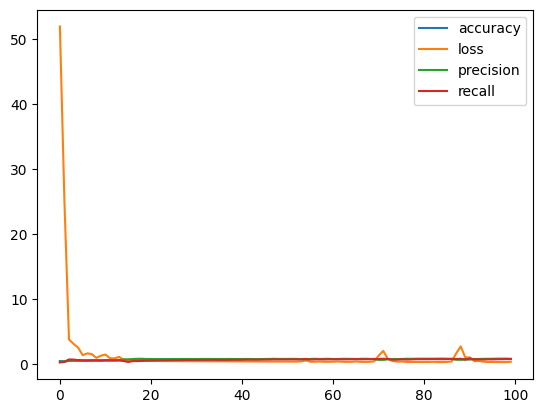

In [ ]:
pd.DataFrame(history.history).plot()

Epochs=150 ,optimizer=Adam

In [ ]:
tf.random.set_seed(42)

# STEP 1: Creating the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(7, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP 2: Compiling the model
model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  # Corrected here
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')  # Removed typo 'a=recall'
    ]
)

# STEP 3: Fit the model
history = model.fit(X_train1, y_train1, epochs=150)

Epoch 1/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3567 - loss: 107.6496 - precision: 0.3258 - recall: 0.3838
Epoch 2/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3570 - loss: 90.9091 - precision: 0.3272 - recall: 0.3879
Epoch 3/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3570 - loss: 75.2258 - precision: 0.3287 - recall: 0.3929 
Epoch 4/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3636 - loss: 60.0243 - precision: 0.3373 - recall: 0.4088 
Epoch 5/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3432 - loss: 45.1657 - precision: 0.3262 - recall: 0.4112
Epoch 6/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3315 - loss: 30.4576 - precision: 0.3226 - recall: 0.4199
Epoch 7/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3067 - loss: 15.7653 - precision: 0.3258 - recall: 0.4843
Epoch 8/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4079 - loss: 2.6572 - precision: 0.4256 - recall: 0.8418 
Epoch 9/150
1

In [ ]:
model.evaluate(X_test1,y_test1)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7808 - loss: 0.6324 - precision: 0.7788 - recall: 0.7309  


[0.5611630082130432,
 0.8007246255874634,
 0.7777777910232544,
 0.7839999794960022]

<Axes: >

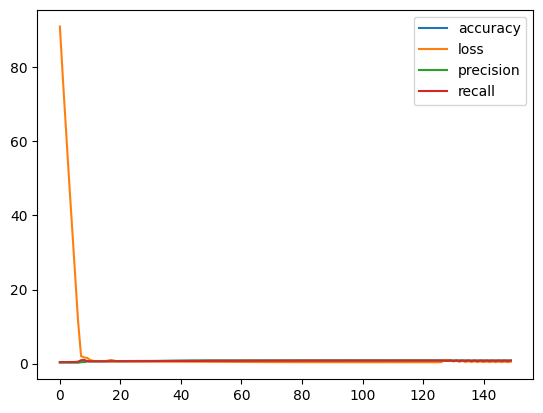

In [ ]:
pd.DataFrame(history.history).plot()

Epochs=200 ,optimizer=Adam

In [ ]:
tf.random.set_seed(42)

# STEP 1: Creating the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(7, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP 2: Compiling the model
model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),  # Corrected here
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')  # Removed typo 'a=recall'
    ]
)

# STEP 3: Fit the model
history = model.fit(X_train1, y_train1, epochs=200)

Epoch 1/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5315 - loss: 9.9475 - precision: 0.4907 - recall: 0.7874
Epoch 2/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6609 - loss: 2.1230 - precision: 0.6416 - recall: 0.5793 
Epoch 3/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6661 - loss: 1.3093 - precision: 0.7784 - recall: 0.3680 
Epoch 4/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6986 - loss: 1.6078 - precision: 0.7246 - recall: 0.5433 
Epoch 5/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6873 - loss: 0.9076 - precision: 0.7331 - recall: 0.4971 
Epoch 6/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7167 - loss: 1.1108 - precision: 0.7400 - recall: 0.5841 
Epoch 7/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6736 - loss: 0.7406 - precision: 0.7896 - recall: 0.4085 
Epoch 8/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7422 - loss: 0.6452 - precision: 0.8079 - recall: 0.5722 
Epoch 9/200
13/13

In [ ]:
model.evaluate(X_test1,y_test1)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8158 - loss: 0.5514 - precision: 0.8383 - recall: 0.7464  


[0.49301308393478394,
 0.8152173757553101,
 0.818965494632721,
 0.7599999904632568]

<Axes: >

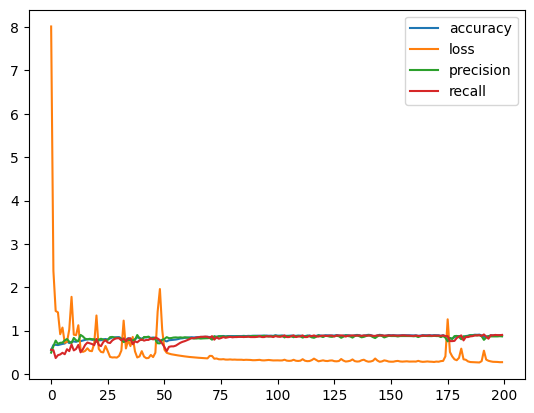

In [ ]:
pd.DataFrame(history.history).plot()

Epochs=250 ,optimizer=Adam

In [ ]:
tf.random.set_seed(42)

# STEP 1: Creating the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(7, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP 2: Compiling the model
model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  # Corrected here
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')  # Removed typo 'a=recall'
    ]
)

# STEP 3: Fit the model
history = model.fit(X_train1, y_train1, epochs=250)

Epoch 1/250
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3544 - loss: 47.6341 - precision: 0.2974 - recall: 0.3090
Epoch 2/250
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3281 - loss: 31.2416 - precision: 0.2875 - recall: 0.3238 
Epoch 3/250
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3227 - loss: 16.5763 - precision: 0.3113 - recall: 0.4025 
Epoch 4/250
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3971 - loss: 3.9214 - precision: 0.4048 - recall: 0.6879 
Epoch 5/250
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4758 - loss: 0.7006 - precision: 0.4618 - recall: 0.9041 
Epoch 6/250
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4840 - loss: 0.6660 - precision: 0.4661 - recall: 0.9030 
Epoch 7/250
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5393 - loss: 0.6502 - precision: 0.4969 - recall: 0.8653 
Epoch 8/250
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6384 - loss: 0.6414 - precision: 0.5787 - recall: 0.7672 
Epoch 9/250
13

In [ ]:
model.evaluate(X_test1,y_test1)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7998 - loss: 0.6603 - precision: 0.8173 - recall: 0.7326  


[0.6260257959365845,
 0.8152173757553101,
 0.8083333373069763,
 0.7760000228881836]

<Axes: >

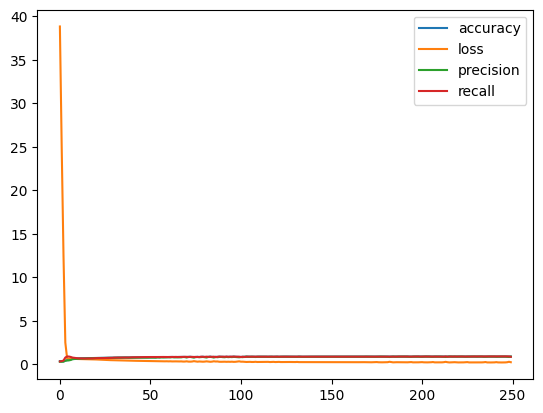

In [ ]:
pd.DataFrame(history.history).plot()

70-30

Epochs=100 ,optimizer=Adam

In [ ]:
tf.random.set_seed(42)

# STEP 1: Creating the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(7, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP 2: Compiling the model
model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),  # Corrected here
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')  # Removed typo 'a=recall'
    ]
)

# STEP 3: Fit the model
history = model.fit(X_train2, y_train2, epochs=100)

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4216 - loss: 5.8957 - precision: 0.4169 - recall: 0.9349
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5129 - loss: 1.7885 - precision: 0.4615 - recall: 0.9150 
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6841 - loss: 0.6652 - precision: 0.7234 - recall: 0.4070
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7179 - loss: 0.6530 - precision: 0.7772 - recall: 0.4657 
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7585 - loss: 0.6603 - precision: 0.7633 - recall: 0.6247 
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7506 - loss: 0.7130 - precision: 0.7465 - recall: 0.6214 
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7673 - loss: 0.7072 - precision: 0.7463 - recall: 0.6845 
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7696 - loss: 1.0567 - precision: 0.7308 - recall: 0.7235 
Epoch 9/100
16/16 

In [ ]:
model.evaluate(X_test2,y_test2)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7837 - loss: 0.7545 - precision: 0.7766 - recall: 0.7526  


[0.6150606870651245,
 0.7971014380455017,
 0.7669903039932251,
 0.8144329786300659]

<Axes: >

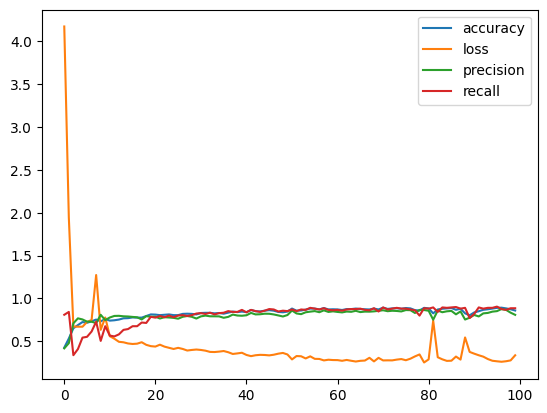

In [ ]:
pd.DataFrame(history.history).plot()

Epochs=150 ,optimizer=Adam

In [ ]:
tf.random.set_seed(42)

# STEP 1: Creating the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(7, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP 2: Compiling the model
model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),  # Corrected here
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')  # Removed typo 'a=recall'
    ]
)

# STEP 3: Fit the model
history = model.fit(X_train2, y_train2, epochs=150)

Epoch 1/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5035 - loss: 0.7087 - precision: 0.4587 - recall: 0.9401
Epoch 2/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7088 - loss: 0.6167 - precision: 0.7067 - recall: 0.5297 
Epoch 3/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7063 - loss: 0.6079 - precision: 0.7500 - recall: 0.4612 
Epoch 4/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7234 - loss: 0.5904 - precision: 0.7783 - recall: 0.4853 
Epoch 5/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7301 - loss: 0.5803 - precision: 0.7610 - recall: 0.5279 
Epoch 6/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7437 - loss: 0.5763 - precision: 0.7847 - recall: 0.5450 
Epoch 7/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7352 - loss: 0.5703 - precision: 0.7589 - recall: 0.5496 
Epoch 8/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7361 - loss: 0.5660 - precision: 0.7425 - recall: 0.5777  
Epoch 9/150
16/1

In [ ]:
model.evaluate(X_test2,y_test2)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8076 - loss: 0.7809 - precision: 0.7974 - recall: 0.7869  


[0.6373231410980225,
 0.8115941882133484,
 0.7843137383460999,
 0.8247422575950623]

<Axes: >

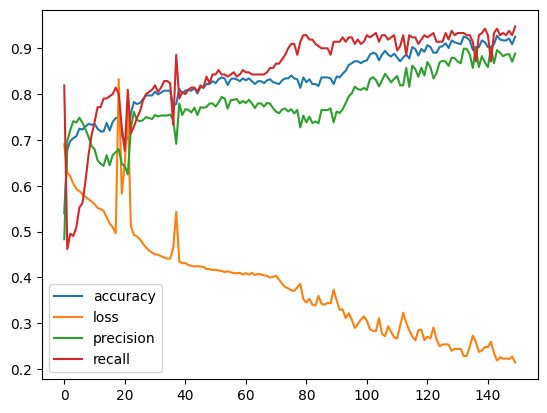

In [ ]:
pd.DataFrame(history.history).plot()

Epochs=200 ,optimizer=Adam

In [ ]:
tf.random.set_seed(42)

# STEP 1: Creating the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(7, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP 2: Compiling the model
model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),  # Corrected here
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')  # Removed typo 'a=recall'
    ]
)

# STEP 3: Fit the model
history = model.fit(X_train2, y_train2, epochs=200)

Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6680 - loss: 1.7658 - precision: 0.7150 - recall: 0.3626
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5779 - loss: 0.6888 - precision: 0.0000e+00 - recall: 0.0000e+00 
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5779 - loss: 0.6879 - precision: 0.0000e+00 - recall: 0.0000e+00 
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5779 - loss: 0.6875 - precision: 0.0000e+00 - recall: 0.0000e+00 
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5779 - loss: 0.6871 - precision: 0.0000e+00 - recall: 0.0000e+00 
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5779 - loss: 0.6868 - precision: 0.0000e+00 - recall: 0.0000e+00 
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5779 - loss: 0.6865 - precision: 0.0000e+00 - recall: 0.0000e+00 
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5779 - loss: 0.6863 - preci

In [ ]:
model.evaluate(X_test2,y_test2)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5384 - loss: 0.6902 - precision: 0.0000e+00 - recall: 0.0000e+00  


[0.6911842823028564, 0.5314009785652161, 0.0, 0.0]

<Axes: >

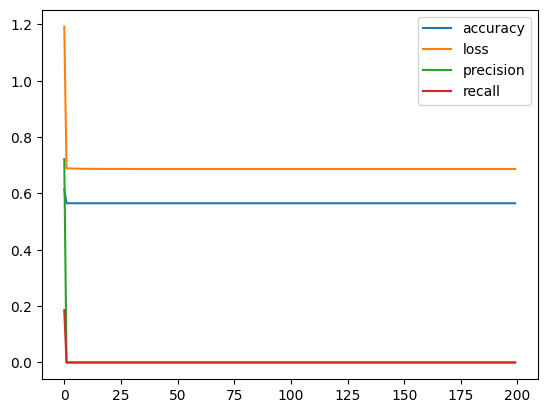

In [ ]:
pd.DataFrame(history.history).plot()

Epochs=250 ,optimizer=Adam

In [ ]:
tf.random.set_seed(42)

# STEP 1: Creating the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(7, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP 2: Compiling the model
model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),  # Corrected here
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')  # Removed typo 'a=recall'
    ]
)

# STEP 3: Fit the model
history = model.fit(X_train2, y_train2, epochs=250)

Epoch 1/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5000 - loss: 74.2325 - precision: 0.2632 - recall: 0.2291        
Epoch 2/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4903 - loss: 4.0771 - precision: 0.4522 - recall: 0.9095 
Epoch 3/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6873 - loss: 2.8334 - precision: 0.6613 - recall: 0.5319 
Epoch 4/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6660 - loss: 1.2886 - precision: 0.7109 - recall: 0.3149         
Epoch 5/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7304 - loss: 0.6669 - precision: 0.8178 - recall: 0.4658 
Epoch 6/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7624 - loss: 0.5668 - precision: 0.8154 - recall: 0.5632 
Epoch 7/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8029 - loss: 0.5198 - precision: 0.8341 - recall: 0.6664 
Epoch 8/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7962 - loss: 0.4999 - precision: 0.7716 - recall: 0.7366 


In [ ]:
model.evaluate(X_test2,y_test2)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7711 - loss: 1.1336 - precision: 0.8012 - recall: 0.6738  


[1.010964035987854, 0.782608687877655, 0.7888888716697693, 0.7319587469100952]

<Axes: >

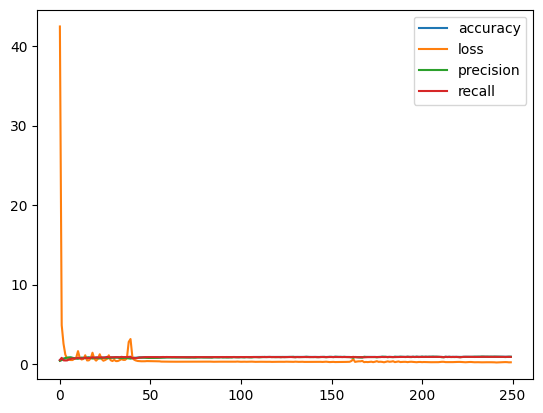

In [ ]:
pd.DataFrame(history.history).plot()

75-25

Epochs=100 ,optimizer=Adam

In [ ]:
tf.random.set_seed(42)

# STEP 1: Creating the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(7, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP 2: Compiling the model
model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),  # Corrected here
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')  # Removed typo 'a=recall'
    ]
)

# STEP 3: Fit the model
history = model.fit(X_train3, y_train3, epochs=100)

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5781 - loss: 99.4524 - precision: 0.6085 - recall: 0.0312         
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6017 - loss: 9.6584 - precision: 0.5719 - recall: 0.2718  
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6919 - loss: 1.0475 - precision: 0.6665 - recall: 0.5682 
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7135 - loss: 1.0288 - precision: 0.7000 - recall: 0.5862 
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7457 - loss: 0.8293 - precision: 0.7513 - recall: 0.6127 
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7541 - loss: 0.6486 - precision: 0.7830 - recall: 0.5950 
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7478 - loss: 0.5669 - precision: 0.8161 - recall: 0.5396 
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7431 - loss: 0.7064 - precision: 0.7744 - recall: 0.5876 
Epoch 

In [ ]:
model.evaluate(X_test3,y_test3)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7121 - loss: 0.7942 - precision: 0.6635 - recall: 0.7339  


[0.6745620369911194,
 0.7572254538536072,
 0.7127659320831299,
 0.8170731663703918]

<Axes: >

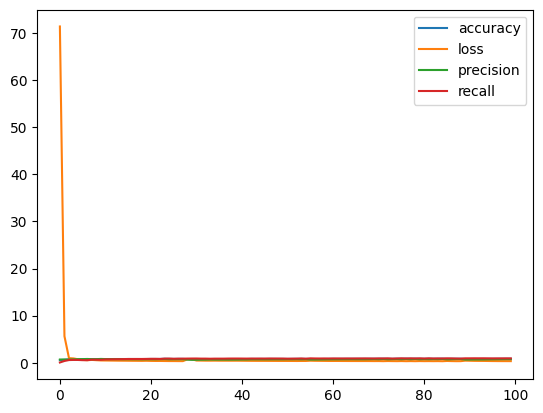

In [ ]:
pd.DataFrame(history.history).plot()

Epochs=150 ,optimizer=Adam

In [ ]:
tf.random.set_seed(42)

# STEP 1: Creating the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(7, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP 2: Compiling the model
model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),  # Corrected here
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')  # Removed typo 'a=recall'
    ]
)

# STEP 3: Fit the model
history = model.fit(X_train3, y_train3, epochs=150)

Epoch 1/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4656 - loss: 2.5344 - precision: 0.4336 - recall: 0.8116
Epoch 2/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6574 - loss: 1.6957 - precision: 0.6704 - recall: 0.4049 
Epoch 3/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6713 - loss: 5.2172 - precision: 0.6316 - recall: 0.5678 
Epoch 4/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6944 - loss: 2.3712 - precision: 0.7243 - recall: 0.4694  
Epoch 5/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6915 - loss: 1.7692 - precision: 0.7177 - recall: 0.4698 
Epoch 6/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6507 - loss: 0.8959 - precision: 0.8184 - recall: 0.2422 
Epoch 7/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6832 - loss: 0.7709 - precision: 0.8493 - recall: 0.3217  
Epoch 8/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6883 - loss: 0.7003 - precision: 0.8077 - recall: 0.3645  
Epoch 9/150
17

In [ ]:
model.evaluate(X_test3,y_test3)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7484 - loss: 0.8539 - precision: 0.6793 - recall: 0.8552  


[0.7537750005722046,
 0.7687861323356628,
 0.7019230723381042,
 0.8902438879013062]

<Axes: >

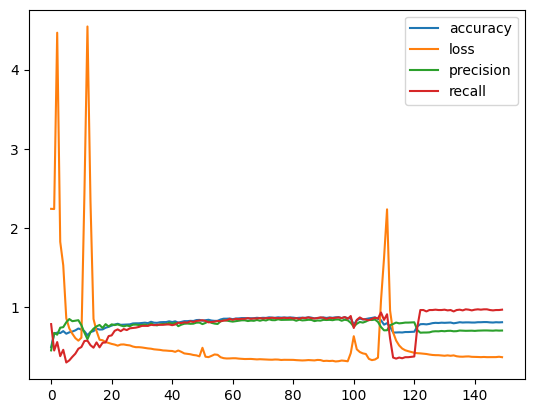

In [ ]:
pd.DataFrame(history.history).plot()

Epochs=200 ,optimizer=Adam

In [ ]:
tf.random.set_seed(42)

# STEP 1: Creating the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(7, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP 2: Compiling the model
model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),  # Corrected here
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')  # Removed typo 'a=recall'
    ]
)

# STEP 3: Fit the model
history = model.fit(X_train3, y_train3, epochs=200)

Epoch 1/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3865 - loss: 2.1444 - precision: 0.3840 - recall: 0.7354
Epoch 2/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6296 - loss: 0.6590 - precision: 0.7081 - recall: 0.2391 
Epoch 3/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6556 - loss: 0.6281 - precision: 0.7327 - recall: 0.3207 
Epoch 4/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7012 - loss: 0.6227 - precision: 0.7719 - recall: 0.4348 
Epoch 5/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6705 - loss: 0.6014 - precision: 0.7315 - recall: 0.3730 
Epoch 6/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6865 - loss: 0.5870 - precision: 0.7164 - recall: 0.4511 
Epoch 7/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7395 - loss: 0.5657 - precision: 0.7561 - recall: 0.5831  
Epoch 8/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7490 - loss: 0.5397 - precision: 0.7595 - recall: 0.6107 
Epoch 9/200
17/1

In [ ]:
model.evaluate(X_test3,y_test3)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7015 - loss: 1.1176 - precision: 0.6696 - recall: 0.6831  


[1.0105741024017334,
 0.7225433588027954,
 0.6976743936538696,
 0.7317073345184326]

<Axes: >

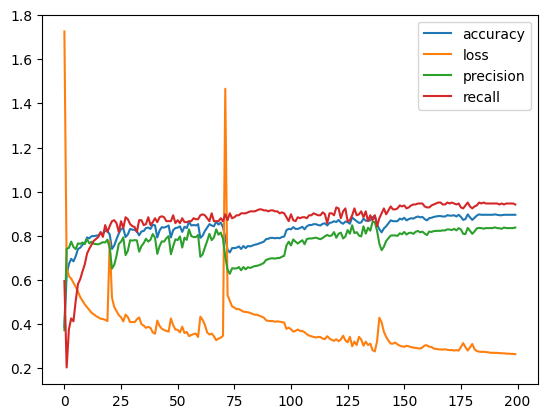

In [ ]:
pd.DataFrame(history.history).plot()

Epochs=250 ,optimizer=Adam

In [ ]:
tf.random.set_seed(42)

# STEP 1: Creating the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(7, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP 2: Compiling the model
model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),  # Corrected here
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')  # Removed typo 'a=recall'
    ]
)

# STEP 3: Fit the model
history = model.fit(X_train3, y_train3, epochs=250)

Epoch 1/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4197 - loss: 4.8169 - precision: 0.4179 - recall: 0.8955
Epoch 2/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5124 - loss: 0.9270 - precision: 0.4544 - recall: 0.6172 
Epoch 3/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6491 - loss: 1.4458 - precision: 0.6337 - recall: 0.4406 
Epoch 4/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6711 - loss: 1.9956 - precision: 0.6638 - recall: 0.4902  
Epoch 5/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6582 - loss: 1.5311 - precision: 0.6789 - recall: 0.4047  
Epoch 6/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6752 - loss: 0.9254 - precision: 0.7777 - recall: 0.3423 
Epoch 7/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6981 - loss: 0.7968 - precision: 0.7803 - recall: 0.4166 
Epoch 8/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7194 - loss: 0.8115 - precision: 0.7993 - recall: 0.4643 
Epoch 9/250
17/

In [ ]:
model.evaluate(X_test3,y_test3)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7726 - loss: 0.6047 - precision: 0.7913 - recall: 0.6919  


[0.5627264380455017,
 0.7919074892997742,
 0.7948718070983887,
 0.7560975551605225]

<Axes: >

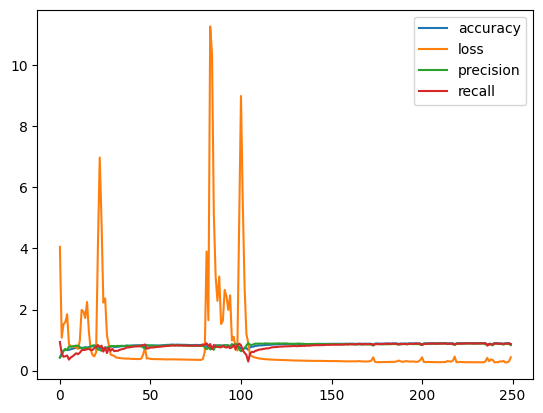

In [ ]:
pd.DataFrame(history.history).plot()

80-20

Epochs=100 ,optimizer=Adam

In [ ]:
tf.random.set_seed(42)

# STEP 1: Creating the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(7, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP 2: Compiling the model
model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  # Corrected here
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')  # Removed typo 'a=recall'
    ]
)

# STEP 3: Fit the model
history = model.fit(X_train4, y_train4, epochs=100)

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4300 - loss: 3.0485 - precision: 0.4300 - recall: 0.9984
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4635 - loss: 1.1288 - precision: 0.4428 - recall: 0.9547 
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5968 - loss: 0.6766 - precision: 0.5227 - recall: 0.7322 
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6330 - loss: 0.6780 - precision: 0.5970 - recall: 0.4245  
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6637 - loss: 0.6436 - precision: 0.6121 - recall: 0.5988 
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6668 - loss: 0.6323 - precision: 0.6192 - recall: 0.5886 
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6783 - loss: 0.6199 - precision: 0.6470 - recall: 0.5570 
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6906 - loss: 0.6128 - precision: 0.6763 - recall: 0.5413 
Epoch 9/100
18/1

In [ ]:
model.evaluate(X_test4,y_test4)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6379 - loss: 0.7814 - precision: 0.6947 - recall: 0.4062  


[0.7721782922744751,
 0.6376811861991882,
 0.738095223903656,
 0.44285714626312256]

<Axes: >

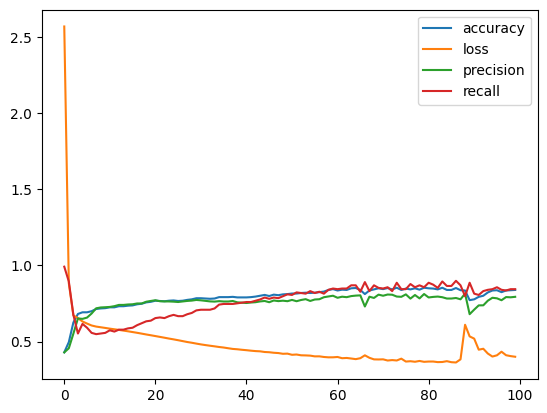

In [ ]:
pd.DataFrame(history.history).plot()

Epochs=150 ,optimizer=Adam

In [ ]:
tf.random.set_seed(42)

# STEP 1: Creating the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(7, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP 2: Compiling the model
model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),  # Corrected here
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')  # Removed typo 'a=recall'
    ]
)

# STEP 3: Fit the model
history = model.fit(X_train4, y_train4, epochs=150)

Epoch 1/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4630 - loss: 2.1327 - precision: 0.3921 - recall: 0.5212
Epoch 2/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5698 - loss: 0.6893 - precision: 0.0000e+00 - recall: 0.0000e+00 
Epoch 3/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5698 - loss: 0.6838 - precision: 0.0000e+00 - recall: 0.0000e+00  
Epoch 4/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5698 - loss: 0.6819 - precision: 0.0000e+00 - recall: 0.0000e+00  
Epoch 5/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5698 - loss: 0.6822 - precision: 0.0000e+00 - recall: 0.0000e+00  
Epoch 6/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5698 - loss: 0.6777 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 7/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5698 - loss: 0.6548 - precision: 0.0000e+00 - recall: 0.0000e+00 
Epoch 8/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5698 - loss: 0.6210 - pre

In [ ]:
model.evaluate(X_test4,y_test4)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6988 - loss: 0.8332 - precision: 0.6300 - recall: 0.8515  


[0.7217797040939331, 0.717391312122345, 0.6666666865348816, 0.8857142925262451]

<Axes: >

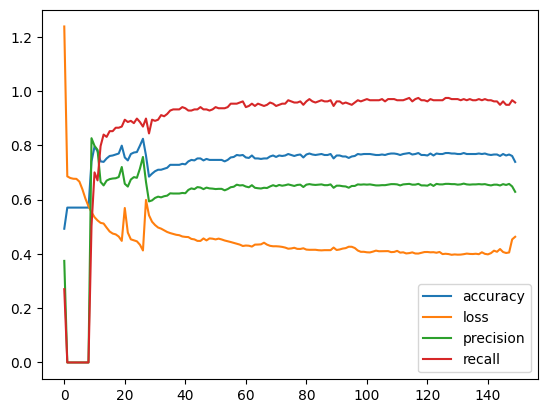

In [ ]:
pd.DataFrame(history.history).plot()

Epochs=200 ,optimizer=Adam

In [ ]:
tf.random.set_seed(42)

# STEP 1: Creating the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(7, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP 2: Compiling the model
model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  # Corrected here
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')  # Removed typo 'a=recall'
    ]
)

# STEP 3: Fit the model
history = model.fit(X_train4, y_train4, epochs=200)

Epoch 1/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6149 - loss: 1.1457 - precision: 0.5337 - recall: 0.8218
Epoch 2/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6400 - loss: 0.6450 - precision: 0.5600 - recall: 0.7542 
Epoch 3/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6598 - loss: 0.6111 - precision: 0.5796 - recall: 0.7567 
Epoch 4/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6734 - loss: 0.6020 - precision: 0.5953 - recall: 0.7505  
Epoch 5/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6717 - loss: 0.5949 - precision: 0.5940 - recall: 0.7464 
Epoch 6/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6818 - loss: 0.5903 - precision: 0.6061 - recall: 0.7434 
Epoch 7/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7025 - loss: 0.5854 - precision: 0.6330 - recall: 0.7347 
Epoch 8/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7054 - loss: 0.5811 - precision: 0.6415 - recall: 0.7185 
Epoch 9/200
18/1

In [ ]:
model.evaluate(X_test4,y_test4)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7232 - loss: 0.7736 - precision: 0.6792 - recall: 0.7552  


[0.7269845604896545,
 0.7463768124580383,
 0.7215189933776855,
 0.8142856955528259]

<Axes: >

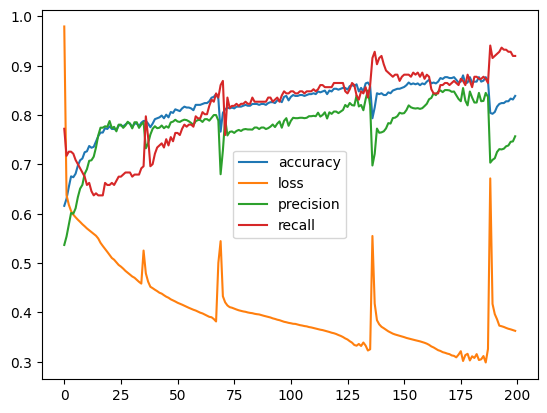

In [ ]:
pd.DataFrame(history.history).plot()

Epochs=250 ,optimizer=Adam

In [ ]:
tf.random.set_seed(42)

# STEP 1: Creating the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(7, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP 2: Compiling the model
model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  # Corrected here
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')  # Removed typo 'a=recall'
    ]
)

# STEP 3: Fit the model
history = model.fit(X_train4, y_train4, epochs=250)

Epoch 1/250
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4302 - loss: 25.1626 - precision: 0.4302 - recall: 1.0000
Epoch 2/250
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4302 - loss: 18.1981 - precision: 0.4302 - recall: 1.0000 
Epoch 3/250
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4302 - loss: 12.5672 - precision: 0.4302 - recall: 1.0000  
Epoch 4/250
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4302 - loss: 8.1503 - precision: 0.4302 - recall: 1.0000  
Epoch 5/250
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4305 - loss: 4.9645 - precision: 0.4303 - recall: 1.0000  
Epoch 6/250
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4417 - loss: 2.9471 - precision: 0.4351 - recall: 1.0000  
Epoch 7/250
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4383 - loss: 2.0119 - precision: 0.4337 - recall: 1.0000 
Epoch 8/250
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4733 - loss: 1.4687 - precision: 0.4496 - recall: 1.0000 
Epoch 9/25

In [ ]:
model.evaluate(X_test4,y_test4)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7096 - loss: 0.7341 - precision: 0.7840 - recall: 0.5289  


[0.6634727716445923, 0.717391312122345, 0.8039215803146362, 0.5857142806053162]

<Axes: >

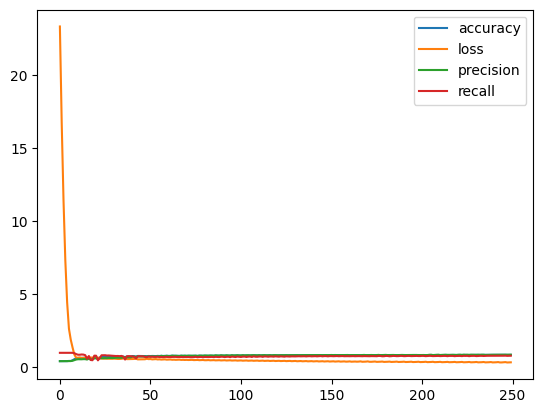

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
tf.random.set_seed(42)

# STEP 1: Creating the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(7, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP 2: Compiling the model
model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  # Corrected here
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')  # Removed typo 'a=recall'
    ]
)

# STEP 3: Fit the model
history = model.fit(X_train4, y_train4, epochs=300)

Epoch 1/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6570 - loss: 1.3214 - precision: 0.6029 - recall: 0.6008
Epoch 2/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6764 - loss: 0.6849 - precision: 0.7139 - recall: 0.4179 
Epoch 3/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6807 - loss: 0.6375 - precision: 0.7015 - recall: 0.4510 
Epoch 4/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6797 - loss: 0.6267 - precision: 0.6959 - recall: 0.4552  
Epoch 5/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6890 - loss: 0.6200 - precision: 0.7140 - recall: 0.4624  
Epoch 6/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6937 - loss: 0.6120 - precision: 0.7244 - recall: 0.4656 
Epoch 7/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6966 - loss: 0.6005 - precision: 0.7273 - recall: 0.4724 
Epoch 8/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6934 - loss: 0.5910 - precision: 0.7177 - recall: 0.4744 
Epoch 9/300
18/

In [ ]:
model.evaluate(X_test4,y_test4)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7758 - loss: 0.7108 - precision: 0.7890 - recall: 0.7202  


[0.6527073383331299, 0.7753623127937317, 0.782608687877655, 0.7714285850524902]

<Axes: >

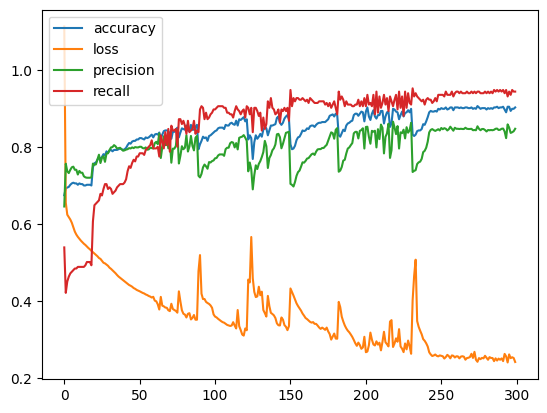

In [ ]:
pd.DataFrame(history.history).plot()

# NN after VIF

# 60-40 Train Test Split

Epochs=100 ,optimizer=Adam


In [ ]:
import tensorflow as tf

In [ ]:
tf.random.set_seed(42)

# STEP 1: Creating the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(7, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP 2: Compiling the model
model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  # Corrected here
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')  # Removed typo 'a=recall'
    ]
)

# STEP 3: Fit the model
history = model.fit(X_train1_nomulti, y_train1_nomulti, epochs=100)


Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6204 - loss: 0.6609 - precision: 0.5773 - recall: 0.6505
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6787 - loss: 0.6249 - precision: 0.6302 - recall: 0.7319 
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6742 - loss: 0.6027 - precision: 0.6259 - recall: 0.7164 
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7079 - loss: 0.5878 - precision: 0.6807 - recall: 0.6824 
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7227 - loss: 0.5771 - precision: 0.7155 - recall: 0.6548 
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7231 - loss: 0.5684 - precision: 0.7196 - recall: 0.6476 
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7238 - loss: 0.5602 - precision: 0.7243 - recall: 0.6404  
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7256 - loss: 0.5529 - precision: 0.7275 - recall: 0.6404 
Epoch 9/100
13/1

In [ ]:
model.evaluate(X_test1_nomulti,y_test1_nomulti)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7129 - loss: 0.5750 - precision: 0.6777 - recall: 0.6940  


[0.5206040740013123, 0.75, 0.7222222089767456, 0.7279999852180481]

<Axes: >

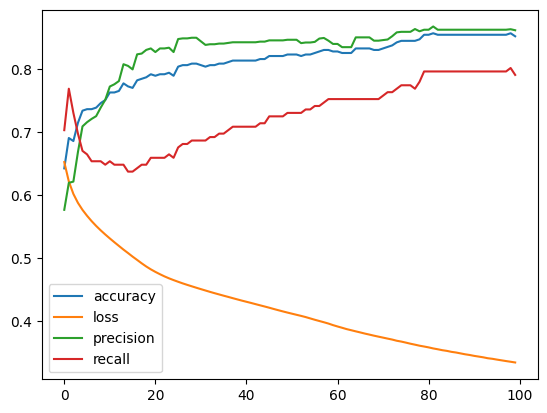

In [ ]:
pd.DataFrame(history.history).plot()

Epochs=150 ,optimizer=Adam

In [ ]:
tf.random.set_seed(42)

# STEP 1: Creating the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(7, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP 2: Compiling the model
model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),  # Corrected here
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')  # Removed typo 'a=recall'
    ]
)

# STEP 3: Fit the model
history = model.fit(X_train1_nomulti, y_train1_nomulti, epochs=150)

Epoch 1/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4712 - loss: 0.6776 - precision: 0.4624 - recall: 0.9812
Epoch 2/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6734 - loss: 0.6116 - precision: 0.6120 - recall: 0.7834 
Epoch 3/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7521 - loss: 0.5894 - precision: 0.7540 - recall: 0.6801 
Epoch 4/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7677 - loss: 0.5673 - precision: 0.7837 - recall: 0.6801 
Epoch 5/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7746 - loss: 0.5522 - precision: 0.8020 - recall: 0.6752 
Epoch 6/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7664 - loss: 0.5373 - precision: 0.7814 - recall: 0.6801 
Epoch 7/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7907 - loss: 0.5242 - precision: 0.8290 - recall: 0.6861 
Epoch 8/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8020 - loss: 0.5136 - precision: 0.8526 - recall: 0.6878 
Epoch 9/150
13/13

In [ ]:
model.evaluate(X_test1_nomulti,y_test1_nomulti)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6877 - loss: 2.0567 - precision: 0.6977 - recall: 0.5585  


[1.6024458408355713,
 0.7101449370384216,
 0.7227723002433777,
 0.5839999914169312]

<Axes: >

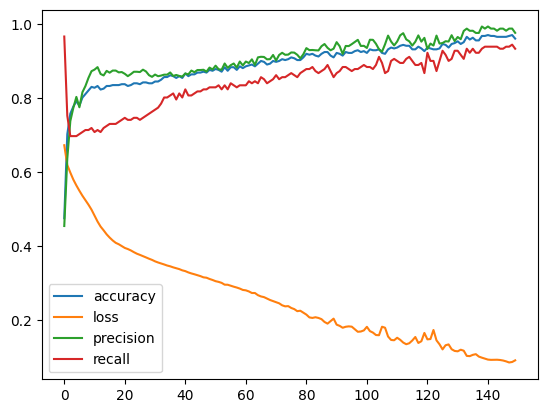

In [ ]:
pd.DataFrame(history.history).plot()

Epochs=200 ,optimizer=Adam

In [ ]:
tf.random.set_seed(42)

# STEP 1: Creating the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(7, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP 2: Compiling the model
model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  # Corrected here
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')  # Removed typo 'a=recall'
    ]
)

# STEP 3: Fit the model
history = model.fit(X_train1_nomulti, y_train1_nomulti, epochs=200)

Epoch 1/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4569 - loss: 0.6822 - precision: 0.4563 - recall: 0.9886
Epoch 2/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4990 - loss: 0.6717 - precision: 0.4765 - recall: 0.9889 
Epoch 3/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5477 - loss: 0.6630 - precision: 0.5027 - recall: 0.9316 
Epoch 4/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6074 - loss: 0.6544 - precision: 0.5430 - recall: 0.8921 
Epoch 5/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6753 - loss: 0.6446 - precision: 0.6009 - recall: 0.8644 
Epoch 6/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7012 - loss: 0.6333 - precision: 0.6368 - recall: 0.8087 
Epoch 7/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7226 - loss: 0.6212 - precision: 0.6636 - recall: 0.8002 
Epoch 8/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7302 - loss: 0.6084 - precision: 0.6756 - recall: 0.7888 
Epoch 9/200
13/13

In [ ]:
model.evaluate(X_test1_nomulti,y_test1_nomulti)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7341 - loss: 0.6902 - precision: 0.6906 - recall: 0.7511  


[0.6259517073631287,
 0.7536231875419617,
 0.7175572514533997,
 0.7519999742507935]

<Axes: >

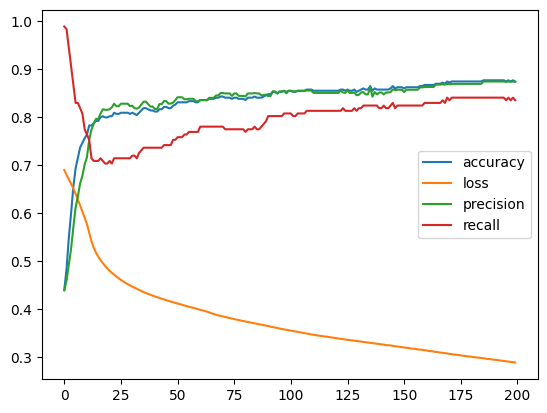

In [ ]:
pd.DataFrame(history.history).plot()

Epochs=250 ,optimizer=Adam

In [ ]:
tf.random.set_seed(42)

# STEP 1: Creating the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(7, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP 2: Compiling the model
model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  # Corrected here
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')  # Removed typo 'a=recall'
    ]
)

# STEP 3: Fit the model
history = model.fit(X_train1_nomulti, y_train1_nomulti, epochs=250)

Epoch 1/250
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5529 - loss: 0.7570 - precision: 0.5218 - recall: 0.3125
Epoch 2/250
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5859 - loss: 0.7098 - precision: 0.5626 - recall: 0.4303 
Epoch 3/250
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6055 - loss: 0.6786 - precision: 0.5851 - recall: 0.4775 
Epoch 4/250
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6214 - loss: 0.6558 - precision: 0.5940 - recall: 0.5457 
Epoch 5/250
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6367 - loss: 0.6411 - precision: 0.6124 - recall: 0.5628 
Epoch 6/250
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6675 - loss: 0.6289 - precision: 0.6543 - recall: 0.5803 
Epoch 7/250
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6826 - loss: 0.6167 - precision: 0.6670 - recall: 0.6108 
Epoch 8/250
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6931 - loss: 0.6030 - precision: 0.6801 - recall: 0.6200  
Epoch 9/250
13/1

In [ ]:
model.evaluate(X_test1_nomulti,y_test1_nomulti)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7391 - loss: 0.9291 - precision: 0.7413 - recall: 0.6484  


[0.8143585920333862,
 0.7572463750839233,
 0.7589285969734192,
 0.6800000071525574]

<Axes: >

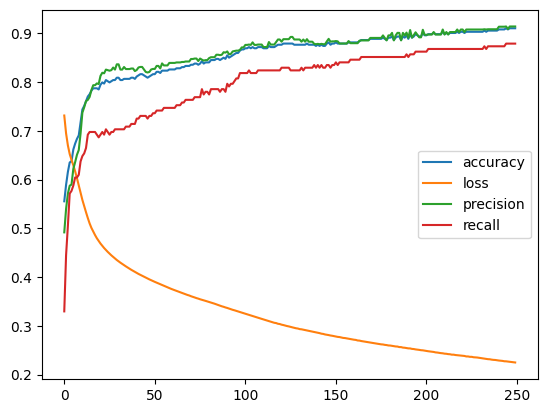

In [ ]:
pd.DataFrame(history.history).plot()

# 70-30

Epochs=100 ,optimizer=Adam

In [ ]:
tf.random.set_seed(42)

# STEP 1: Creating the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(7, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP 2: Compiling the model
model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  # Corrected here
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')  # Removed typo 'a=recall'
    ]
)

# STEP 3: Fit the model
history = model.fit(X_train2_nomulti, y_train2_nomulti, epochs=100)

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4482 - loss: 0.6835 - precision: 0.4333 - recall: 0.9948
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4958 - loss: 0.6641 - precision: 0.4517 - recall: 0.8940 
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5654 - loss: 0.6526 - precision: 0.4920 - recall: 0.8324 
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6235 - loss: 0.6429 - precision: 0.5393 - recall: 0.7700 
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6762 - loss: 0.6335 - precision: 0.5939 - recall: 0.7494 
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7174 - loss: 0.6239 - precision: 0.6479 - recall: 0.7265 
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7394 - loss: 0.6142 - precision: 0.6907 - recall: 0.6950 
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7285 - loss: 0.6048 - precision: 0.6894 - recall: 0.6515 
Epoch 9/100
16/16

In [ ]:
model.evaluate(X_test2_nomulti,y_test2_nomulti)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7361 - loss: 0.6271 - precision: 0.7317 - recall: 0.6667  


[0.5623318552970886, 0.7439613342285156, 0.739130437374115, 0.7010309100151062]

<Axes: >

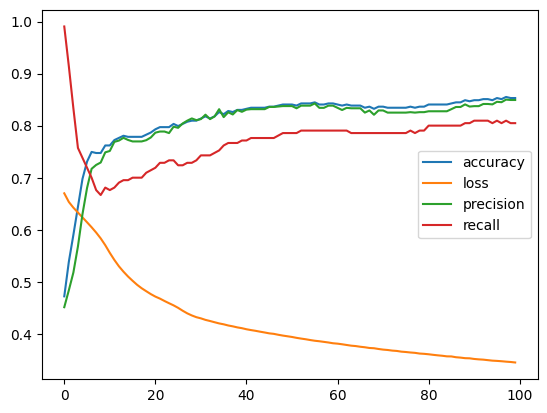

In [ ]:
pd.DataFrame(history.history).plot()

Epochs=150 ,optimizer=Adam

In [ ]:
tf.random.set_seed(42)

# STEP 1: Creating the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(7, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP 2: Compiling the model
model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  # Corrected here
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')  # Removed typo 'a=recall'
    ]
)

# STEP 3: Fit the model
history = model.fit(X_train2_nomulti, y_train2_nomulti, epochs=150)

Epoch 1/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6219 - loss: 0.6849 - precision: 0.7862 - recall: 0.1470
Epoch 2/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6178 - loss: 0.6699 - precision: 0.6604 - recall: 0.1964 
Epoch 3/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6387 - loss: 0.6552 - precision: 0.6829 - recall: 0.2691 
Epoch 4/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6548 - loss: 0.6403 - precision: 0.6941 - recall: 0.3248 
Epoch 5/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6800 - loss: 0.6260 - precision: 0.7155 - recall: 0.4007 
Epoch 6/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7045 - loss: 0.6103 - precision: 0.7315 - recall: 0.4733 
Epoch 7/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7295 - loss: 0.5930 - precision: 0.7389 - recall: 0.5548 
Epoch 8/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7460 - loss: 0.5767 - precision: 0.7470 - recall: 0.6019 
Epoch 9/150
16/16

In [ ]:
model.evaluate(X_test2_nomulti,y_test2_nomulti)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7639 - loss: 0.7536 - precision: 0.7554 - recall: 0.7250  


[0.7030285596847534,
 0.7536231875419617,
 0.7395833134651184,
 0.7319587469100952]

<Axes: >

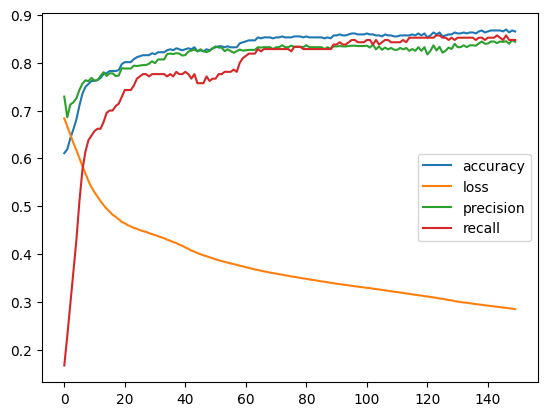

In [ ]:
pd.DataFrame(history.history).plot()

Epochs=200 ,optimizer=Adam

In [ ]:
tf.random.set_seed(42)

# STEP 1: Creating the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(7, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP 2: Compiling the model
model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  # Corrected here
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')  # Removed typo 'a=recall'
    ]
)

# STEP 3: Fit the model
history = model.fit(X_train2_nomulti, y_train2_nomulti, epochs=200)

Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4282 - loss: 0.7200 - precision: 0.3763 - recall: 0.5275
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5405 - loss: 0.6839 - precision: 0.4720 - recall: 0.6856 
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6043 - loss: 0.6681 - precision: 0.5259 - recall: 0.7547 
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6339 - loss: 0.6570 - precision: 0.5516 - recall: 0.7363 
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6526 - loss: 0.6461 - precision: 0.5716 - recall: 0.7234 
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6760 - loss: 0.6342 - precision: 0.5987 - recall: 0.7133 
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6775 - loss: 0.6211 - precision: 0.6034 - recall: 0.6935 
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7191 - loss: 0.6064 - precision: 0.6633 - recall: 0.6820 
Epoch 9/200
16/16

In [ ]:
model.evaluate(X_test2_nomulti,y_test2_nomulti)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6966 - loss: 1.0602 - precision: 0.6813 - recall: 0.6328  


[0.8758370280265808, 0.729468584060669, 0.7303370833396912, 0.6701030731201172]

<Axes: >

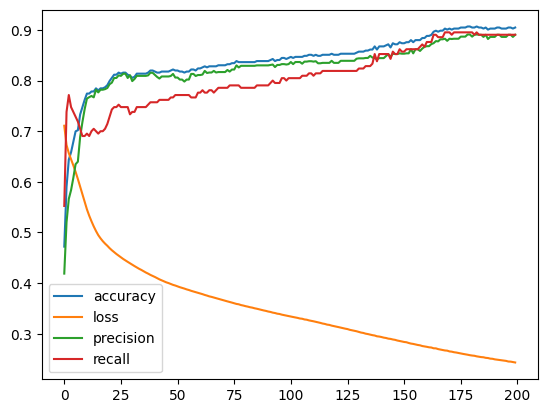

In [ ]:
pd.DataFrame(history.history).plot()

Epochs=250 ,optimizer=Adam

In [ ]:
tf.random.set_seed(42)

# STEP 1: Creating the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP 2: Compiling the model
model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),  # Corrected here
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')  # Removed typo 'a=recall'
    ]
)

# STEP 3: Fit the model
history = model.fit(X_train2_nomulti, y_train2_nomulti, epochs=250)

Epoch 1/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5684 - loss: 0.6726 - precision: 0.4843 - recall: 0.4891
Epoch 2/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7209 - loss: 0.5521 - precision: 0.6608 - recall: 0.6956 
Epoch 3/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7660 - loss: 0.4945 - precision: 0.7957 - recall: 0.6082 
Epoch 4/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8028 - loss: 0.4640 - precision: 0.8016 - recall: 0.7095 
Epoch 5/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8079 - loss: 0.4409 - precision: 0.8067 - recall: 0.7195 
Epoch 6/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8096 - loss: 0.4296 - precision: 0.8328 - recall: 0.6898  
Epoch 7/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8224 - loss: 0.4112 - precision: 0.8333 - recall: 0.7247 
Epoch 8/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8238 - loss: 0.3986 - precision: 0.8260 - recall: 0.7400  
Epoch 9/250
16/

In [ ]:
model.evaluate(X_test2_nomulti,y_test2_nomulti)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6676 - loss: 5.1319 - precision: 0.6511 - recall: 0.6026  


[4.440062999725342, 0.6908212304115295, 0.6896551847457886, 0.6185566782951355]

<Axes: >

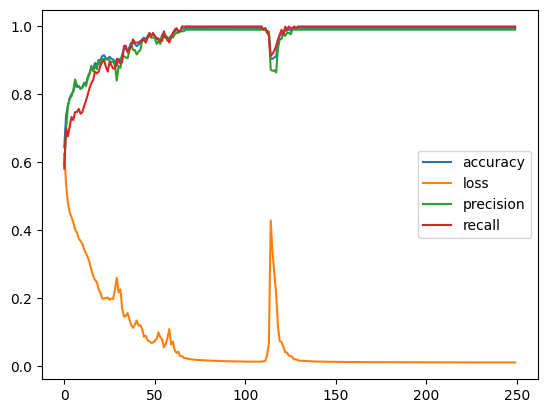

In [ ]:
pd.DataFrame(history.history).plot()

# 75-25

Epochs=100 ,optimizer=Adam

In [ ]:
tf.random.set_seed(42)

# STEP 1: Creating the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(7, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP 2: Compiling the model
model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  # Corrected here
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')  # Removed typo 'a=recall'
    ]
)

# STEP 3: Fit the model
history = model.fit(X_train3_nomulti, y_train3_nomulti, epochs=100)

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4318 - loss: 0.6776 - precision: 0.4313 - recall: 1.0000
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4678 - loss: 0.6546 - precision: 0.4473 - recall: 0.9993 
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5351 - loss: 0.6415 - precision: 0.4805 - recall: 0.9787 
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6117 - loss: 0.6317 - precision: 0.5278 - recall: 0.9284  
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6418 - loss: 0.6234 - precision: 0.5515 - recall: 0.9022 
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6641 - loss: 0.6156 - precision: 0.5718 - recall: 0.8754 
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6826 - loss: 0.6085 - precision: 0.5934 - recall: 0.8354  
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7114 - loss: 0.6023 - precision: 0.6260 - recall: 0.8185 
Epoch 9/100
17/

In [ ]:
model.evaluate(X_test3_nomulti,y_test3_nomulti)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7377 - loss: 0.5978 - precision: 0.7637 - recall: 0.6261  


[0.5338678359985352,
 0.7456647157669067,
 0.7878788113594055,
 0.6341463327407837]

<Axes: >

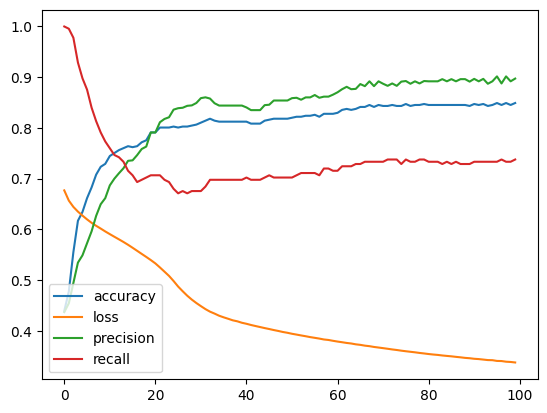

In [ ]:
pd.DataFrame(history.history).plot()

Epochs=150 ,optimizer=Adam

In [ ]:
tf.random.set_seed(42)

# STEP 1: Creating the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(7, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP 2: Compiling the model
model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  # Corrected here
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')  # Removed typo 'a=recall'
    ]
)

# STEP 3: Fit the model
history = model.fit(X_train3_nomulti, y_train3_nomulti, epochs=150)

Epoch 1/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6148 - loss: 0.7127 - precision: 0.6071 - recall: 0.3377
Epoch 2/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6215 - loss: 0.6516 - precision: 0.5660 - recall: 0.5233 
Epoch 3/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6496 - loss: 0.6287 - precision: 0.6013 - recall: 0.5563 
Epoch 4/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7012 - loss: 0.6094 - precision: 0.6954 - recall: 0.5477 
Epoch 5/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7204 - loss: 0.5919 - precision: 0.7526 - recall: 0.5248 
Epoch 6/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7269 - loss: 0.5767 - precision: 0.7754 - recall: 0.5188  
Epoch 7/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7356 - loss: 0.5632 - precision: 0.7891 - recall: 0.5290 
Epoch 8/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7485 - loss: 0.5501 - precision: 0.8130 - recall: 0.5429  
Epoch 9/150
17/

In [ ]:
model.evaluate(X_test3_nomulti,y_test3_nomulti)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7278 - loss: 0.7921 - precision: 0.7151 - recall: 0.6785  


[0.7158947587013245,
 0.7398843765258789,
 0.7402597665786743,
 0.6951219439506531]

<Axes: >

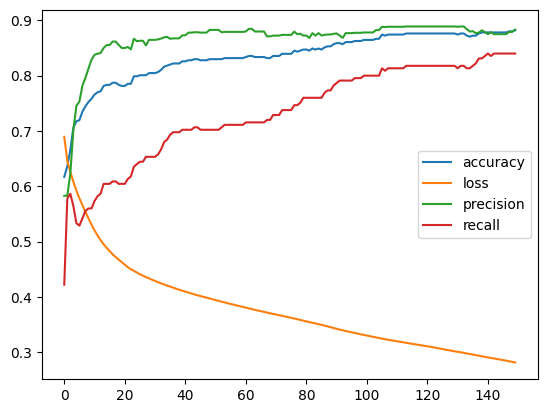

In [ ]:
pd.DataFrame(history.history).plot()

Epochs=200 ,optimizer=Adam

In [ ]:
tf.random.set_seed(42)

# STEP 1: Creating the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(7, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP 2: Compiling the model
model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  # Corrected here
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')  # Removed typo 'a=recall'
    ]
)

# STEP 3: Fit the model
history = model.fit(X_train3_nomulti, y_train3_nomulti, epochs=200)

Epoch 1/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4722 - loss: 0.6832 - precision: 0.4422 - recall: 0.8594
Epoch 2/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5415 - loss: 0.6734 - precision: 0.4805 - recall: 0.7851 
Epoch 3/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6168 - loss: 0.6641 - precision: 0.5411 - recall: 0.7221  
Epoch 4/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6701 - loss: 0.6526 - precision: 0.6082 - recall: 0.6556 
Epoch 5/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6703 - loss: 0.6405 - precision: 0.6272 - recall: 0.5810 
Epoch 6/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6868 - loss: 0.6279 - precision: 0.6559 - recall: 0.5816 
Epoch 7/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7268 - loss: 0.6138 - precision: 0.6999 - recall: 0.6461 
Epoch 8/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7288 - loss: 0.6031 - precision: 0.7067 - recall: 0.6345 
Epoch 9/200
17/1

In [ ]:
model.evaluate(X_test3_nomulti,y_test3_nomulti)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7341 - loss: 0.9353 - precision: 0.7484 - recall: 0.6329  


[0.7891052961349487,
 0.7456647157669067,
 0.7714285850524902,
 0.6585366129875183]

<Axes: >

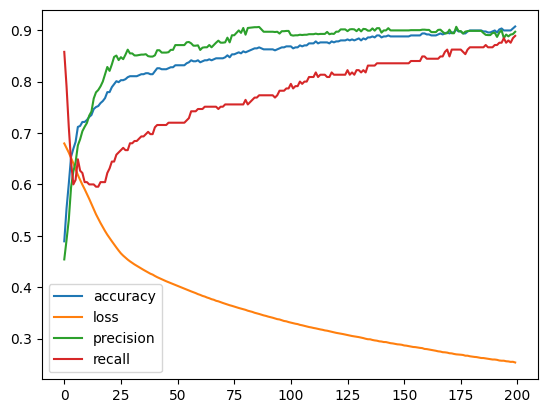

In [ ]:
pd.DataFrame(history.history).plot()

Epochs=250 ,optimizer=Adam

In [ ]:
tf.random.set_seed(42)

# STEP 1: Creating the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(7, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP 2: Compiling the model
model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  # Corrected here
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')  # Removed typo 'a=recall'
    ]
)

# STEP 3: Fit the model
history = model.fit(X_train3_nomulti, y_train3_nomulti, epochs=250)

Epoch 1/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5005 - loss: 0.7095 - precision: 0.4568 - recall: 0.8415
Epoch 2/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6006 - loss: 0.6675 - precision: 0.5278 - recall: 0.7147 
Epoch 3/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6560 - loss: 0.6451 - precision: 0.5934 - recall: 0.6539  
Epoch 4/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6979 - loss: 0.6269 - precision: 0.6453 - recall: 0.6675  
Epoch 5/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7056 - loss: 0.6111 - precision: 0.6590 - recall: 0.6594 
Epoch 6/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7270 - loss: 0.5972 - precision: 0.6940 - recall: 0.6557 
Epoch 7/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7342 - loss: 0.5842 - precision: 0.7159 - recall: 0.6364 
Epoch 8/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7536 - loss: 0.5714 - precision: 0.7482 - recall: 0.6459 
Epoch 9/250
17/

In [ ]:
model.evaluate(X_test3_nomulti,y_test3_nomulti)

6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7302 - loss: 1.0732 - precision: 0.6929 - recall: 0.7355


[0.8664532899856567,
 0.7456647157669067,
 0.7159090638160706,
 0.7682926654815674]

<Axes: >

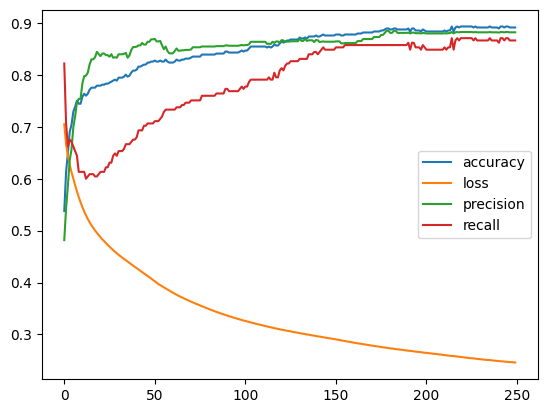

In [ ]:
pd.DataFrame(history.history).plot()

# 80-20

Epochs=100 ,optimizer=Adam

In [ ]:
tf.random.set_seed(42)

# STEP 1: Creating the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(7, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP 2: Compiling the model
model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  # Corrected here
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')  # Removed typo 'a=recall'
    ]
)

# STEP 3: Fit the model
history = model.fit(X_train4_nomulti, y_train4_nomulti, epochs=100)

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3717 - loss: 1.2166 - precision: 0.2183 - recall: 0.1805
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3680 - loss: 1.0181 - precision: 0.2827 - recall: 0.3063 
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3682 - loss: 0.8787 - precision: 0.3210 - recall: 0.4205 
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3613 - loss: 0.7816 - precision: 0.3460 - recall: 0.5453 
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3953 - loss: 0.7195 - precision: 0.3855 - recall: 0.6853 
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4849 - loss: 0.6891 - precision: 0.4468 - recall: 0.8308 
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5322 - loss: 0.6741 - precision: 0.4746 - recall: 0.8183 
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5864 - loss: 0.6640 - precision: 0.5110 - recall: 0.8682 
Epoch 9/100
18/18

In [ ]:
model.evaluate(X_test4_nomulti,y_test4_nomulti)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7749 - loss: 0.6170 - precision: 0.8094 - recall: 0.6858  


[0.5598129034042358, 0.7753623127937317, 0.800000011920929, 0.7428571581840515]

<Axes: >

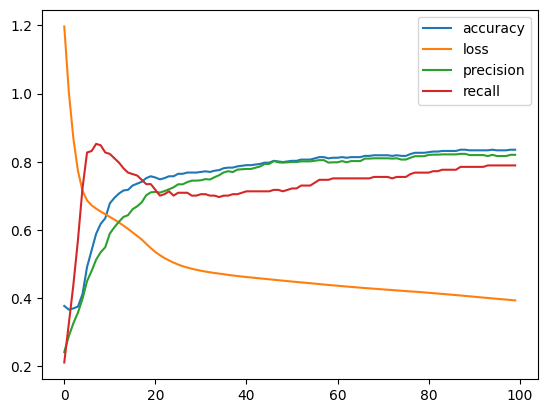

In [ ]:
pd.DataFrame(history.history).plot()

Epochs=150 ,optimizer=Adam

In [ ]:
tf.random.set_seed(42)

# STEP 1: Creating the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(7, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP 2: Compiling the model
model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  # Corrected here
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')  # Removed typo 'a=recall'
    ]
)

# STEP 3: Fit the model
history = model.fit(X_train4_nomulti, y_train4_nomulti, epochs=150)

Epoch 1/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5607 - loss: 0.7113 - precision: 0.4774 - recall: 0.2997
Epoch 2/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6249 - loss: 0.6546 - precision: 0.5618 - recall: 0.5802 
Epoch 3/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6264 - loss: 0.6260 - precision: 0.5572 - recall: 0.6562 
Epoch 4/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6873 - loss: 0.6070 - precision: 0.6227 - recall: 0.6938  
Epoch 5/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7077 - loss: 0.5892 - precision: 0.6494 - recall: 0.6981 
Epoch 6/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7325 - loss: 0.5737 - precision: 0.6927 - recall: 0.6801 
Epoch 7/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7509 - loss: 0.5594 - precision: 0.7269 - recall: 0.6756 
Epoch 8/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7633 - loss: 0.5469 - precision: 0.7539 - recall: 0.6703 
Epoch 9/150
18/1

In [ ]:
model.evaluate(X_test4_nomulti,y_test4_nomulti)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6987 - loss: 0.7239 - precision: 0.6999 - recall: 0.6296  


[0.640667200088501, 0.7028985619544983, 0.7543859481811523, 0.6142857074737549]

<Axes: >

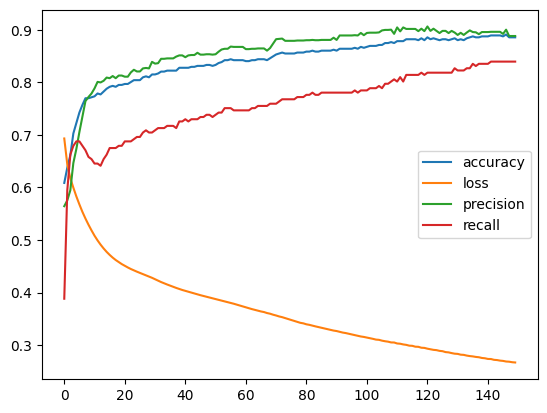

In [ ]:
pd.DataFrame(history.history).plot()

Epochs=200 ,optimizer=Adam

In [ ]:
tf.random.set_seed(42)

# STEP 1: Creating the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(7, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP 2: Compiling the model
model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  # Corrected here
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')  # Removed typo 'a=recall'
    ]
)

# STEP 3: Fit the model
history = model.fit(X_train4_nomulti, y_train4_nomulti, epochs=200)

Epoch 1/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5732 - loss: 0.7850 - precision: 0.8947 - recall: 0.0081        
Epoch 2/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5768 - loss: 0.7334 - precision: 0.9474 - recall: 0.0165         
Epoch 3/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5683 - loss: 0.6943 - precision: 0.4584 - recall: 0.0187  
Epoch 4/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5923 - loss: 0.6597 - precision: 0.9394 - recall: 0.0546 
Epoch 5/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6257 - loss: 0.6295 - precision: 0.8575 - recall: 0.1573  
Epoch 6/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6470 - loss: 0.6157 - precision: 0.8365 - recall: 0.2263 
Epoch 7/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6929 - loss: 0.6034 - precision: 0.8648 - recall: 0.3399
Epoch 8/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7114 - loss: 0.5933 - precision: 0.8448 - recall: 0.4040 


In [ ]:
model.evaluate(X_test4_nomulti,y_test4_nomulti)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7167 - loss: 1.4810 - precision: 0.7123 - recall: 0.6679  


[1.280882477760315, 0.7101449370384216, 0.734375, 0.6714285612106323]

<Axes: >

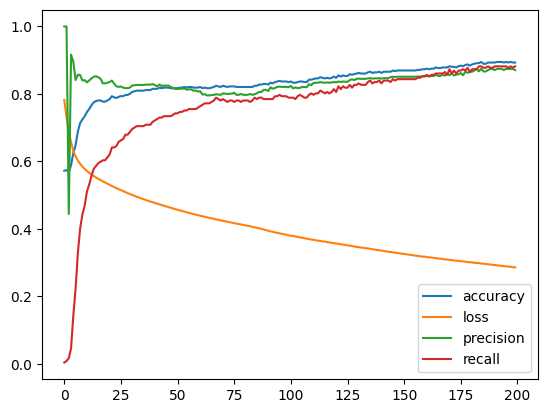

In [ ]:
pd.DataFrame(history.history).plot()

Epochs=250 ,optimizer=Adam

In [ ]:
tf.random.set_seed(42)

# STEP 1: Creating the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(7, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP 2: Compiling the model
model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  # Corrected here
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')  # Removed typo 'a=recall'
    ]
)

# STEP 3: Fit the model
history = model.fit(X_train4_nomulti, y_train4_nomulti, epochs=250)

Epoch 1/250
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4358 - loss: 0.8297 - precision: 0.4319 - recall: 0.9887
Epoch 2/250
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4559 - loss: 0.7346 - precision: 0.4403 - recall: 0.9766 
Epoch 3/250
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4578 - loss: 0.6951 - precision: 0.4383 - recall: 0.9256 
Epoch 4/250
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5141 - loss: 0.6725 - precision: 0.4665 - recall: 0.9097 
Epoch 5/250
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5644 - loss: 0.6570 - precision: 0.4963 - recall: 0.8828 
Epoch 6/250
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5996 - loss: 0.6448 - precision: 0.5210 - recall: 0.8618 
Epoch 7/250
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6206 - loss: 0.6346 - precision: 0.5377 - recall: 0.8372 
Epoch 8/250
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6417 - loss: 0.6254 - precision: 0.5569 - recall: 0.8156 
Epoch 9/250
18/18

In [ ]:
model.evaluate(X_test4_nomulti,y_test4_nomulti)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7368 - loss: 0.6536 - precision: 0.7458 - recall: 0.6522  


[0.6074463725090027, 0.739130437374115, 0.7833333611488342, 0.6714285612106323]

<Axes: >

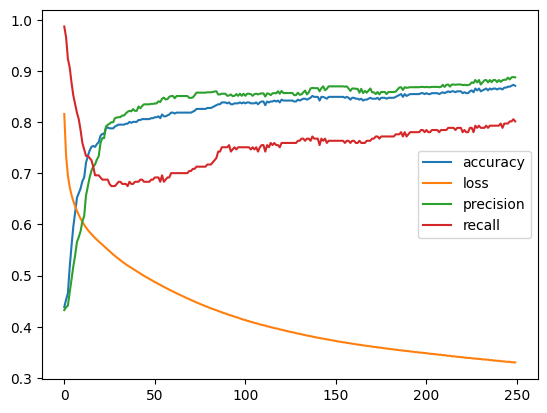

In [ ]:
pd.DataFrame(history.history).plot()